# Assignment 1
## Collaborative Work from Adrian Bremer & Philipp Reinig

In [2]:
import tensorflow as tf

tf.__version__

2023-10-12 09:49:52.257920: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 09:49:52.378554: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 09:49:52.378597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 09:49:52.379004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-12 09:49:52.432801: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 09:49:52.434139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

'2.14.0'

# MNIST-Tutorial 

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

## Viewing the first date

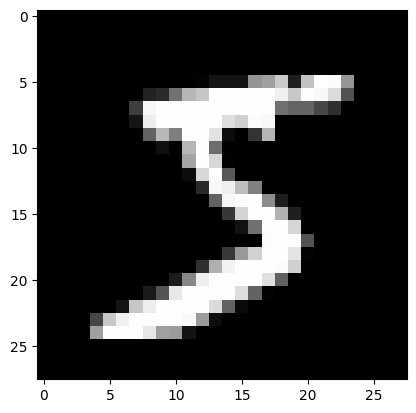

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

## Setting up and training the model

In [5]:
train_steps = 1000
learning_rate = 0.1

W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))


for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

print("Done!")

Loss: 2.3025851249694824 Accuracy: 0.1171875
Loss: 0.676782488822937 Accuracy: 0.859375
Loss: 0.44165244698524475 Accuracy: 0.859375
Loss: 0.3644907474517822 Accuracy: 0.9375
Loss: 0.4487124979496002 Accuracy: 0.859375
Loss: 0.3730652928352356 Accuracy: 0.90625
Loss: 0.2443128377199173 Accuracy: 0.9296875
Loss: 0.4058741629123688 Accuracy: 0.8515625
Loss: 0.3458133637905121 Accuracy: 0.921875
Loss: 0.395568311214447 Accuracy: 0.9140625
Done!


## Testing

In [6]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.9086, shape=(), dtype=float32)


# Building a Deep Model

## Hidden Layer
Using a variable size "N" for the hidden layer.
The previous layer with 10 Outputs represents the Output-Layer. 
Therefore, the hidden weights get a shape of Nx784 and the Output-Weights will get a shape of 10xN.

In [7]:
N = 20

def init(hidden_size):
    # initialising weights with small random values
    # and biases with small positive values (alternatively with zeros)
    W_ih = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(784, hidden_size)).astype(np.float32))
    b_h = tf.Variable(np.random.uniform(low=0.0, high=0.1, size=hidden_size).astype(np.float32))
    W_ho = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(hidden_size, 10)).astype(np.float32))
    b_o = tf.Variable(np.random.uniform(low=0.0, high=0.1, size=10).astype(np.float32))
    
    return (W_ih, b_h, W_ho, b_o)


def train(net, train_steps):
    """returns the loss and accuracy after 1000 iterations"""

    W_ih, b_h, W_ho, b_o = net
    

    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        with tf.GradientTape() as tape:
            tape.watch([W_ih, b_h, W_ho, b_o])

            hidden_logits = tf.matmul(img_batch, W_ih) + b_h
            # DON'T USE SOFTMAX HERE - IT IS AWFUL!
            hidden_softmax = tf.nn.relu(hidden_logits)

            logits = tf.matmul(hidden_softmax, W_ho) + b_o
            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=logits, labels=lbl_batch))

        grads = tape.gradient(xent, [W_ih, b_h, W_ho, b_o])
        W_ih.assign_sub(learning_rate * grads[0])
        b_h.assign_sub(learning_rate * grads[1])
        W_ho.assign_sub(learning_rate * grads[2])
        b_o.assign_sub(learning_rate * grads[3])

        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                                 tf.float32))
            #print("Loss: {} Accuracy: {}".format(xent, acc))

    #print("Done!")
    
    #return (xent,acc)
    
train(init(N), train_steps)
print("Done")

Done


## Find best size N for hidden layer 

N = 10, acc=0.9150000214576721
N = 11, acc=0.910099983215332
N = 12, acc=0.9158999919891357
N = 13, acc=0.9147999882698059
N = 14, acc=0.9178000092506409
N = 15, acc=0.9122999906539917
N = 16, acc=0.9180999994277954
N = 17, acc=0.9182000160217285
N = 18, acc=0.9204000234603882
N = 19, acc=0.9211000204086304
N = 20, acc=0.9207000136375427
N = 21, acc=0.9217000007629395
N = 22, acc=0.9207000136375427
N = 23, acc=0.9168999791145325
N = 24, acc=0.921999990940094
N = 25, acc=0.9211000204086304
N = 26, acc=0.9244999885559082
N = 27, acc=0.920199990272522
N = 28, acc=0.9214000105857849
N = 29, acc=0.9241999983787537
N = 30, acc=0.9258999824523926
N = 31, acc=0.9247999787330627
N = 32, acc=0.9230999946594238
N = 33, acc=0.916700005531311
N = 34, acc=0.9240000247955322
N = 35, acc=0.921999990940094
N = 36, acc=0.9218000173568726
N = 37, acc=0.920199990272522
N = 38, acc=0.9271000027656555
N = 39, acc=0.9240000247955322
N = 40, acc=0.9228000044822693
N = 41, acc=0.9240999817848206
N = 42, acc=0.

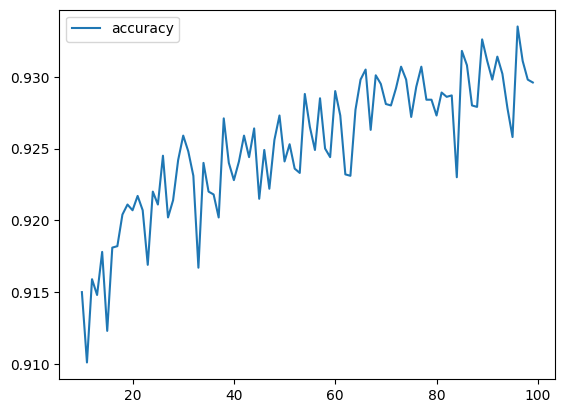

In [8]:
#losses = []
accs = []
sizes = np.arange(10,100, dtype=np.int32)

for n in sizes:
    W_ih, b_h, W_ho, b_o = init(n)
    train((W_ih, b_h, W_ho, b_o), train_steps)
    
    # Testing
    hidden_logits = tf.matmul(data.test_data, W_ih) + b_h
    hidden_relu = tf.nn.relu(hidden_logits)
    logits = tf.matmul(hidden_relu, W_ho) + b_o
    test_preds = tf.argmax(tf.nn.softmax(logits), axis=1, output_type=tf.int32)
    
    acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                                 tf.float32))
    
    #losses.append(loss)
    accs.append(acc)
    
    print("N = {}, acc={}".format(n, acc))
    

plt.plot(sizes, accs, label='accuracy')
plt.legend()

plt.savefig('plot.svg')
plt.show()

## Different Initializations

N = 10, acc=0.7864000201225281
N = 11, acc=0.7569000124931335
N = 12, acc=0.7452999949455261
N = 13, acc=0.7876999974250793
N = 14, acc=0.7915999889373779
N = 15, acc=0.8263999819755554
N = 16, acc=0.7912999987602234
N = 17, acc=0.7950999736785889
N = 18, acc=0.7710000276565552
N = 19, acc=0.8040000200271606
N = 20, acc=0.7896999716758728
N = 21, acc=0.8177000284194946
N = 22, acc=0.7833999991416931
N = 23, acc=0.8036999702453613
N = 24, acc=0.8016999959945679
N = 25, acc=0.8151000142097473
N = 26, acc=0.8259999752044678
N = 27, acc=0.8076000213623047
N = 28, acc=0.8306000232696533
N = 29, acc=0.8162000179290771
N = 30, acc=0.8198999762535095
N = 31, acc=0.8338000178337097
N = 32, acc=0.824400007724762
N = 33, acc=0.8414000272750854
N = 34, acc=0.8154000043869019
N = 35, acc=0.8294000029563904
N = 36, acc=0.8395000100135803
N = 37, acc=0.8422999978065491
N = 38, acc=0.8242999911308289
N = 39, acc=0.8166999816894531
N = 40, acc=0.8328999876976013
N = 41, acc=0.8389999866485596
N = 42, a

N = 96, acc=0.7800999879837036
N = 97, acc=0.7832000255584717
N = 98, acc=0.8033000230789185
N = 99, acc=0.7950000166893005
N = 10, acc=0.7538999915122986
N = 11, acc=0.7440000176429749
N = 12, acc=0.7545999884605408
N = 13, acc=0.7465999722480774
N = 14, acc=0.7777000069618225
N = 15, acc=0.7982000112533569
N = 16, acc=0.7858999967575073
N = 17, acc=0.8118000030517578
N = 18, acc=0.7767000198364258
N = 19, acc=0.7950000166893005
N = 20, acc=0.7947999835014343
N = 21, acc=0.8059999942779541
N = 22, acc=0.8256999850273132
N = 23, acc=0.8317999839782715
N = 24, acc=0.8328999876976013
N = 25, acc=0.8133999705314636
N = 26, acc=0.8180000185966492
N = 27, acc=0.7943000197410583
N = 28, acc=0.8201000094413757
N = 29, acc=0.8019000291824341
N = 30, acc=0.8169000148773193
N = 31, acc=0.8277999758720398
N = 32, acc=0.829800009727478
N = 33, acc=0.8341000080108643
N = 34, acc=0.8170999884605408
N = 35, acc=0.824999988079071
N = 36, acc=0.8342999815940857
N = 37, acc=0.8120999932289124
N = 38, ac

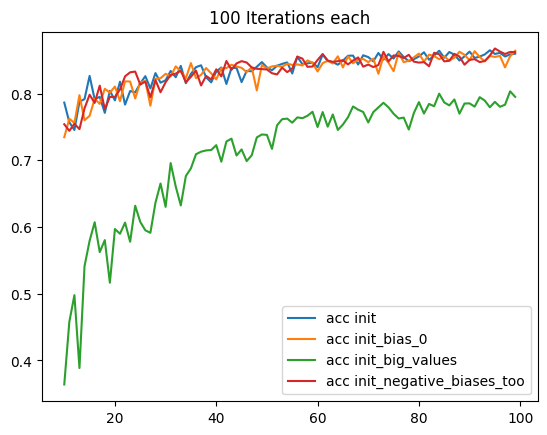

In [9]:
def init_bias_0(hidden_size):
    W_ih = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(784, hidden_size)).astype(np.float32))
    b_h = tf.Variable(np.zeros(hidden_size, dtype=np.float32))
    W_ho = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(hidden_size, 10)).astype(np.float32))
    b_o = tf.Variable(np.zeros(10, dtype=np.float32))
    
    return (W_ih, b_h, W_ho, b_o)

def init_big_values(hidden_size):
    W_ih = tf.Variable(np.random.uniform(low=-1.0, high=1.0, size=(784, hidden_size)).astype(np.float32))
    b_h = tf.Variable(np.random.uniform(low=0.0, high=1.0, size=hidden_size).astype(np.float32))
    W_ho = tf.Variable(np.random.uniform(low=-1.0, high=1.0, size=(hidden_size, 10)).astype(np.float32))
    b_o = tf.Variable(np.random.uniform(low=0.0, high=1.0, size=10).astype(np.float32))
    
    return (W_ih, b_h, W_ho, b_o)

def init_negative_biases_too(hidden_size):
    W_ih = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(784, hidden_size)).astype(np.float32))
    b_h = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=hidden_size).astype(np.float32))
    W_ho = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(hidden_size, 10)).astype(np.float32))
    b_o = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=10).astype(np.float32))
    
    return (W_ih, b_h, W_ho, b_o)


dates = []
accs = []
sizes = np.arange(10,100, dtype=np.int32)

init_funcs = [init, init_bias_0, init_big_values, init_negative_biases_too]

for init_func in init_funcs:
    for n in sizes:
        W_ih, b_h, W_ho, b_o = init_func(n)
        train((W_ih, b_h, W_ho, b_o), 100)

        # Testing
        hidden_logits = tf.matmul(data.test_data, W_ih) + b_h
        hidden_relu = tf.nn.relu(hidden_logits)
        logits = tf.matmul(hidden_relu, W_ho) + b_o
        test_preds = tf.argmax(tf.nn.softmax(logits), axis=1, output_type=tf.int32)

        acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                                     tf.float32))

        #losses.append(loss)
        accs.append(acc)

        print("N = {}, acc={}".format(n, acc))
        
    dates.append(accs)
    accs = []


plt.plot(sizes, dates[0], label='acc init')
plt.plot(sizes, dates[1], label='acc init_bias_0')
plt.plot(sizes, dates[2], label='acc init_big_values')
plt.plot(sizes, dates[3], label='acc init_negative_biases_too')

plt.legend()
plt.title('100 Iterations each')

plt.savefig('plot.svg')
plt.show()

## Questions

### Why don't initialise with 0?
Because then the hidden layer is producing - no matter the input - the same output in the first iteration. 
And even worse: During backpropagation no weights get changed, because every needed change is multiplied by zero (in the hidden layer).

## Experiments

### Different activation functions
First we used softmax in the hidden layer. This produced a maximum accuracy of 0.5 and a minimum loss of more than 1. So we switched to ReLU for the hidden layer and we got accuracy over 90% and a loss of about 0.1

### Different hidden layer sizes
<img src="plt_incr-N.svg">
<img src="plt_incr-N_2.svg">

Like one can see in the diagram the more nodes we have inside the hidden layer, the more accuracy can be reached after a fixed amount of iterations (1000). There are some varaitions, but we did only 1 run. But the tendence is clear.

But we have to consider that after about 40 nodes in the hidden layer, the improvements are negetibly small. Therefore, one shouldn't choose a much bigger hidden layer because we don't gain that much more performance for the huge amounts of extra computation for bigger layers.

### Different weight initializations
<img src="plt_different-init.svg">
<img src="plt_different-init_2.svg">

One can see in the diagram that initialising with small values is extremly important. Initialising the biases with zero seems to be the best way to go, espacially for small hidden layers. But there isn't much difference.


## Tensorflow Interface

### Suggestions for High-level interfaces
- initialization inside a constructor where you specify the layer sizes - probably with options to tell how to initialize 
- feed forward in one method (matrix multiplication an addition with straight forward pattern) -> for really deep networks really tidious
- use this feed forward method inside a train method -> does back propagation for the user (again: straight forward pattern)

### Wishes for currently missing features
- **_TODO_**

### redundant information
You get forced a lot to give redundant information. E.G. Specify the sizes of the matrices, but they depend on the layer sizes, specify the feed forward calculations for every single layer, even it is a mechanical task, tell the GradientTape which variables to differentiate by and subtract the changes from every single weight matrix and bias vector. 
This can easily be packaged inside the specified methods.


# Bonus
## Visualizing wrong classified data

[   8   33   66   92  124  149  217  233  241  245  247  259  290  300
  313  320  321  340  352  358  381  412  445  448  449  478  479  495
  502  507  511  530  531  542  543  551  565  569  578  582  591  610
  619  627  659  684  691  707  717  720  740  760  791  810  839  844
  881  890  898  924  938  939  947  950  956  959  965  969 1003 1014
 1032 1039 1044 1062 1068 1101 1107 1112 1114 1119 1166 1173 1181 1182
 1191 1192 1194 1198 1204 1206 1208 1226 1232 1242 1247 1248 1256 1260
 1283 1289 1299 1310 1319 1325 1326 1328 1337 1364 1378 1413 1414 1433
 1444 1467 1469 1494 1500 1522 1525 1527 1530 1549 1553 1569 1581 1587
 1609 1621 1626 1634 1640 1678 1681 1696 1709 1717 1718 1721 1732 1737
 1751 1754 1765 1772 1773 1790 1800 1828 1850 1857 1868 1878 1901 1926
 1930 1938 1940 1941 1952 1954 1970 1984 2016 2024 2040 2043 2044 2053
 2070 2093 2098 2099 2109 2110 2115 2118 2129 2130 2135 2174 2182 2185
 2186 2189 2215 2224 2266 2272 2293 2299 2305 2325 2369 2371 2380 2387
 2393 

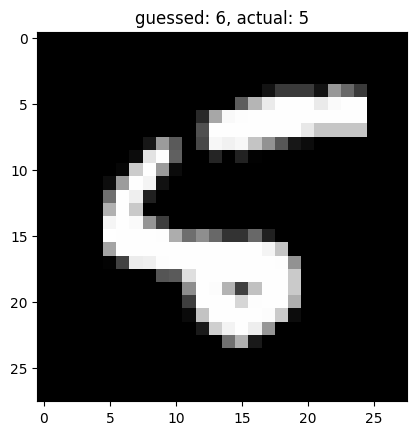

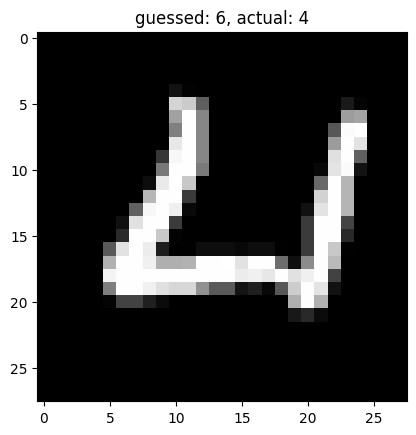

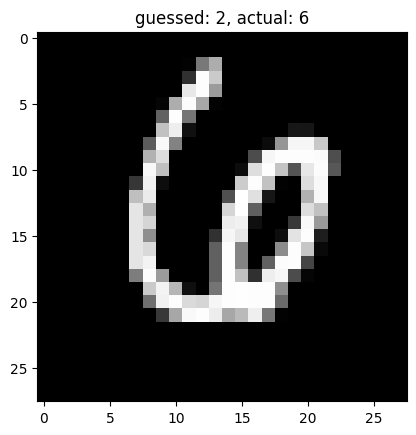

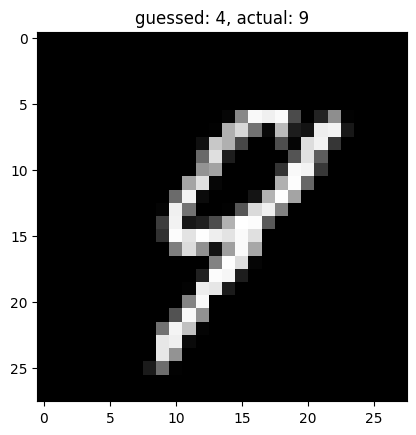

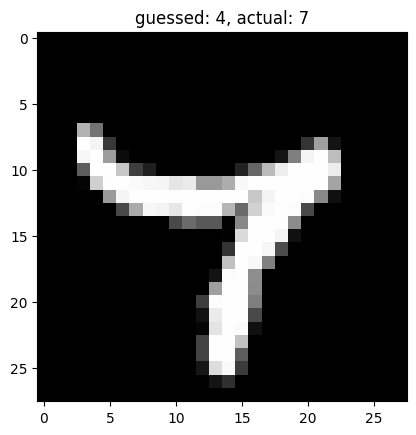

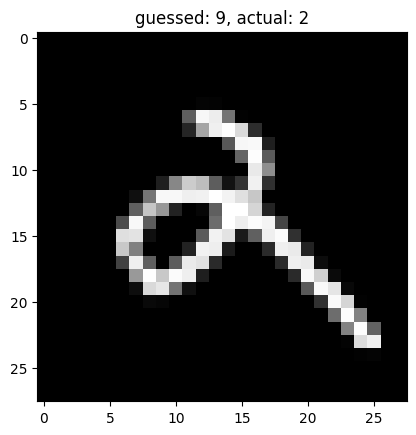

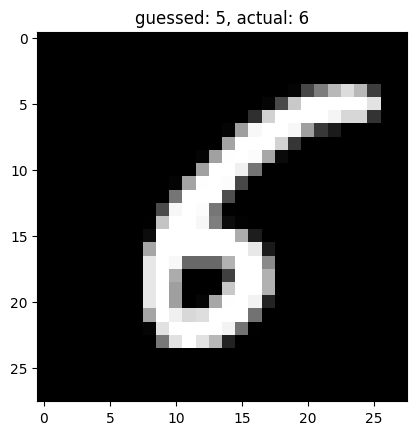

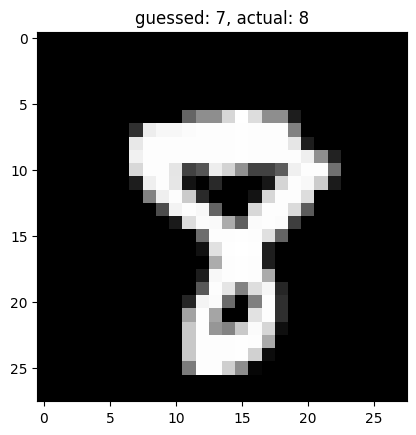

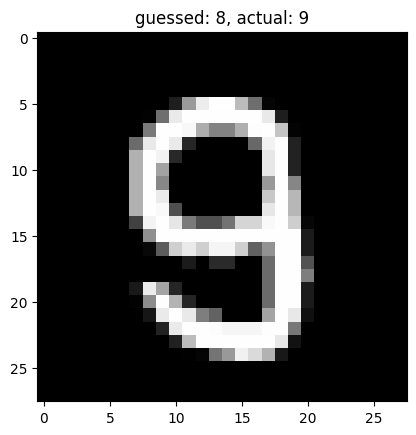

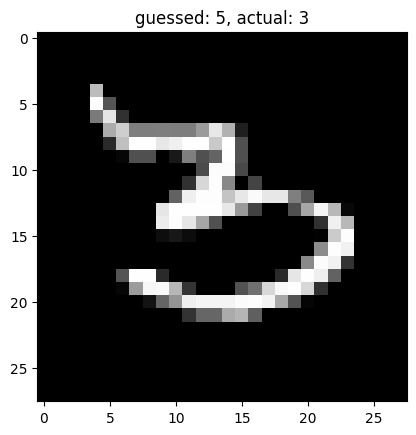

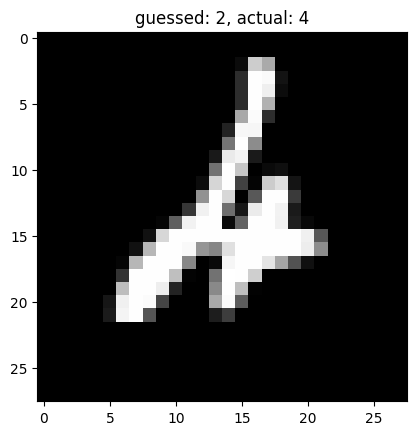

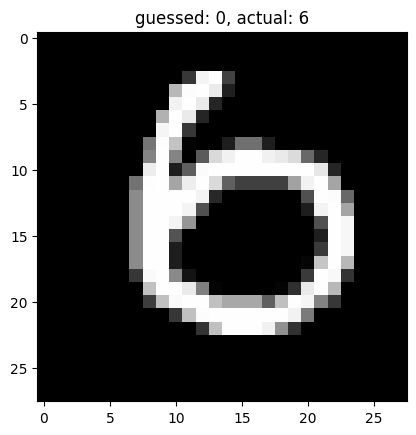

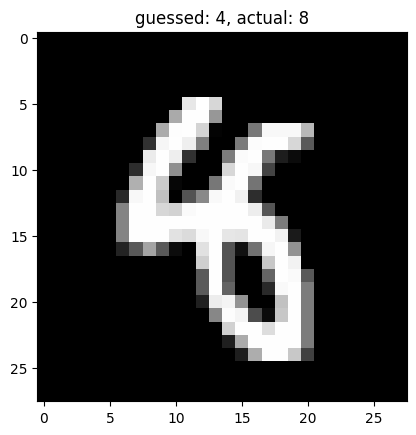

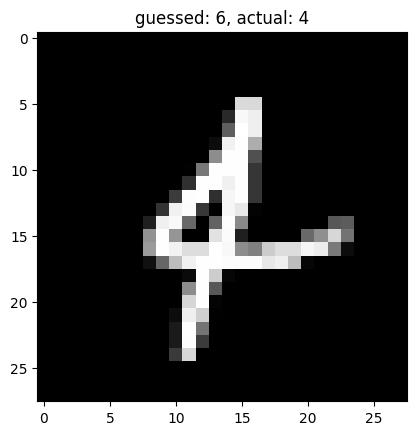

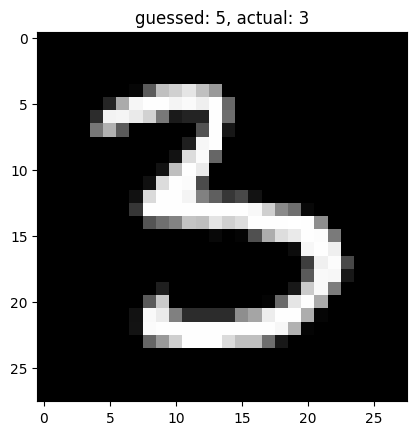

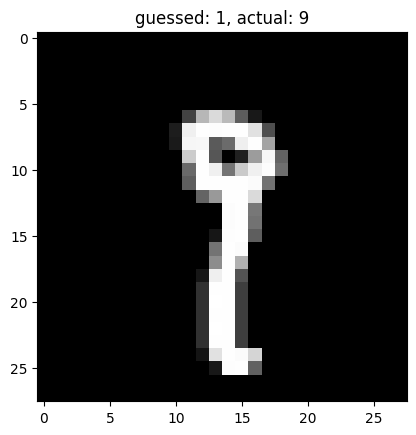

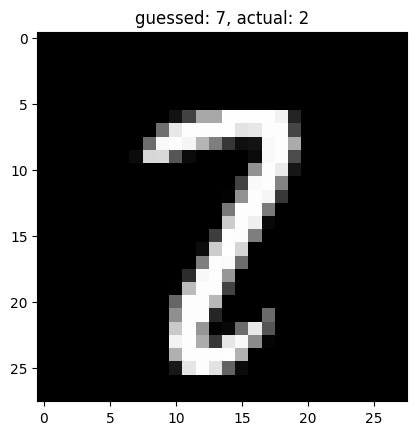

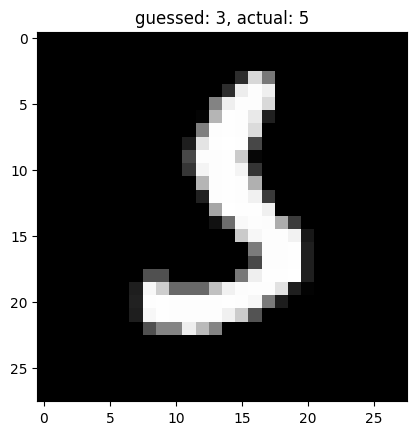

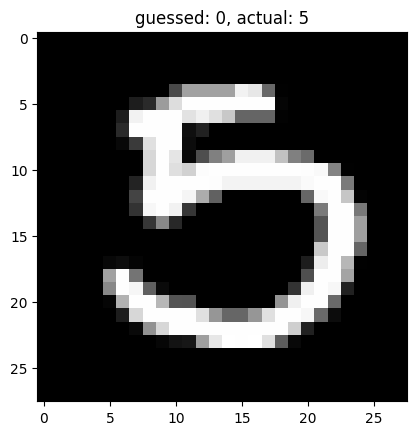

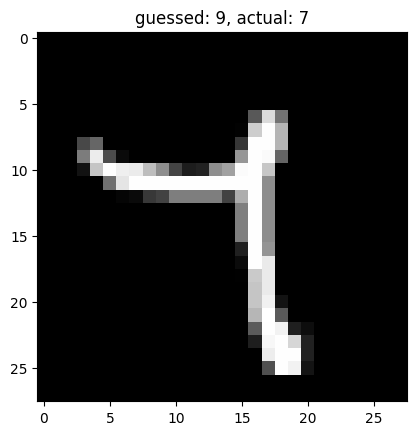

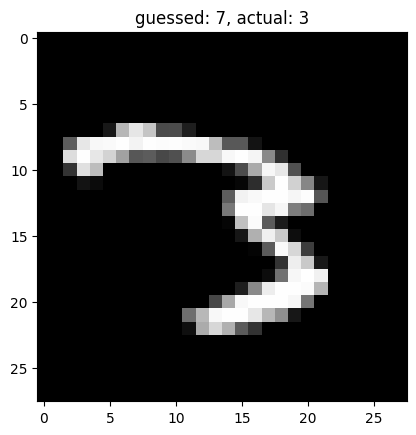

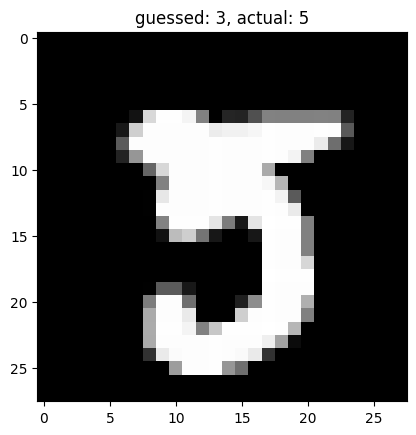

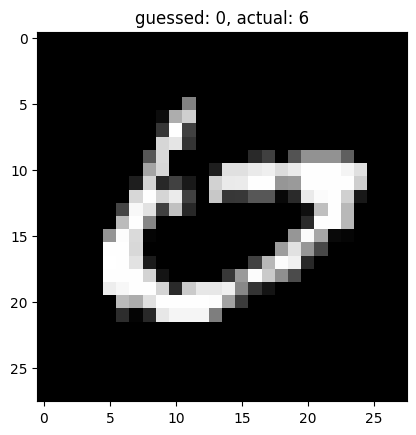

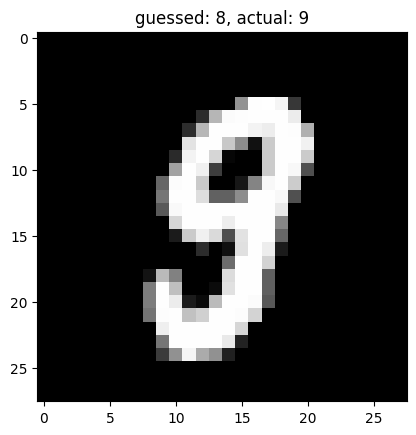

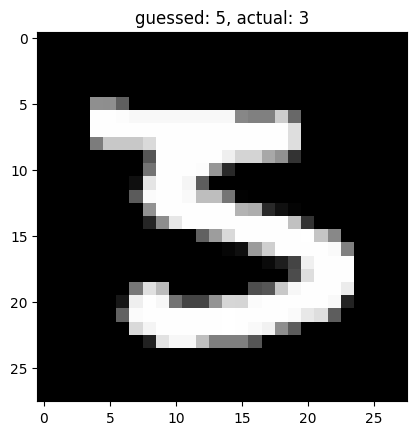

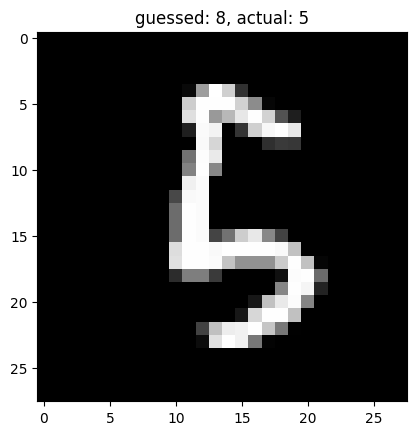

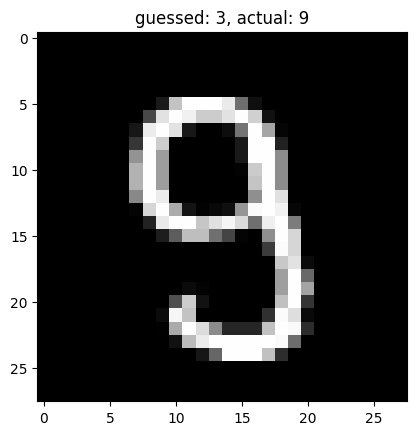

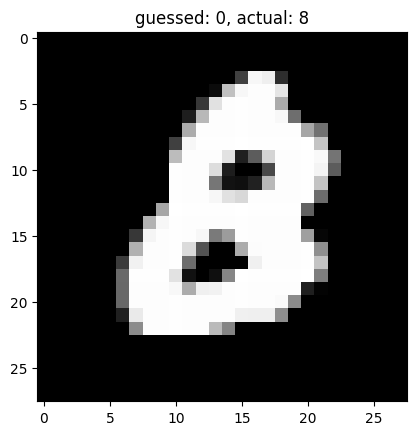

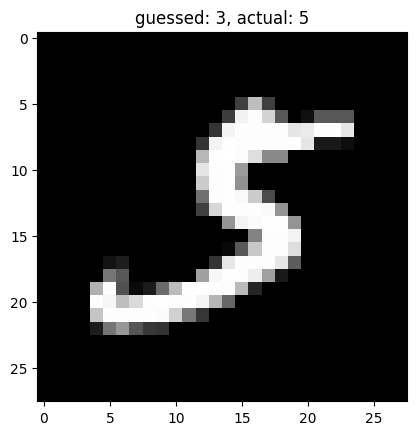

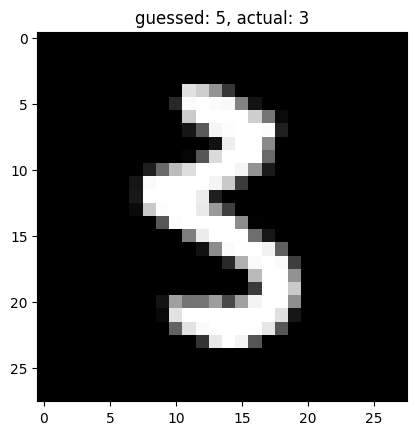

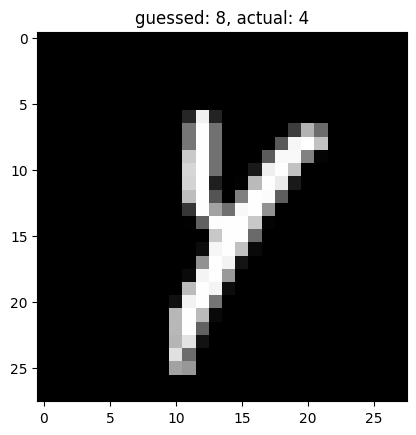

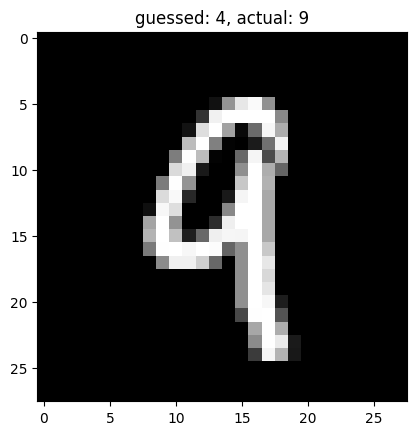

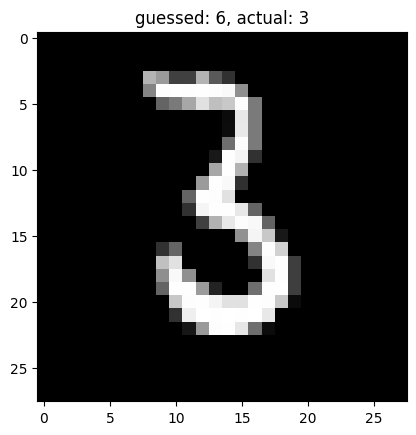

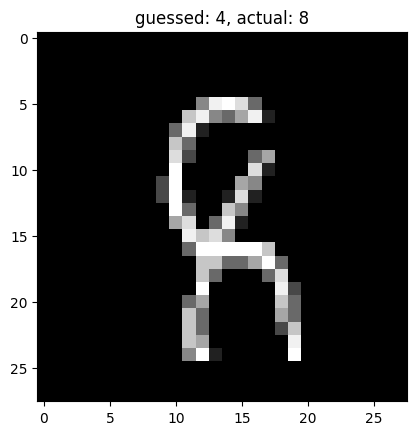

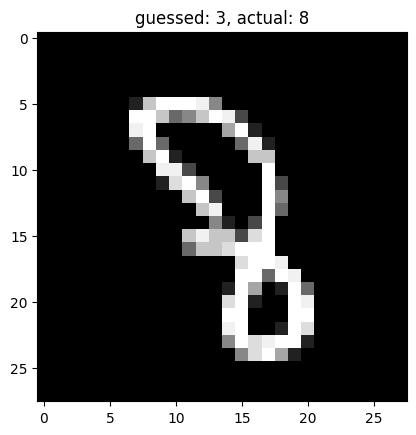

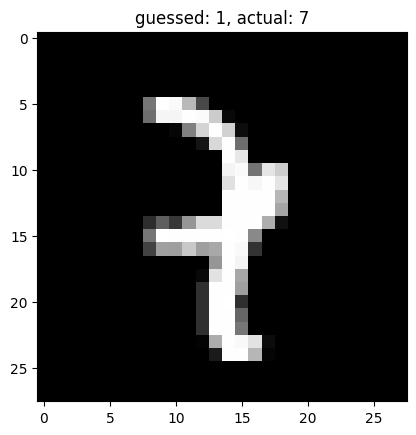

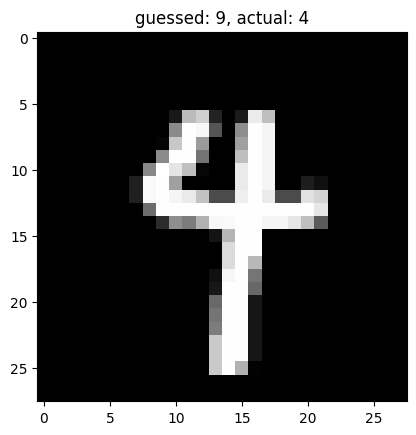

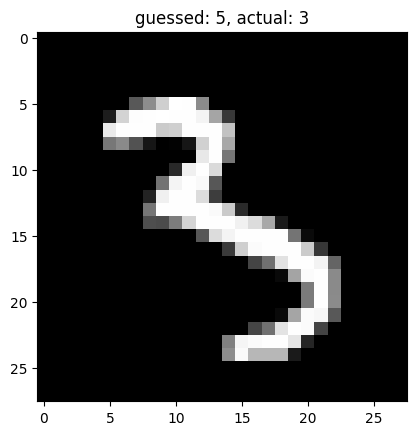

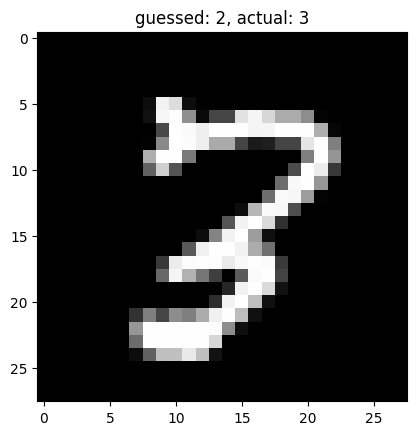

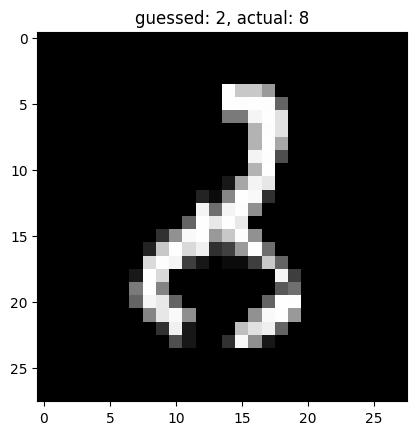

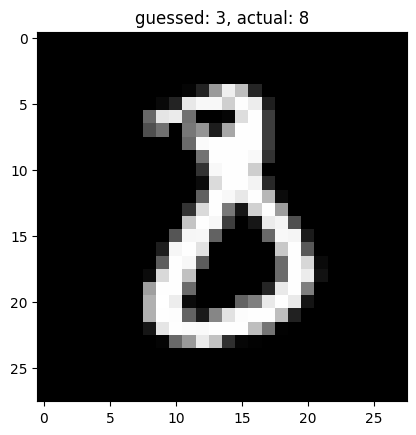

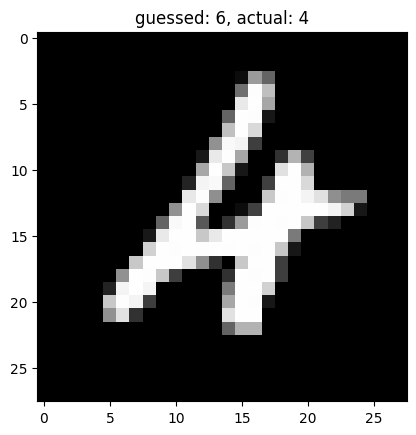

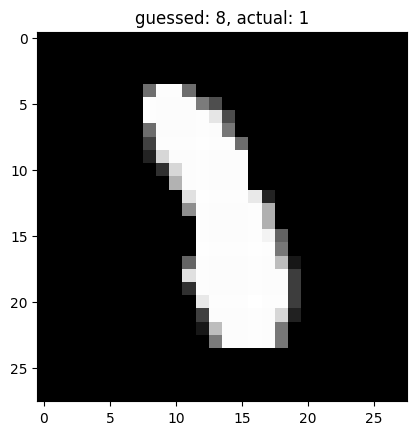

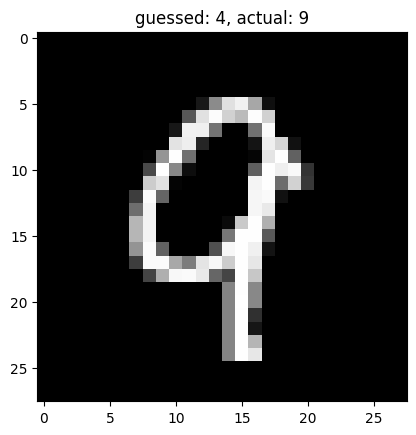

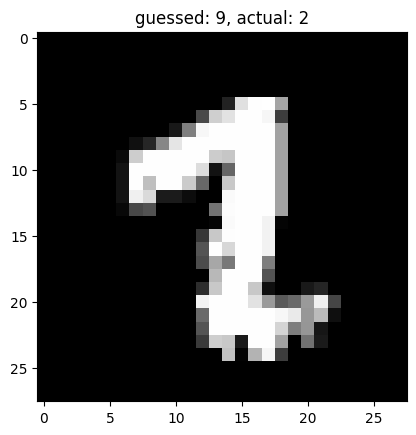

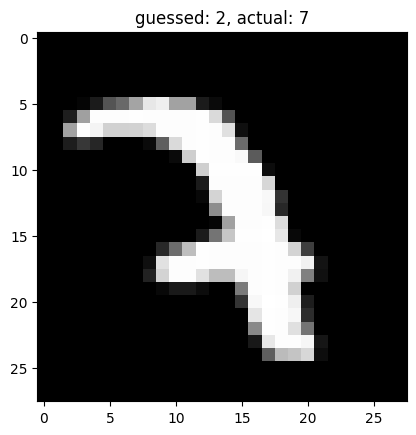

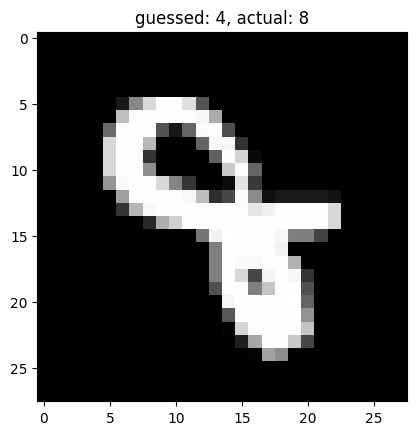

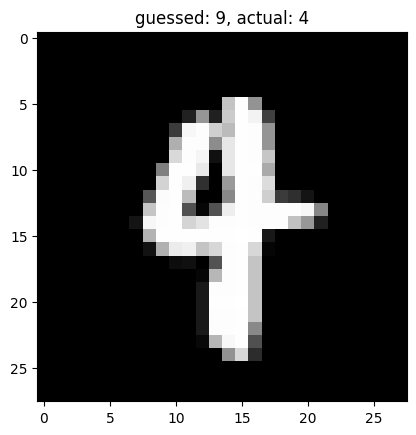

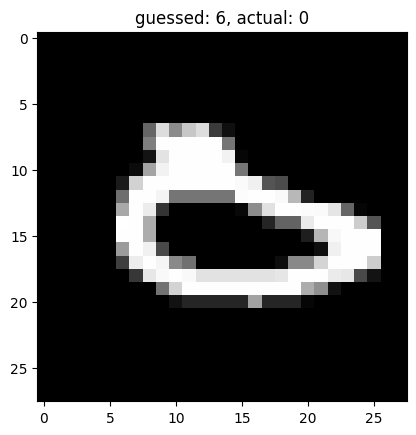

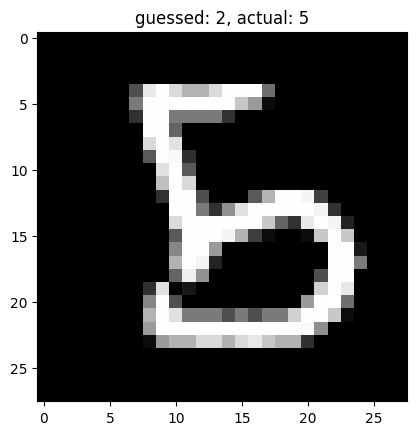

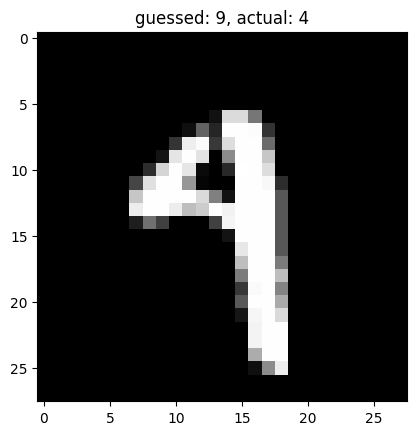

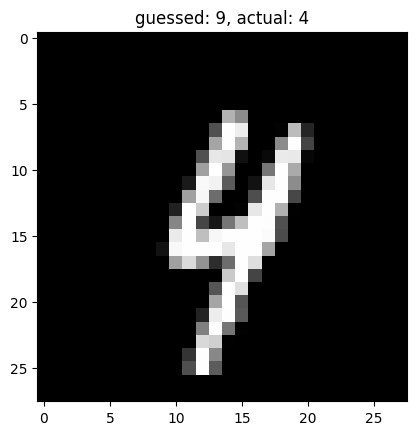

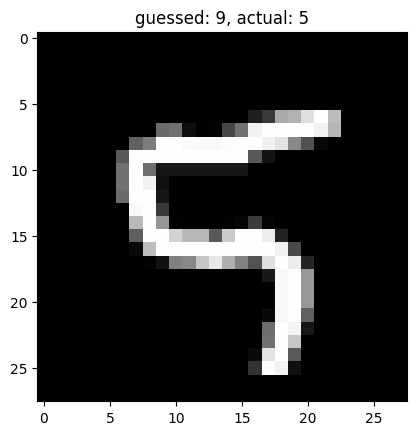

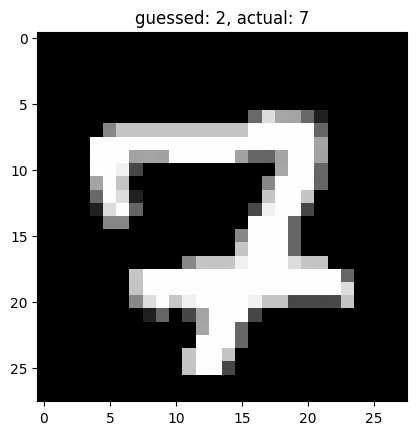

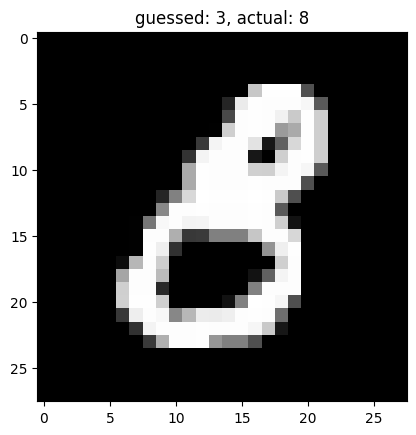

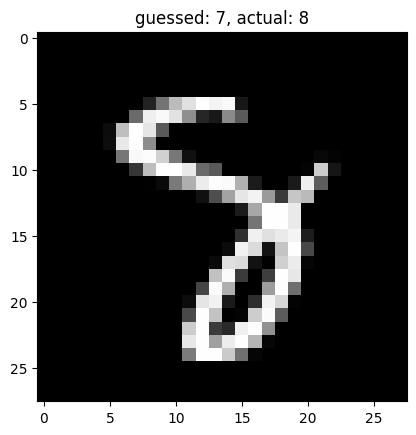

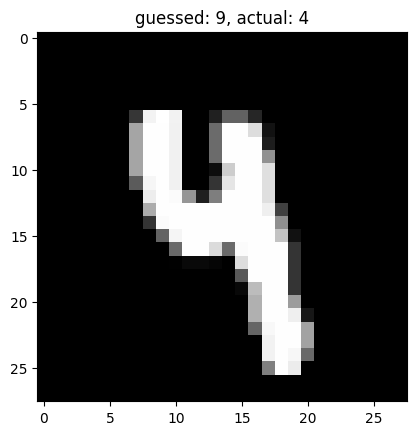

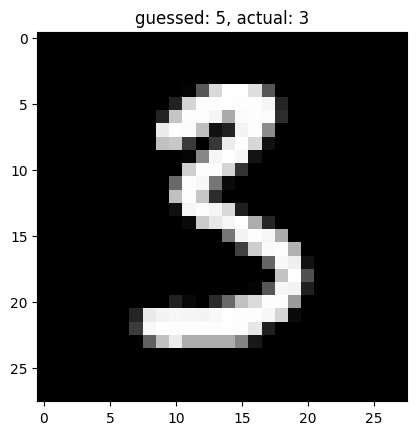

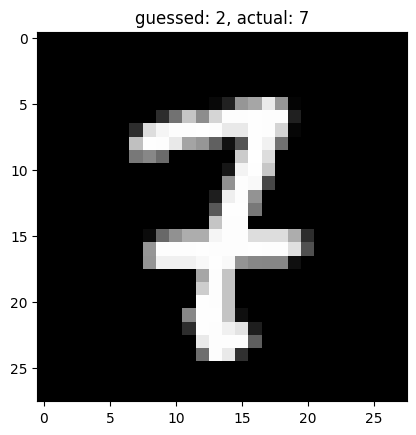

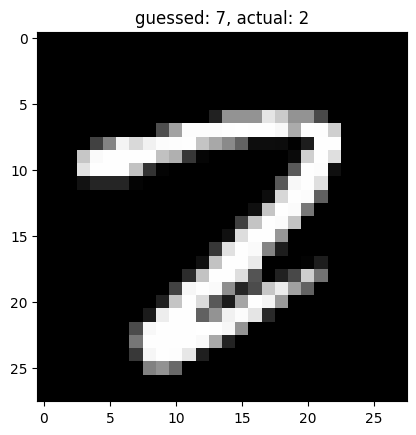

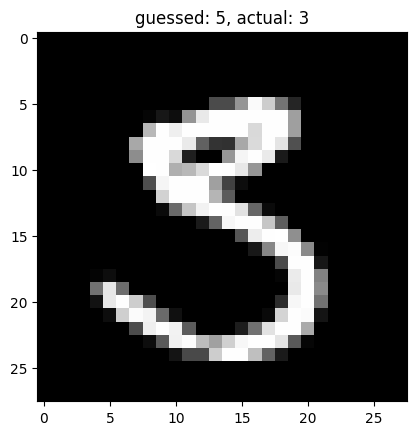

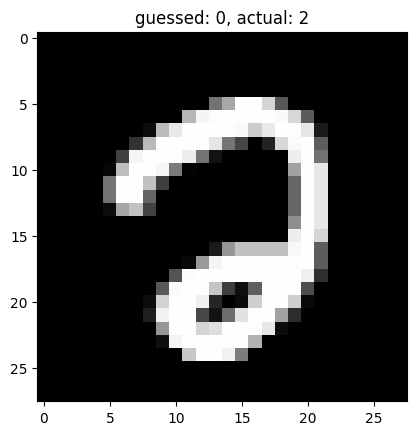

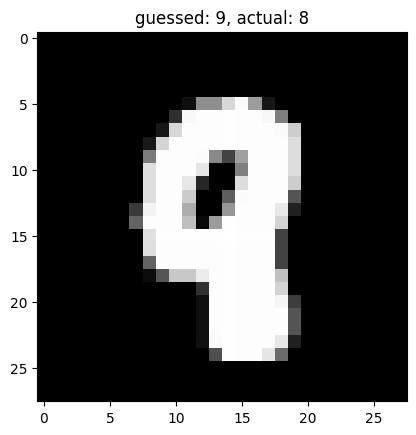

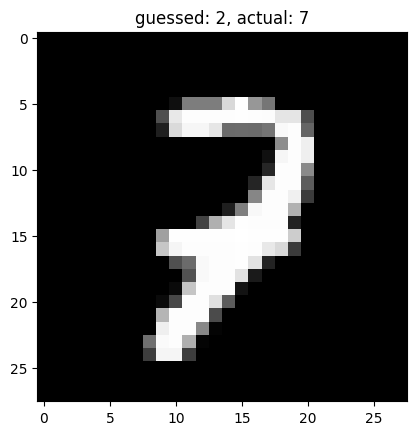

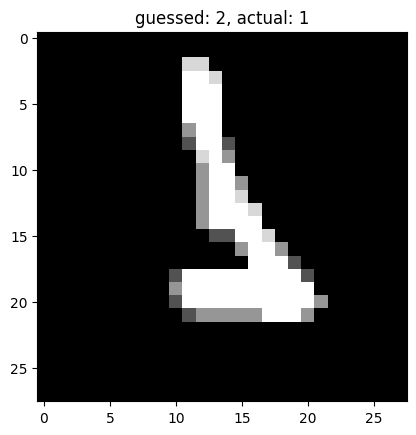

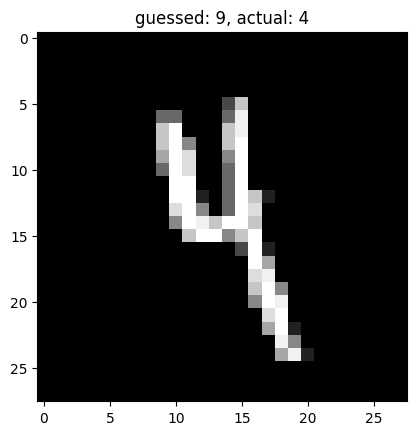

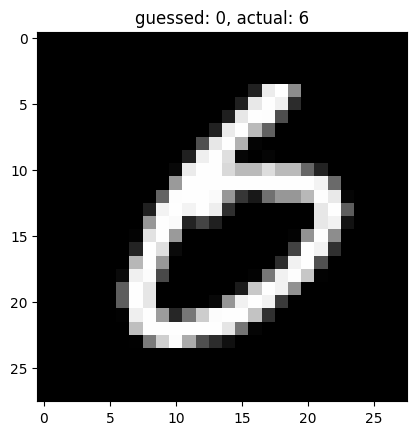

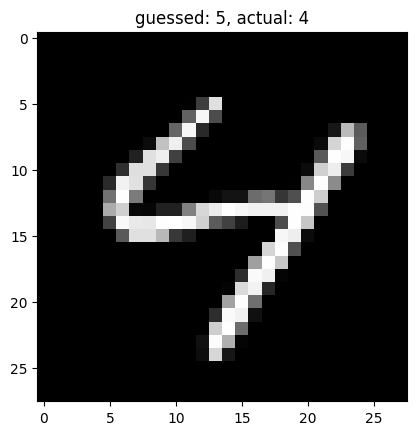

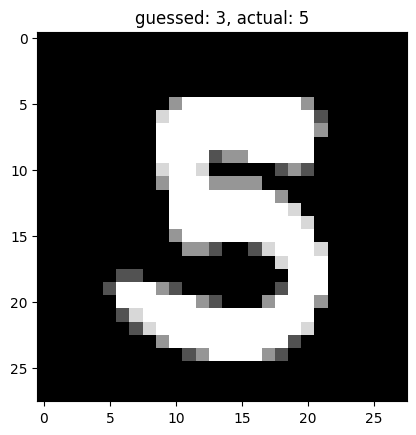

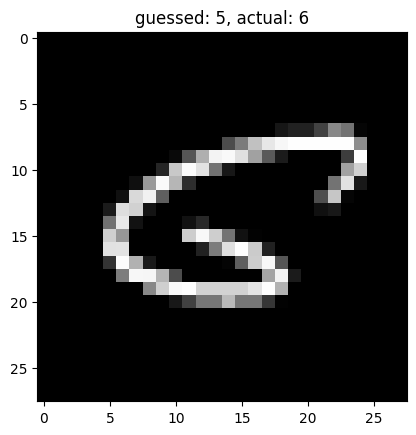

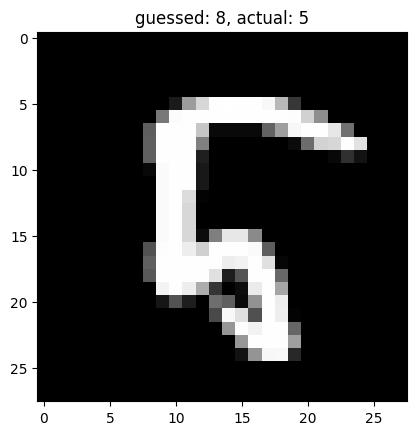

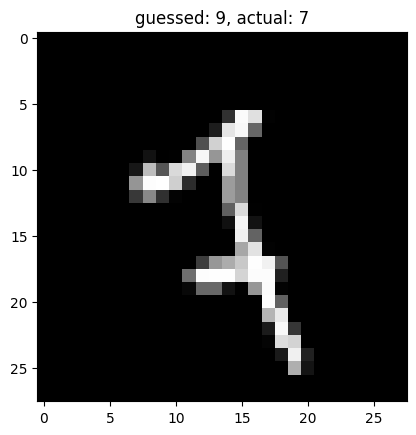

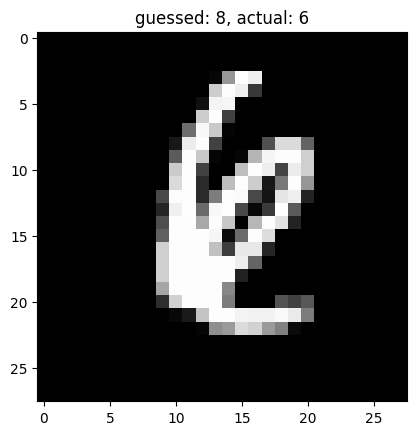

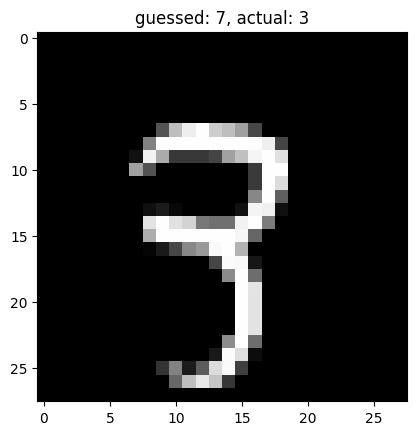

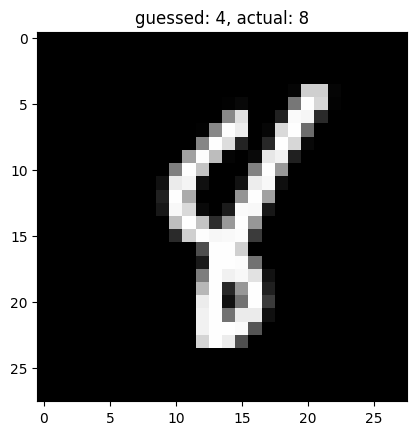

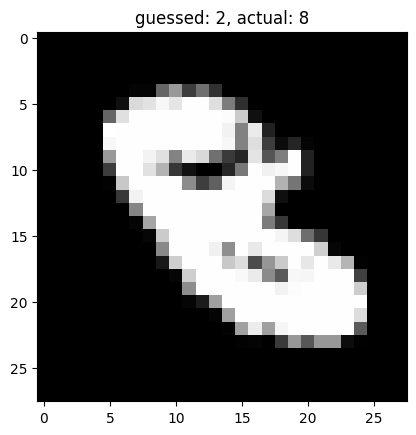

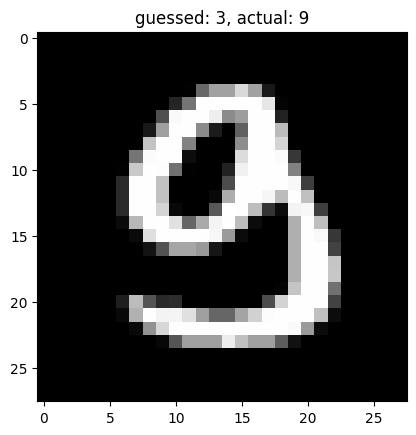

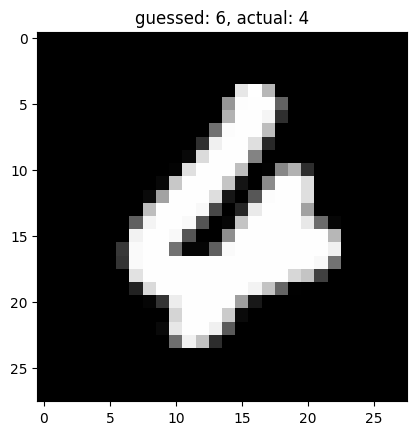

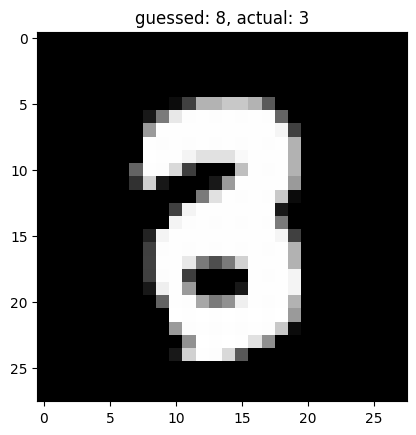

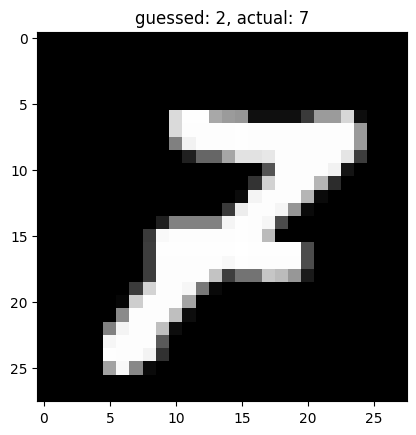

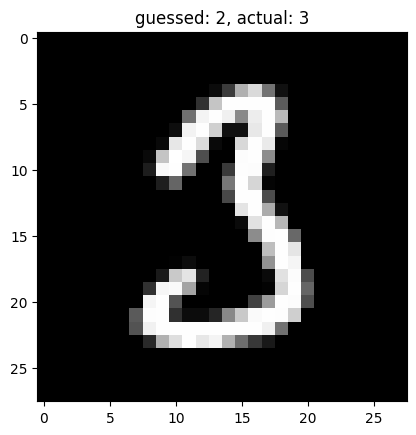

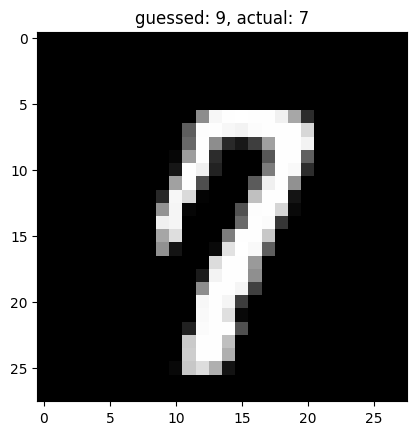

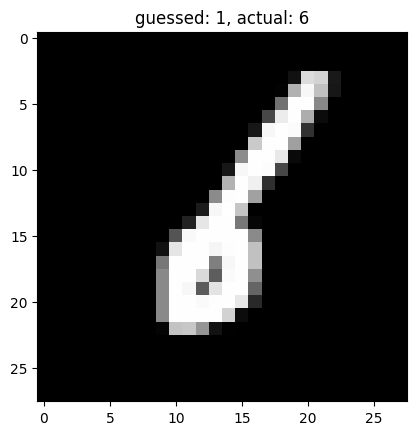

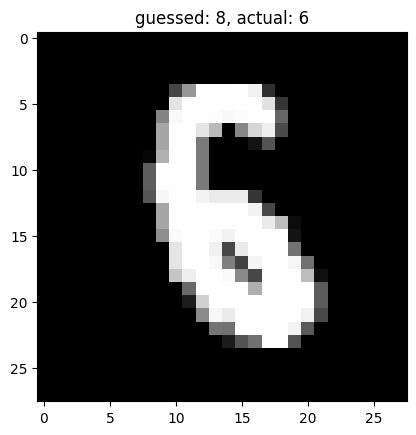

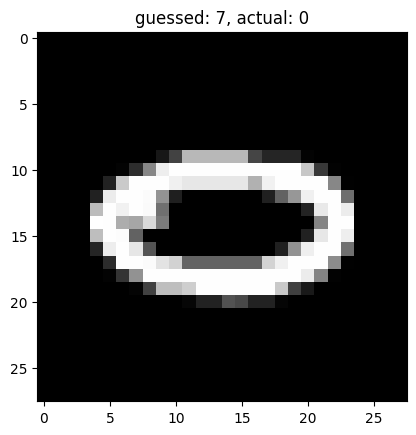

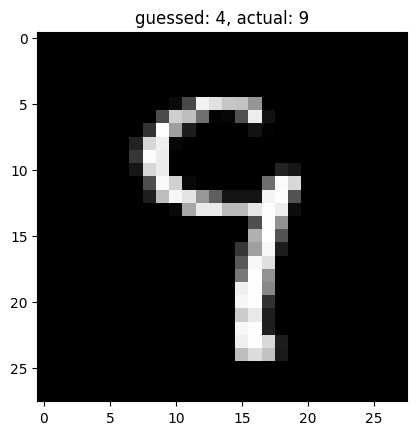

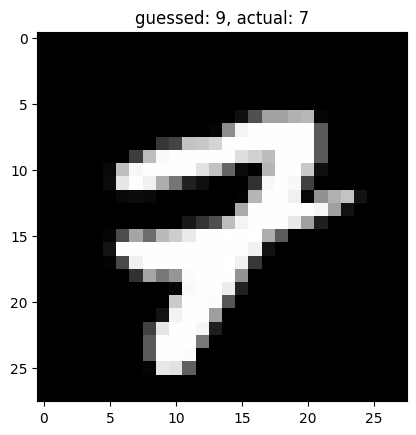

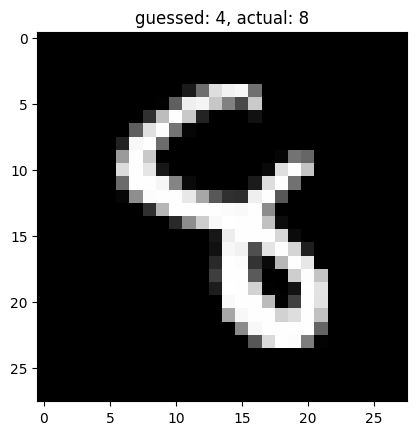

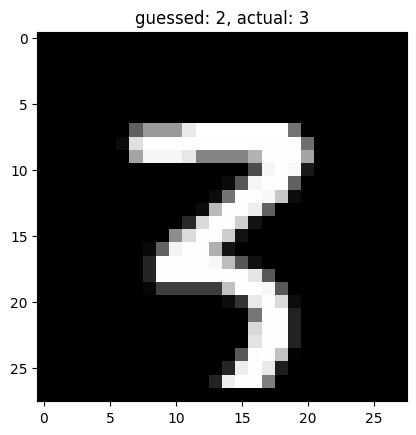

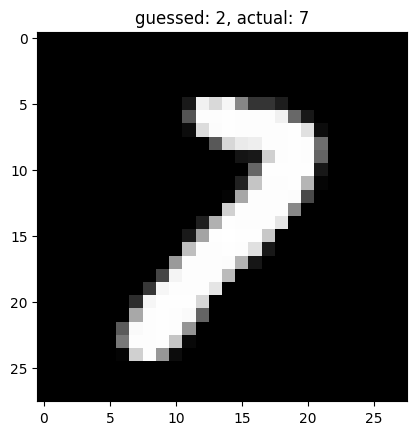

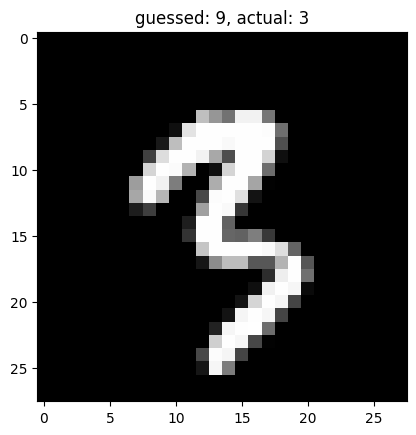

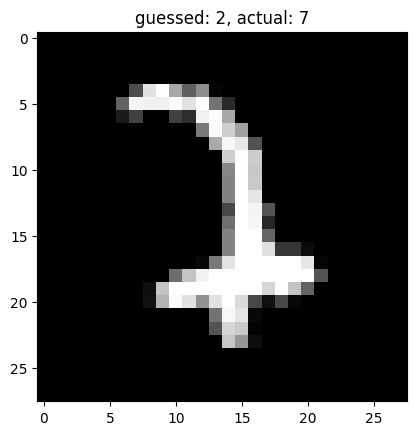

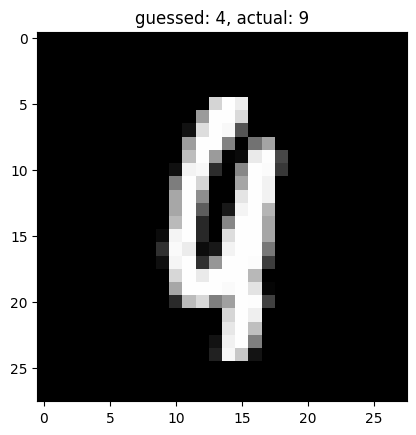

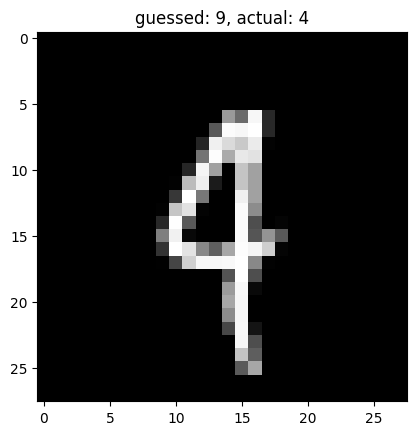

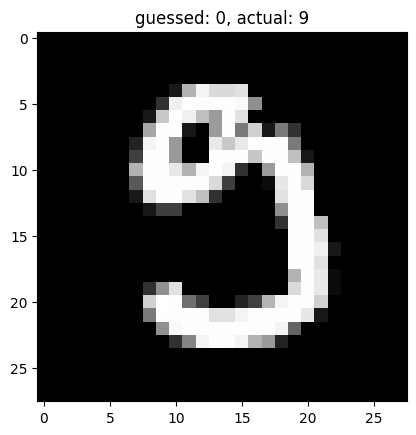

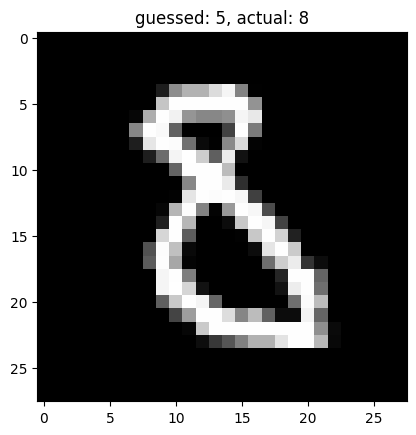

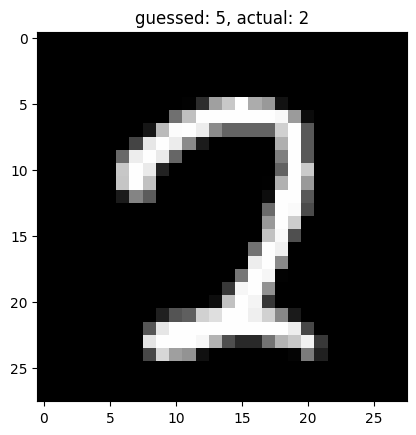

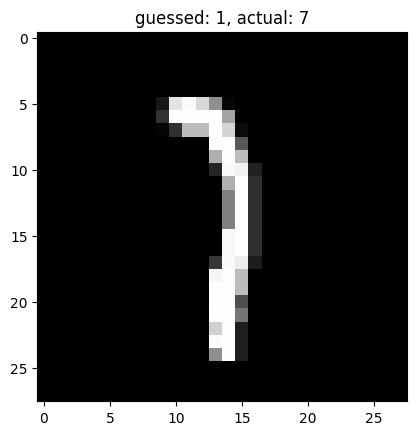

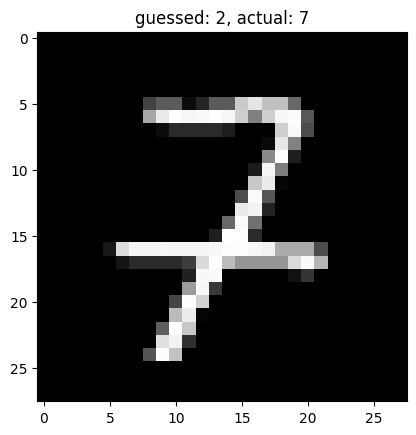

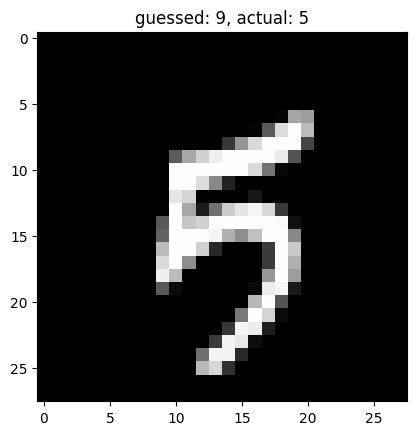

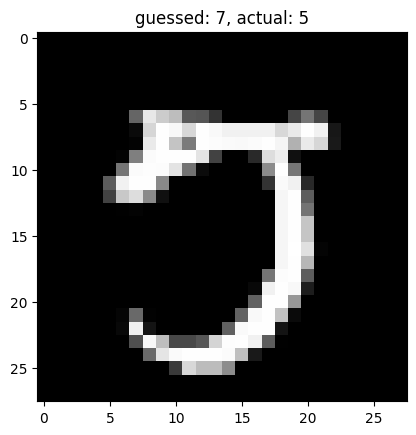

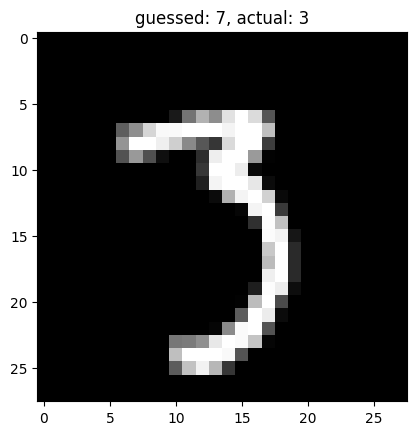

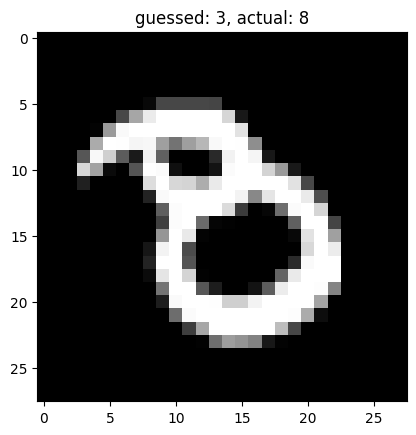

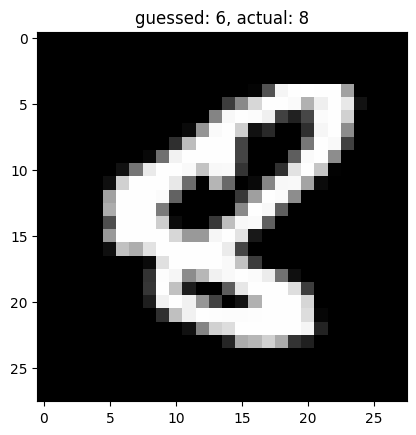

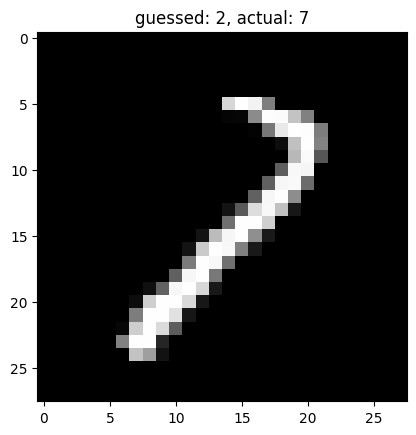

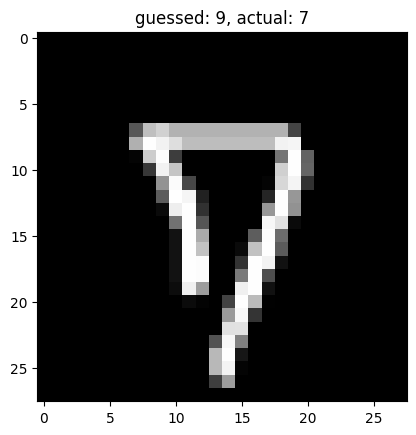

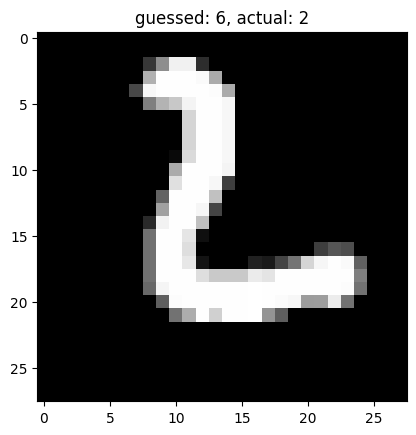

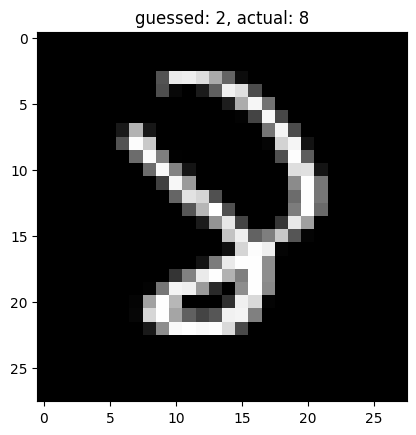

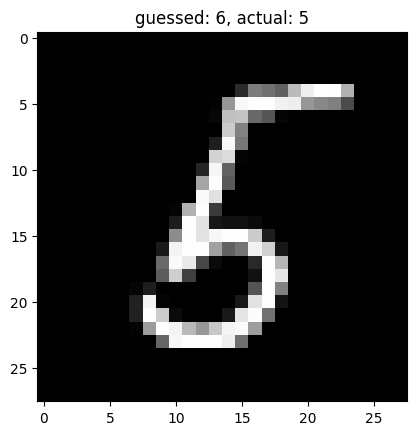

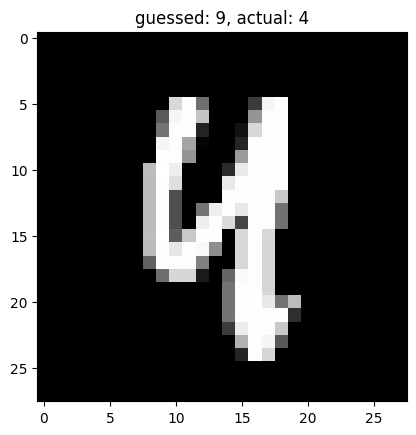

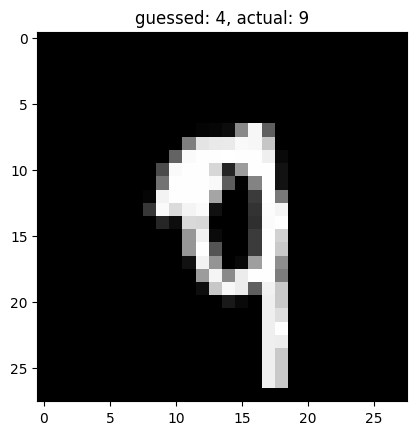

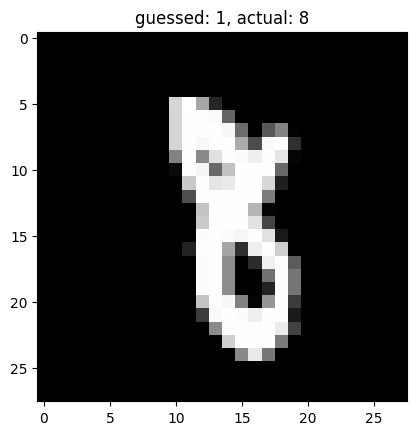

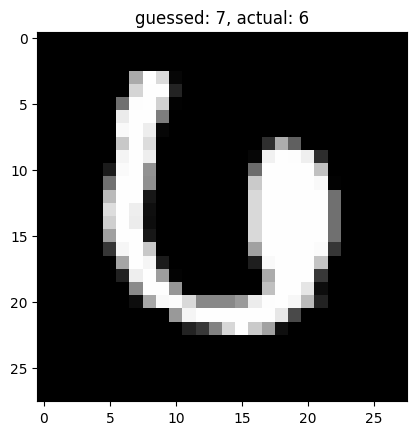

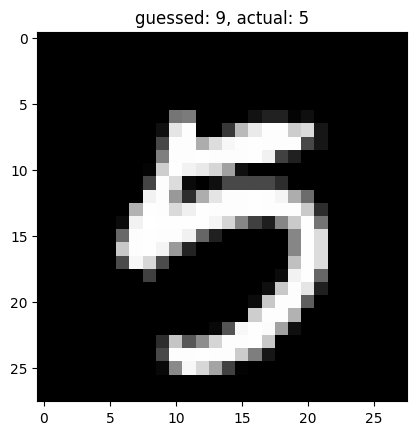

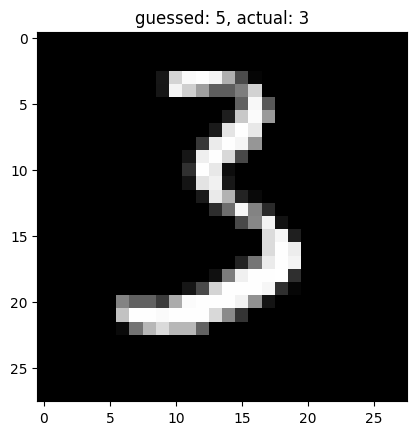

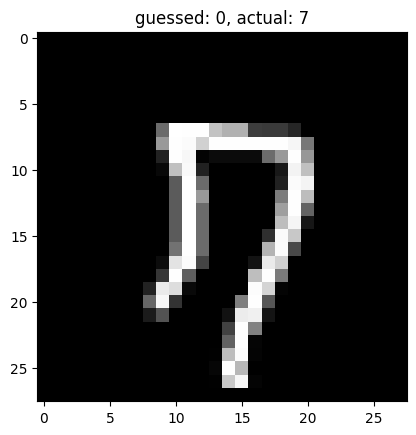

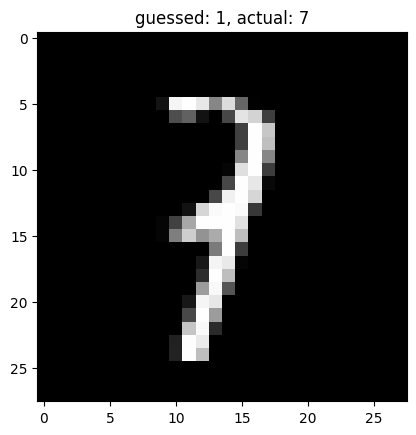

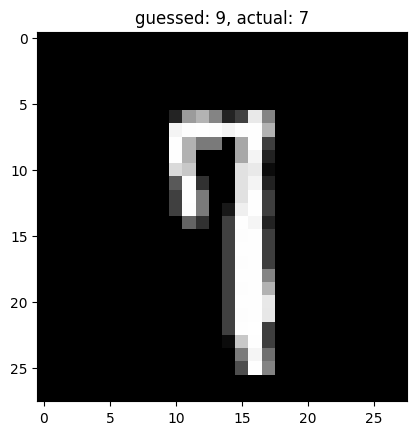

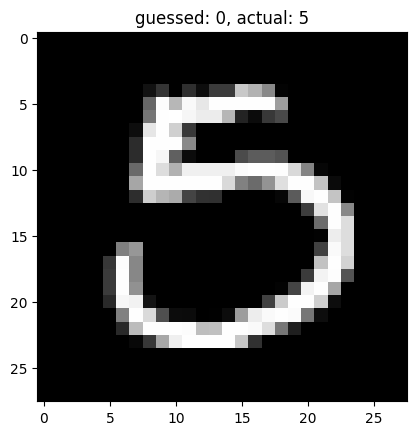

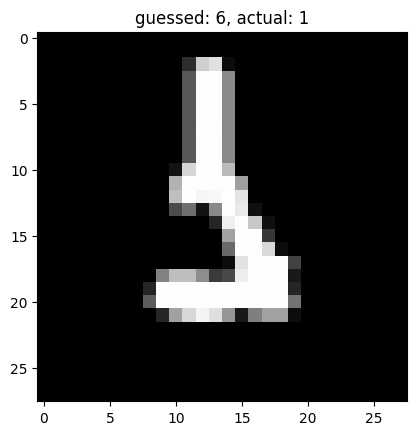

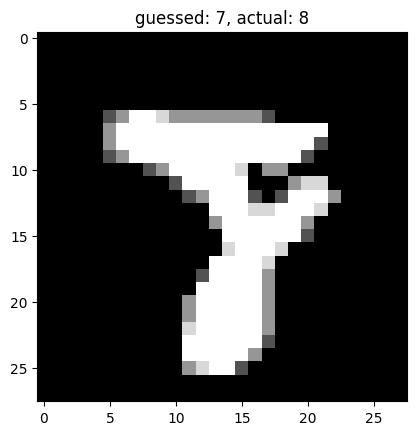

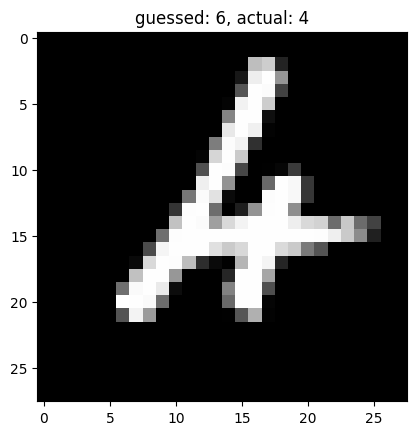

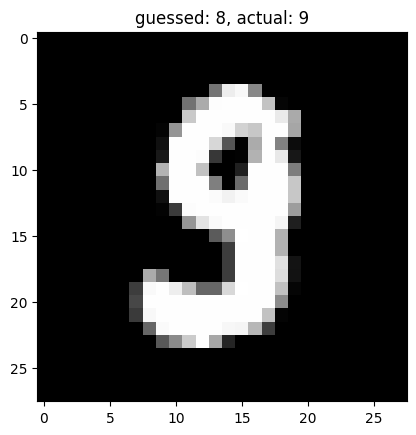

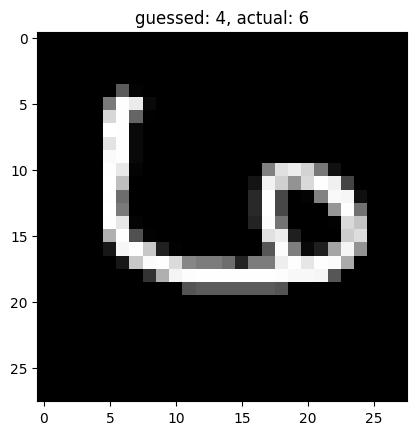

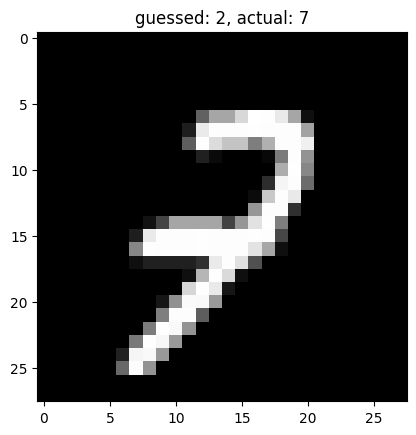

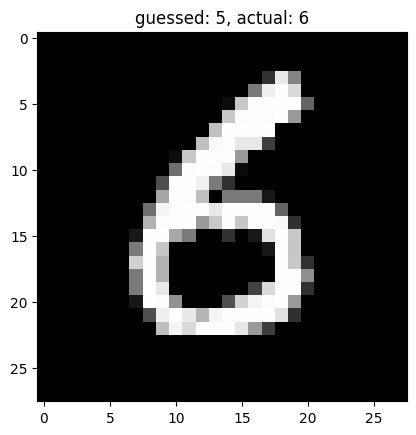

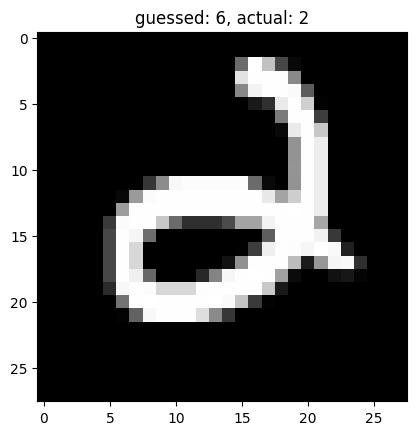

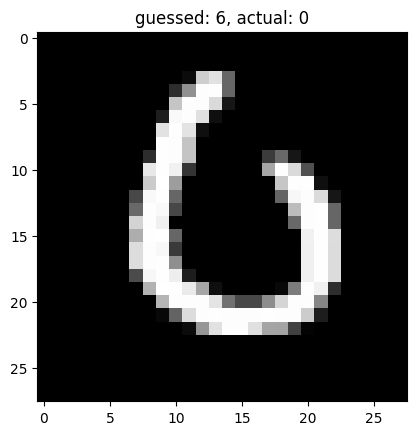

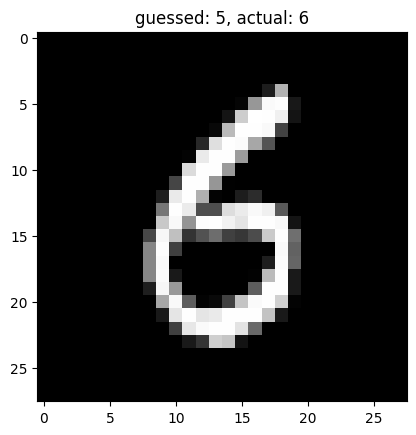

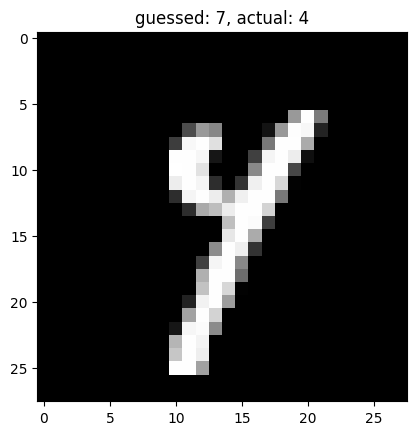

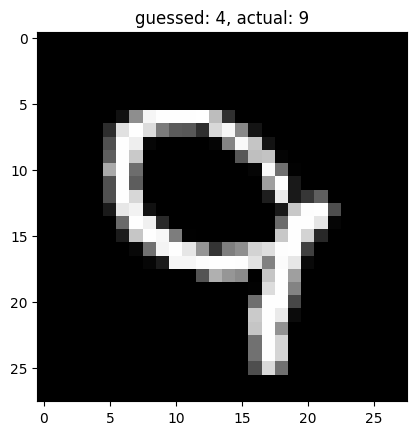

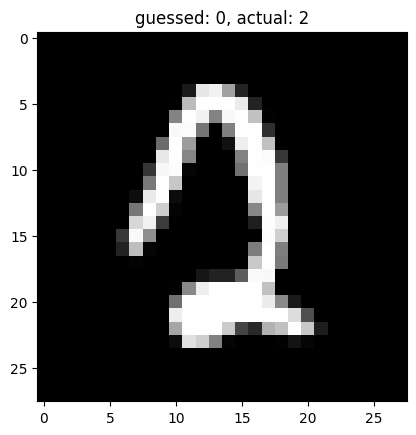

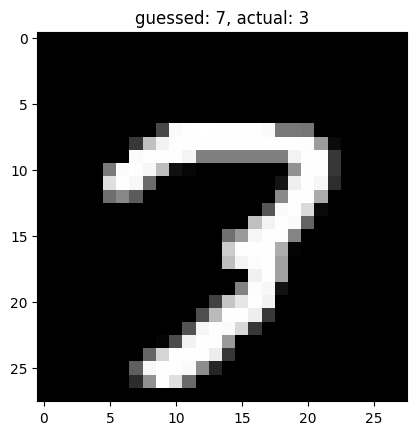

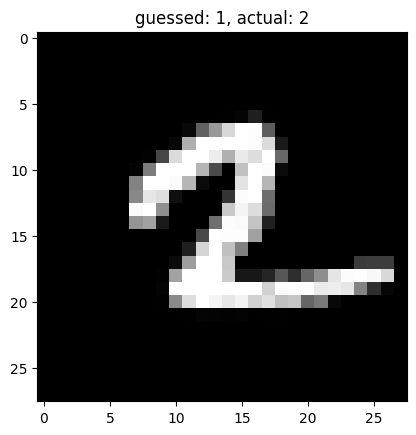

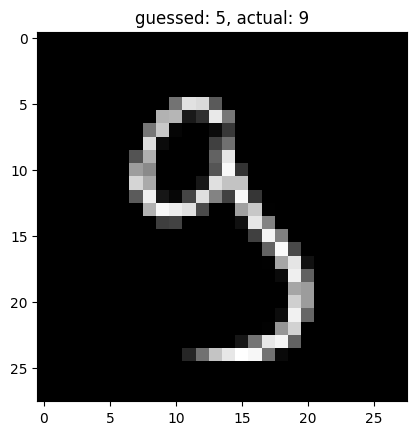

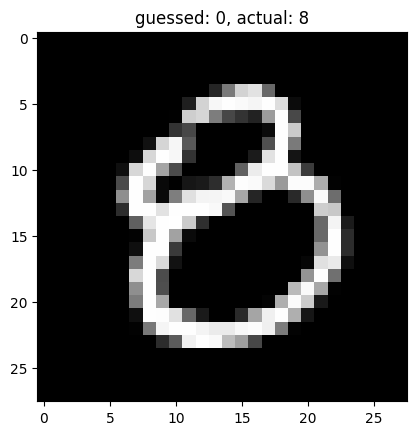

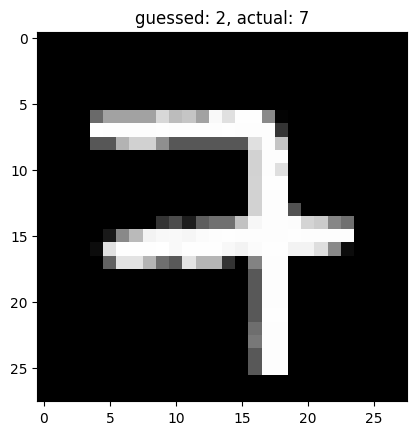

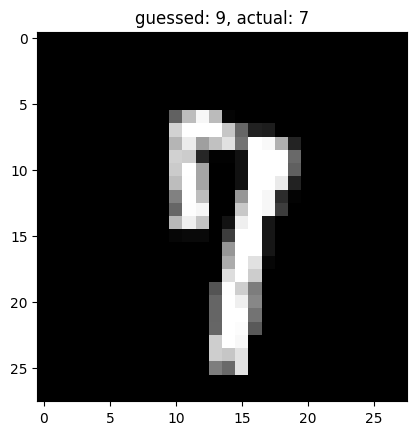

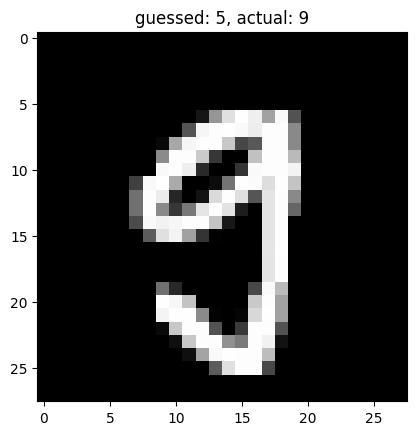

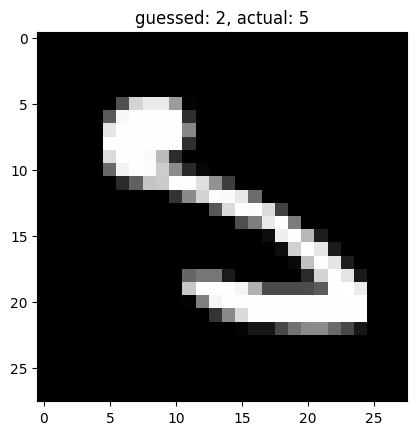

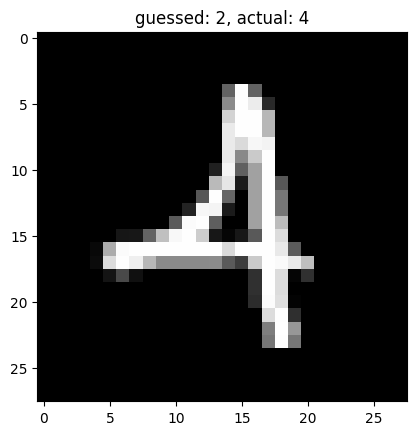

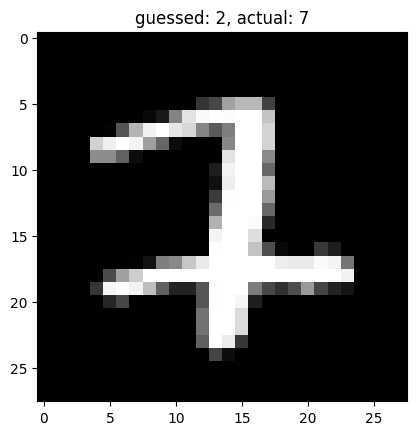

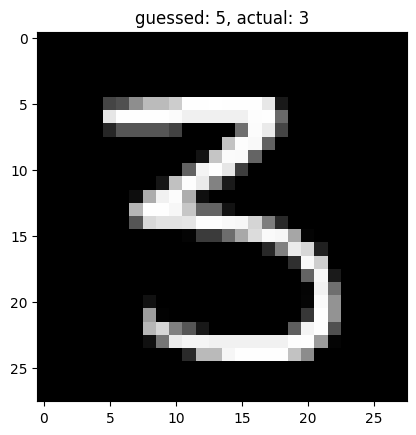

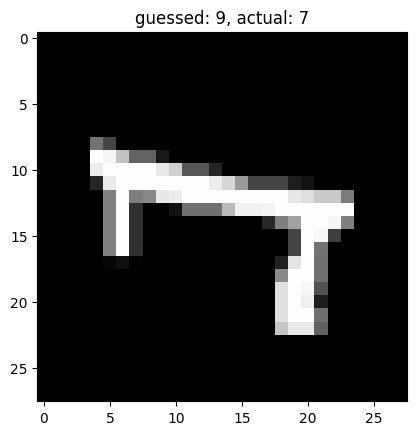

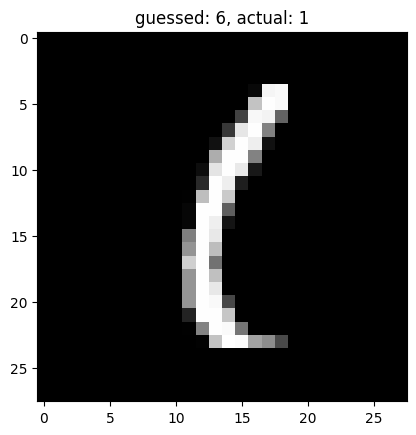

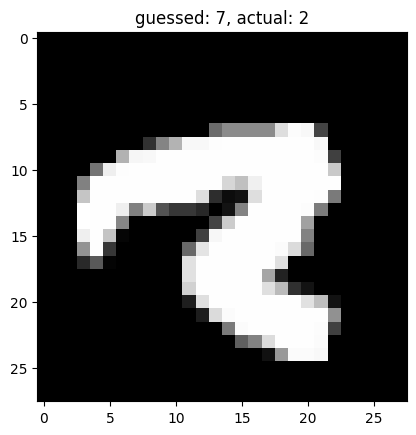

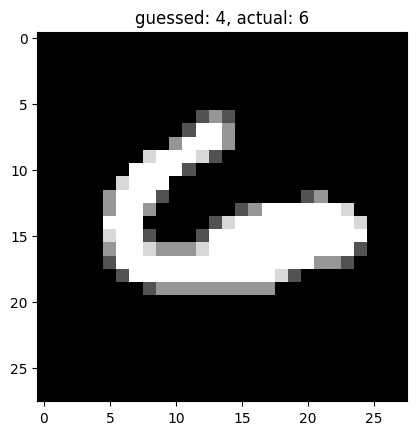

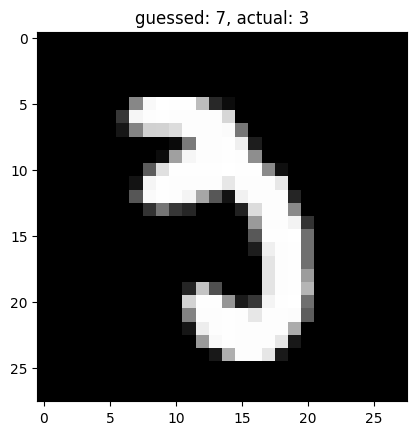

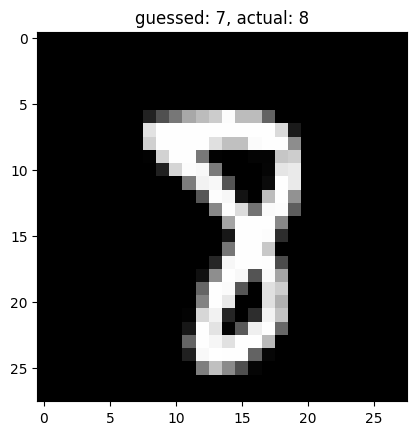

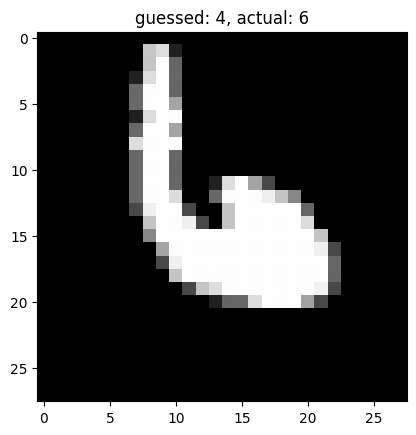

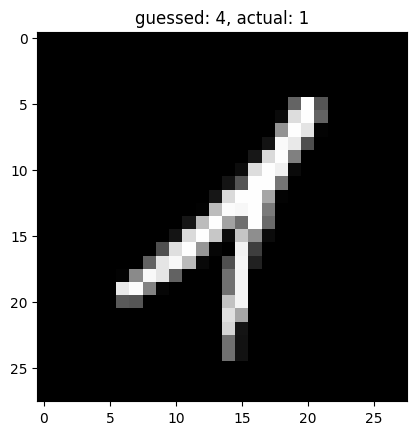

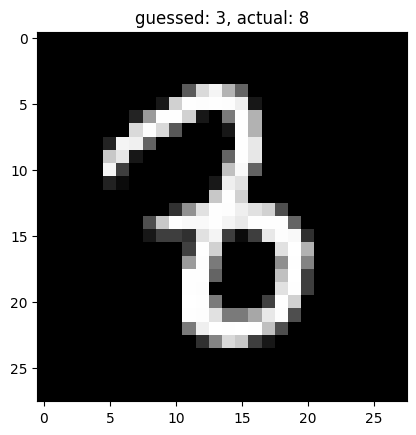

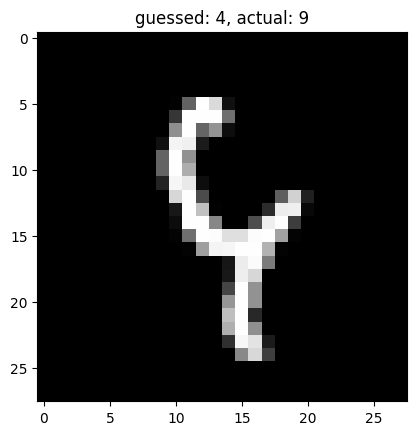

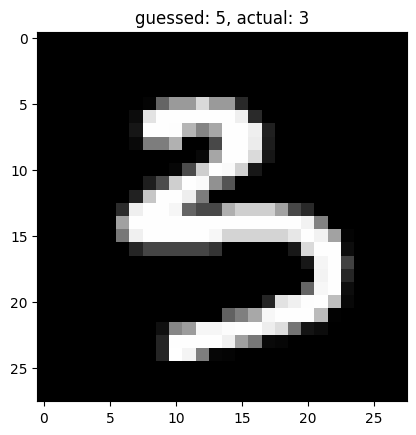

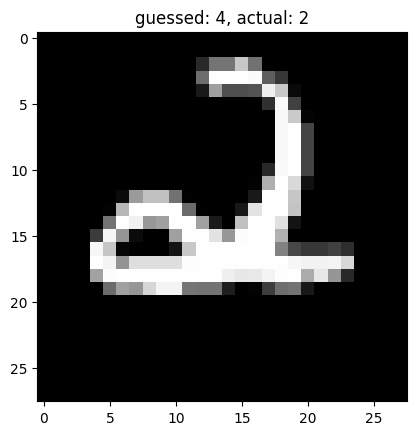

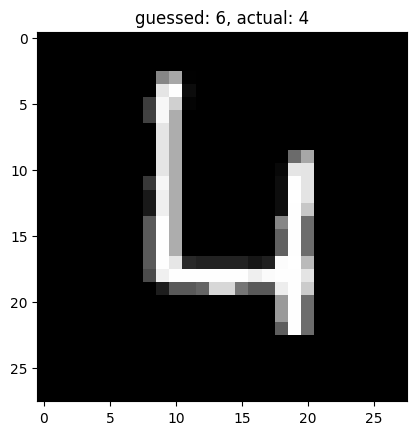

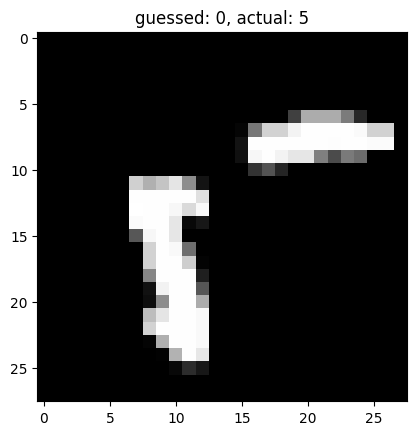

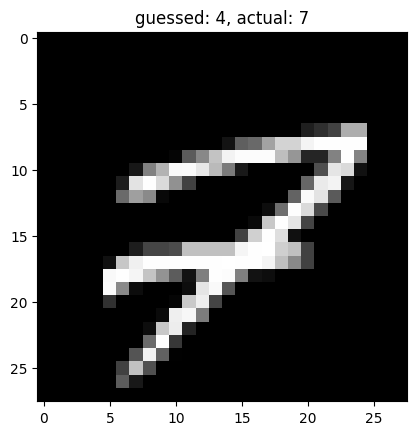

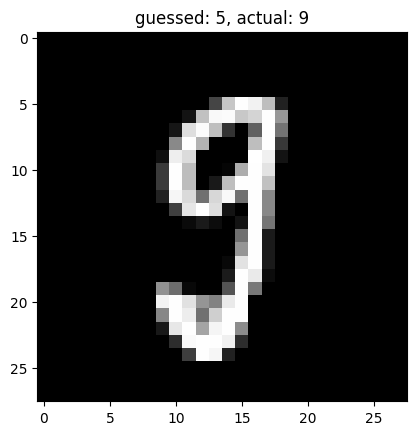

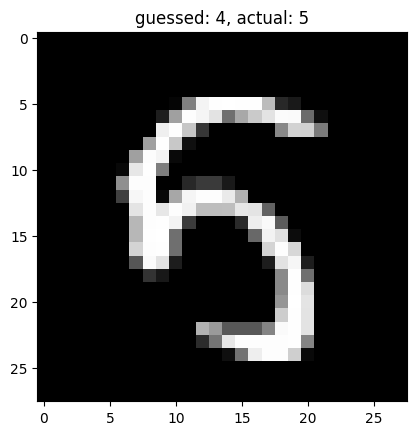

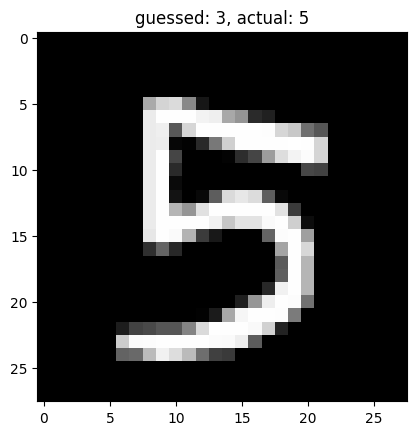

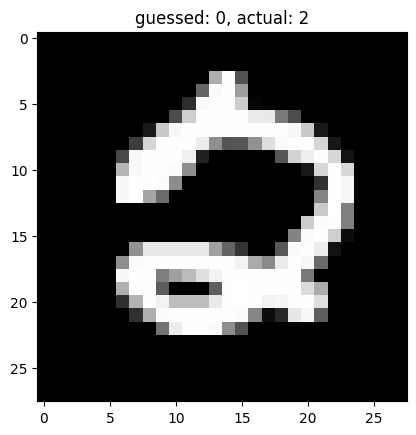

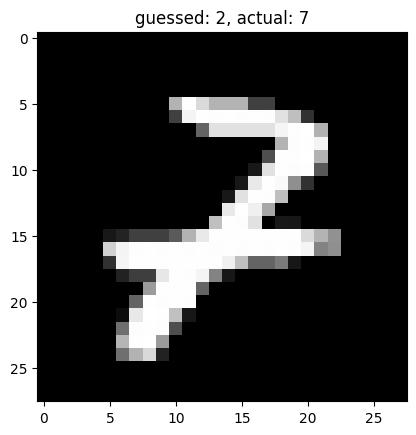

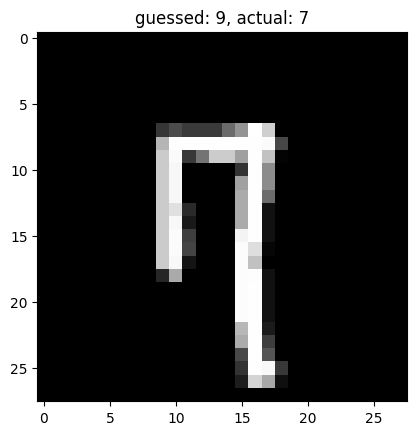

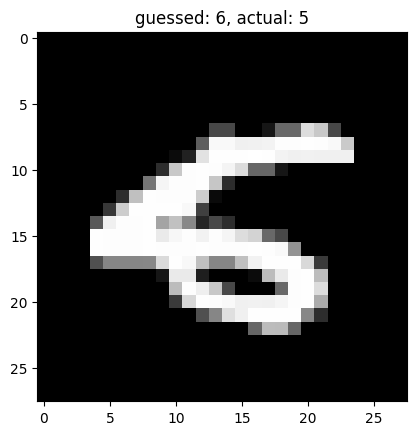

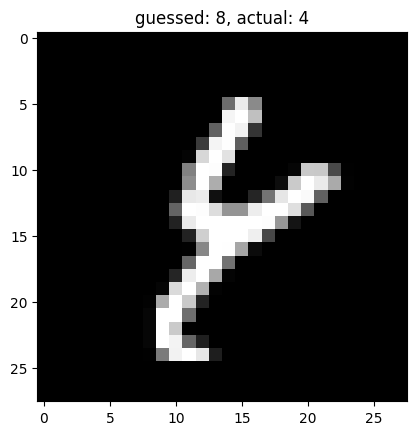

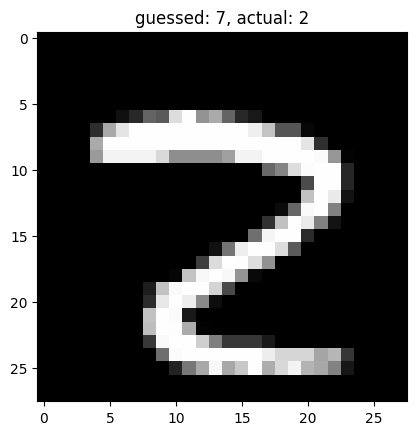

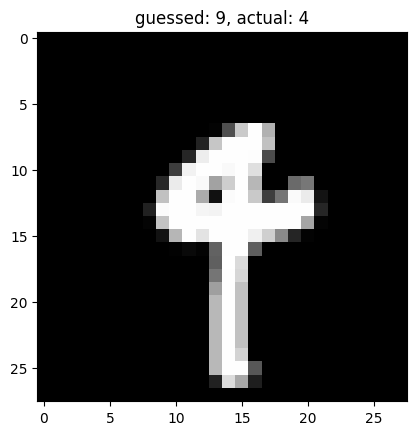

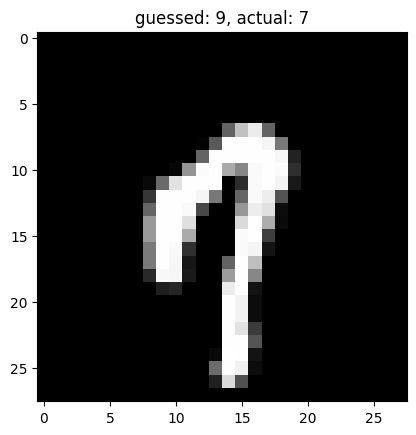

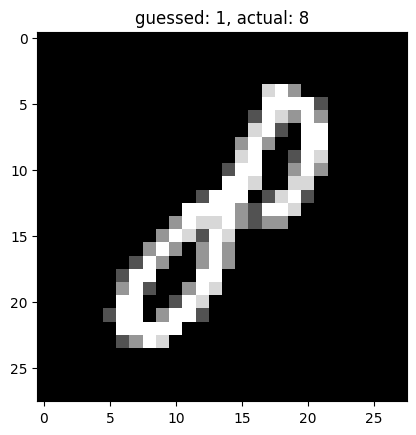

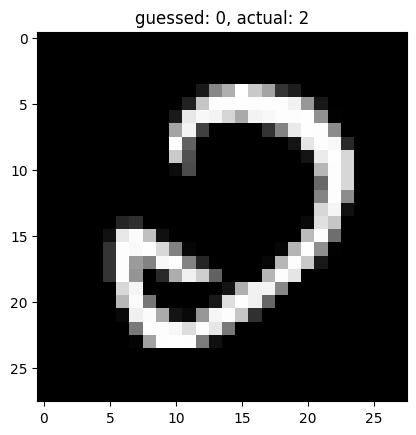

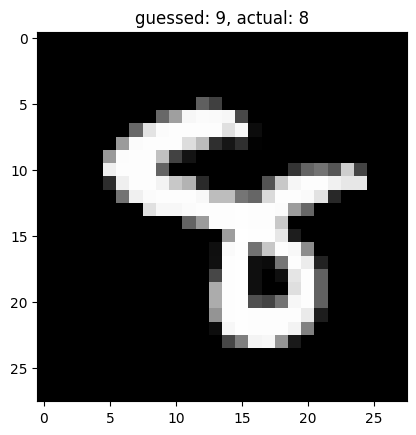

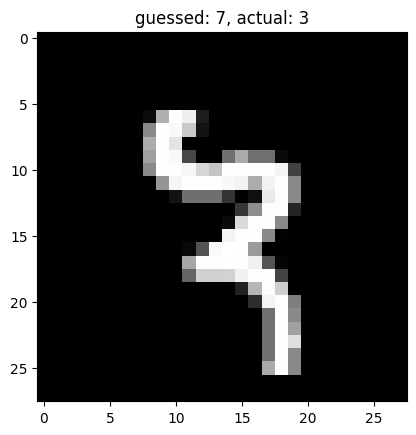

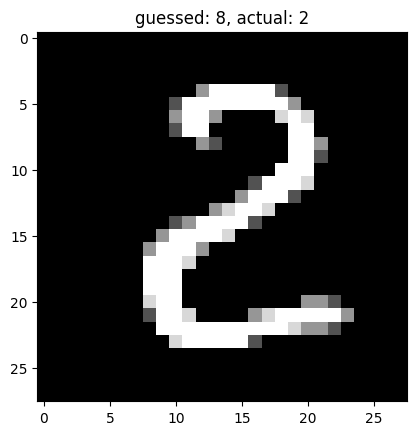

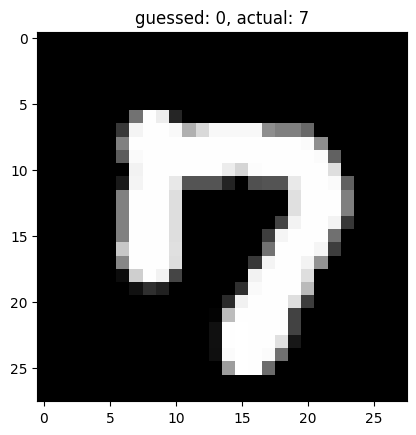

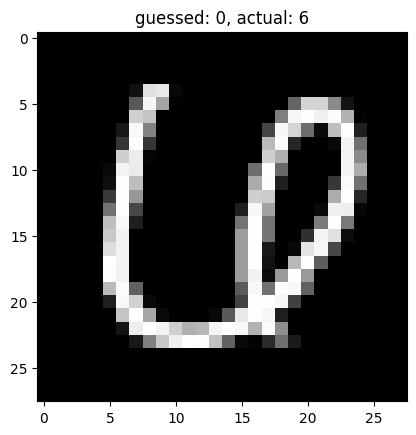

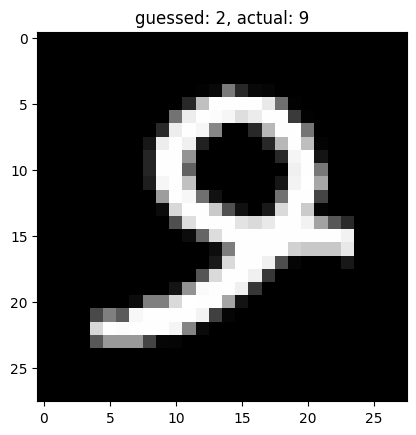

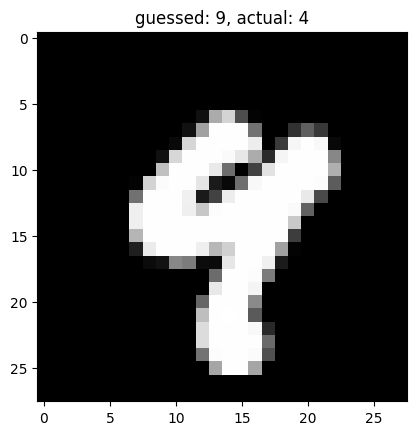

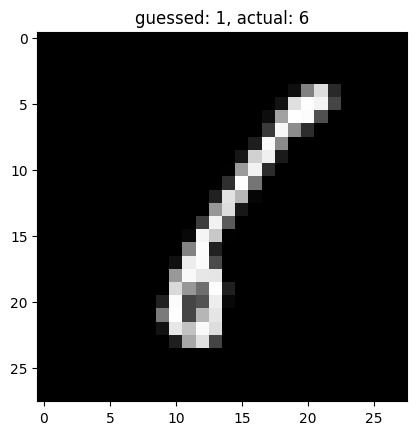

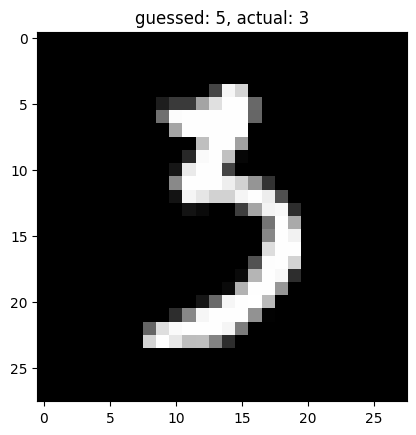

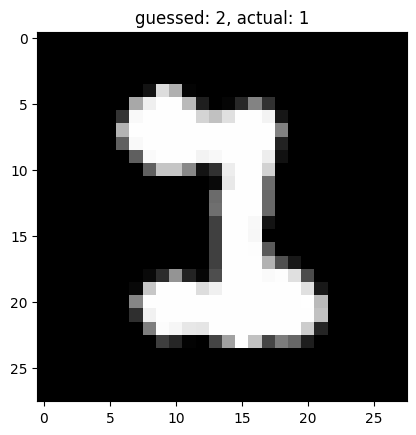

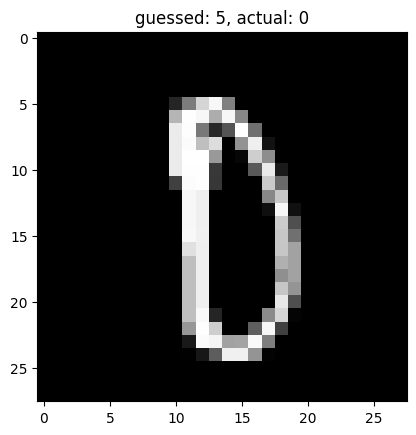

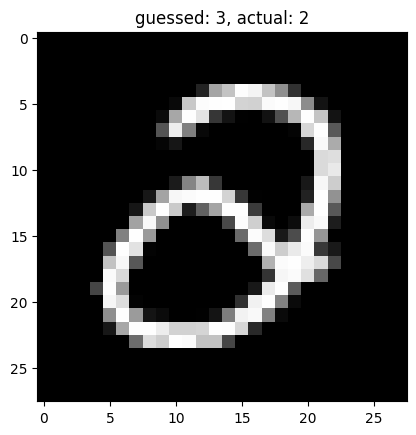

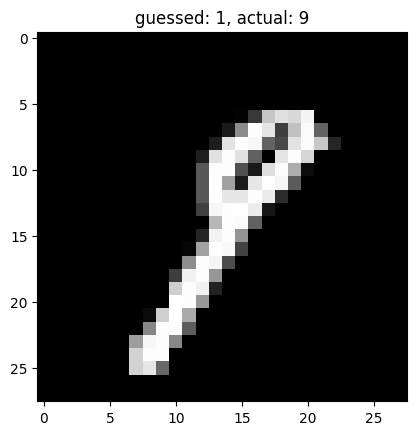

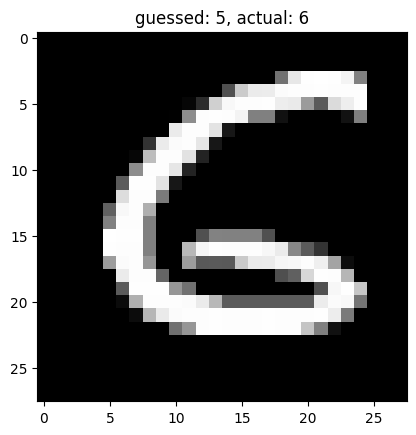

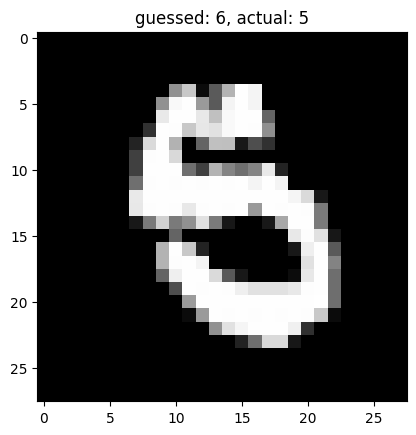

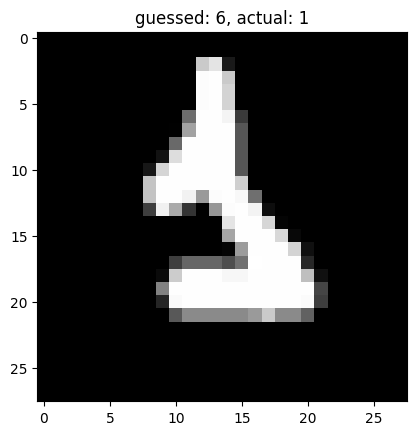

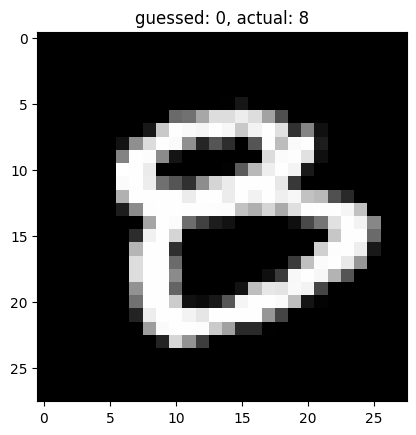

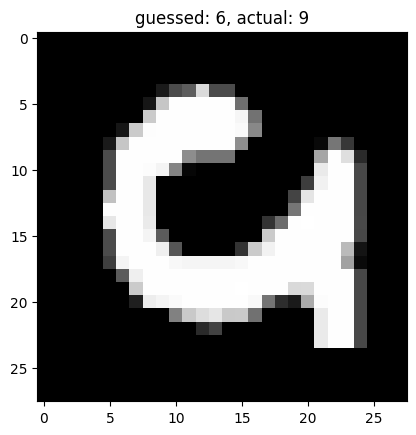

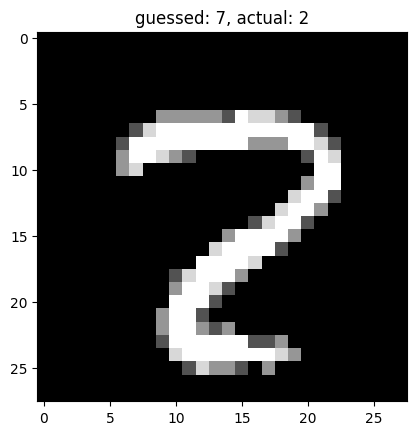

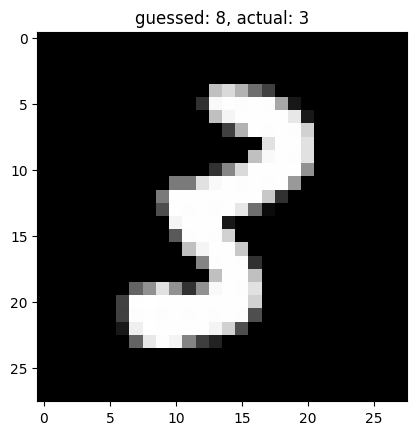

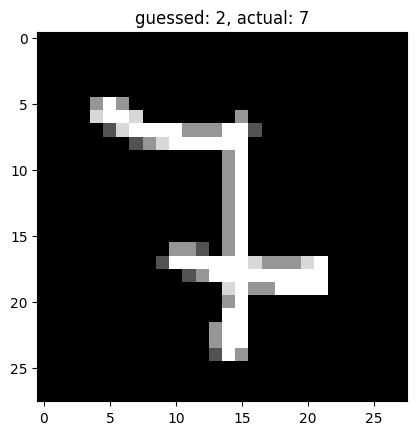

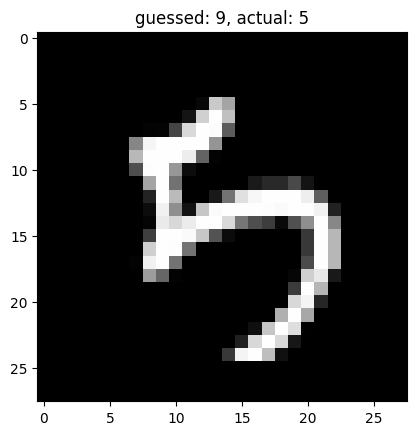

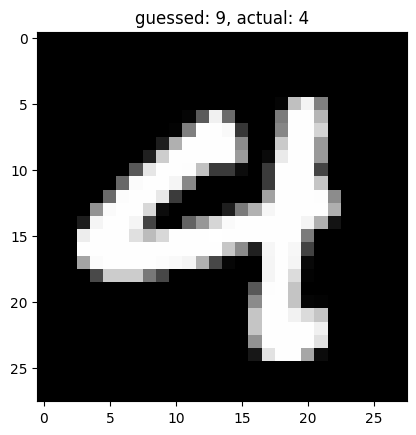

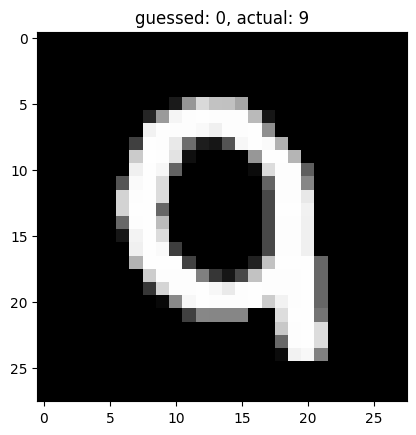

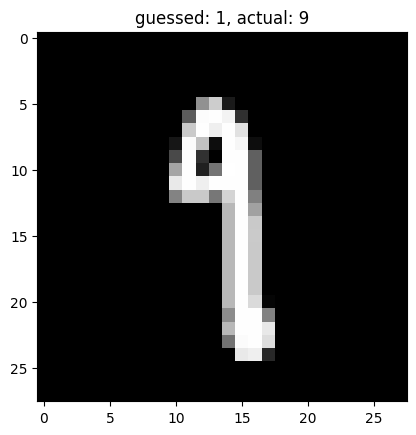

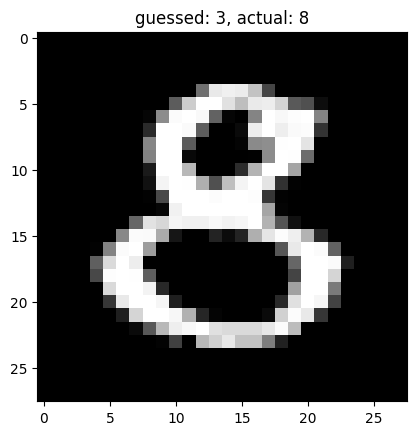

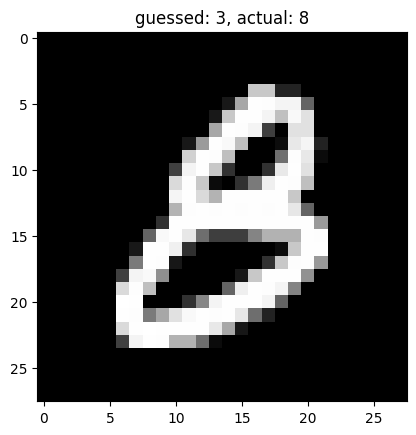

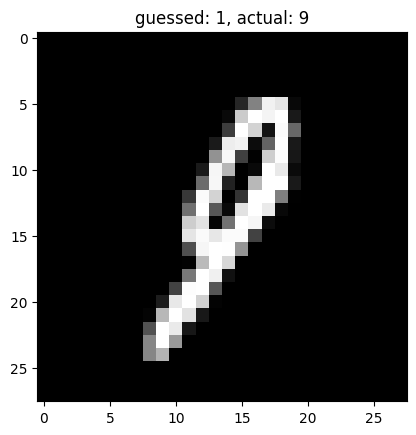

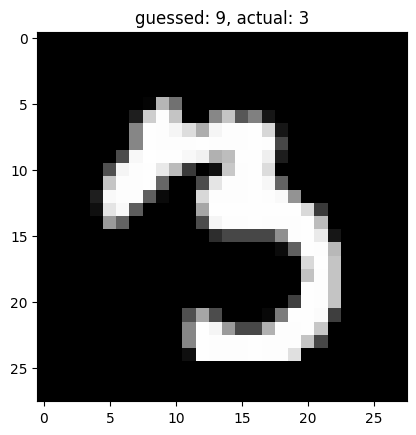

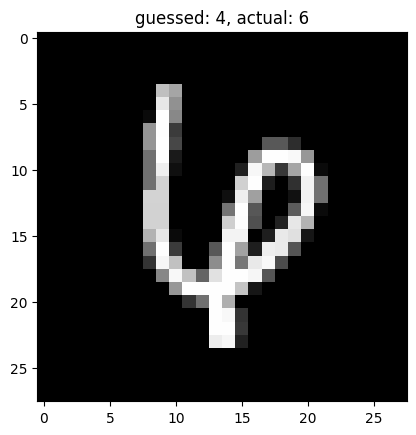

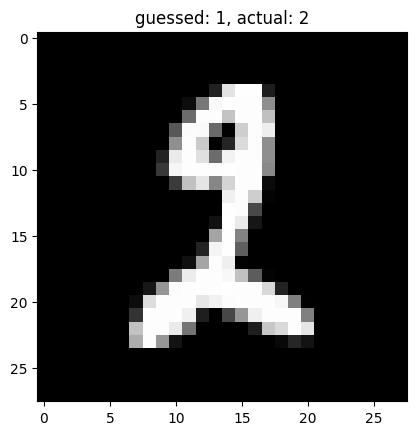

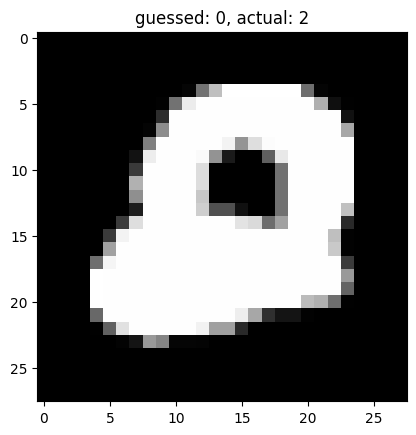

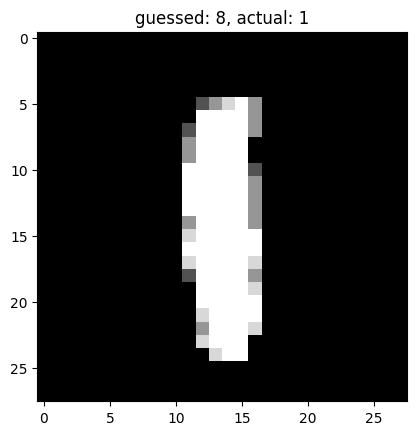

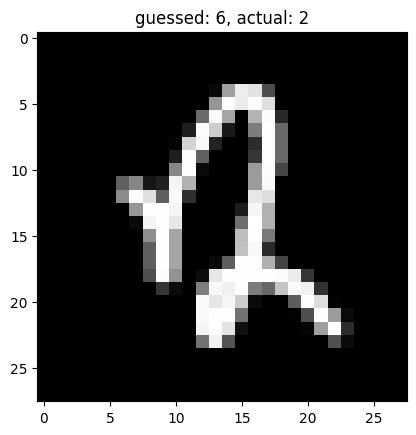

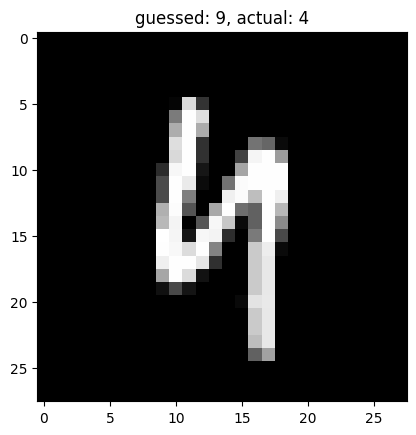

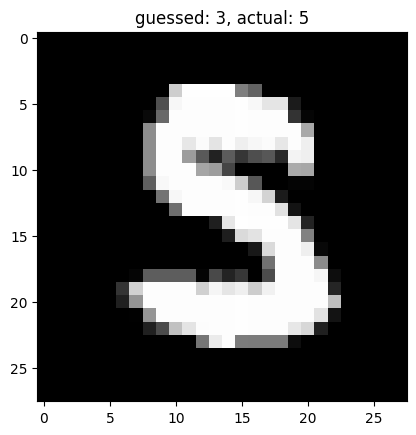

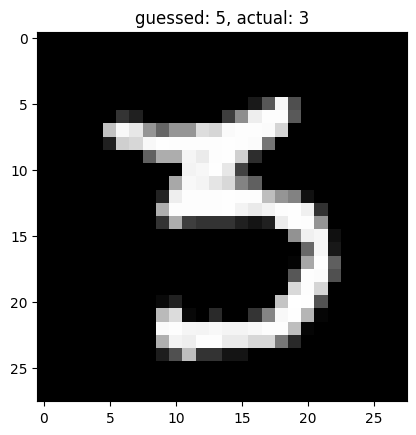

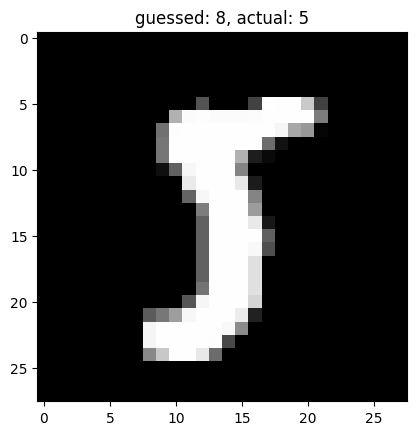

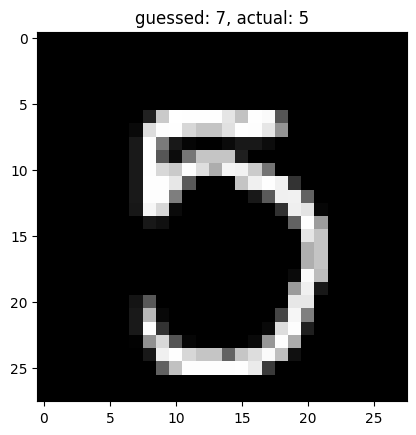

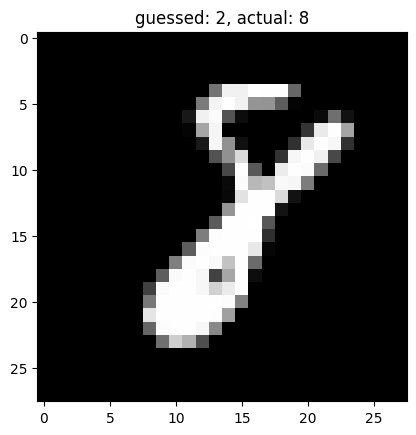

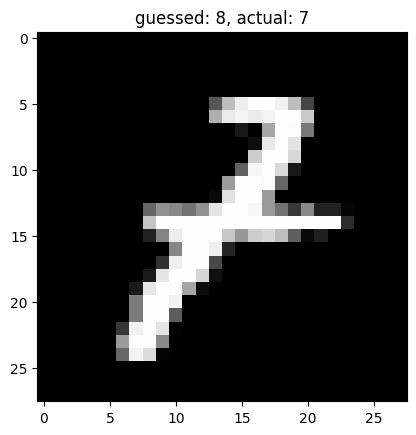

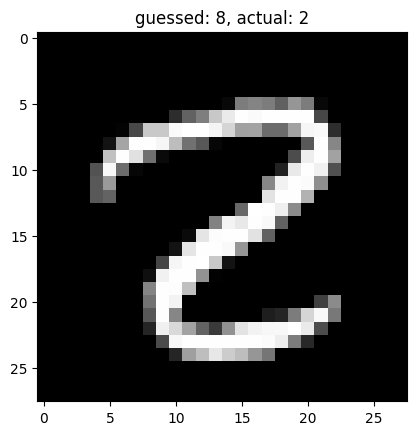

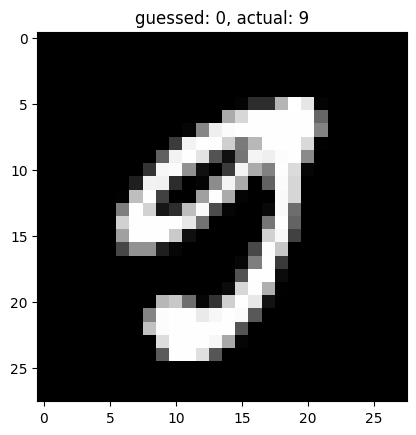

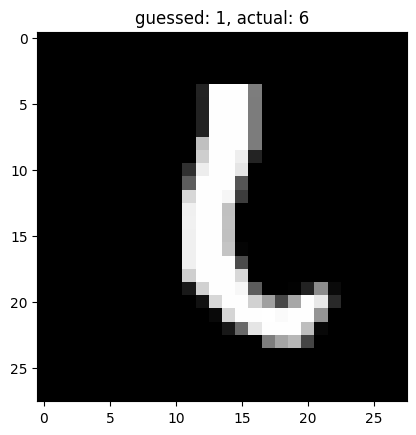

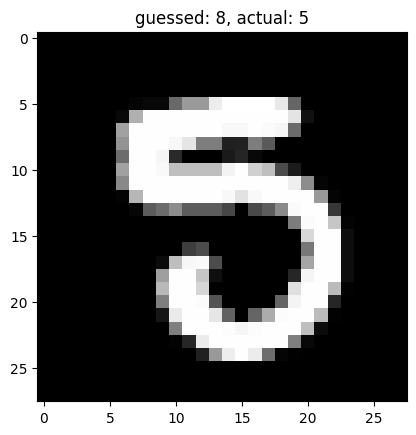

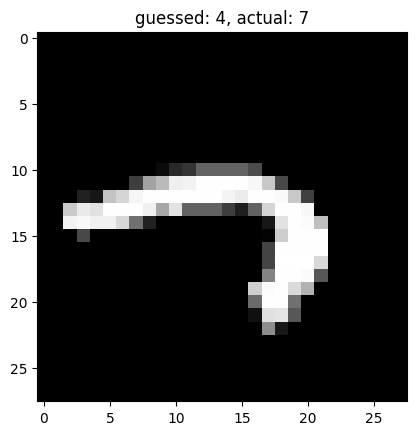

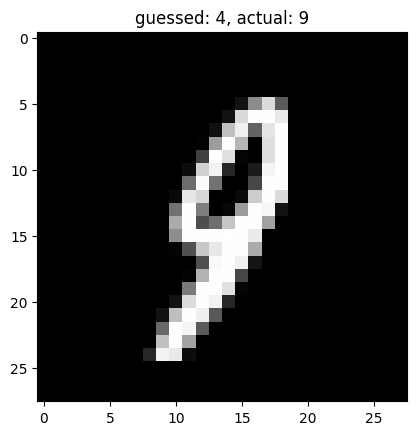

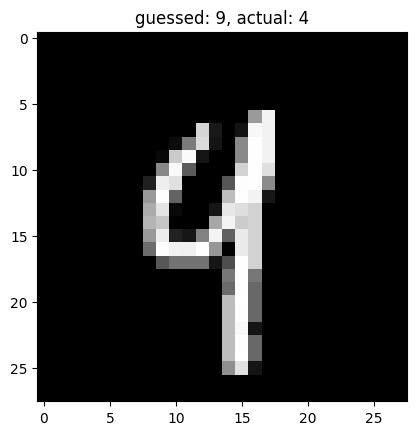

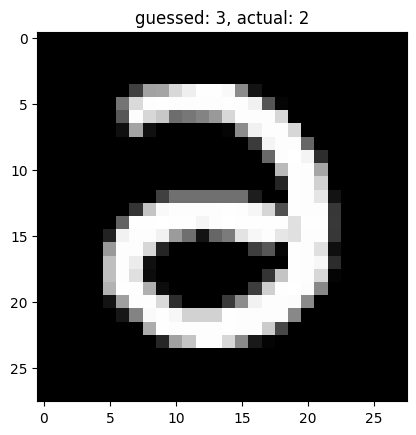

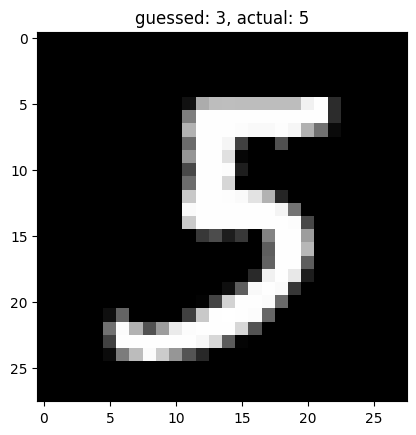

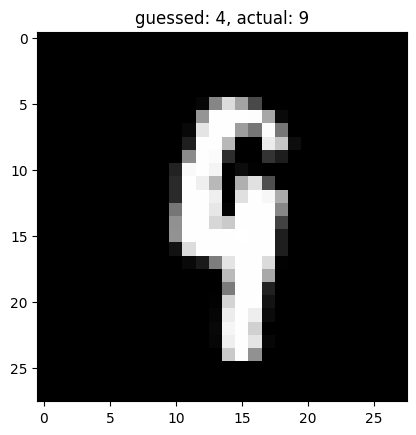

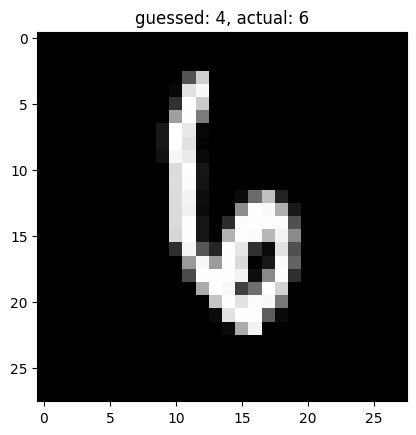

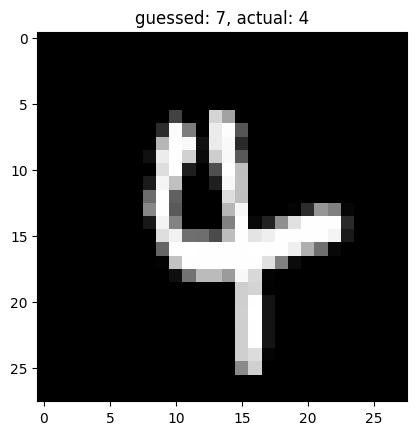

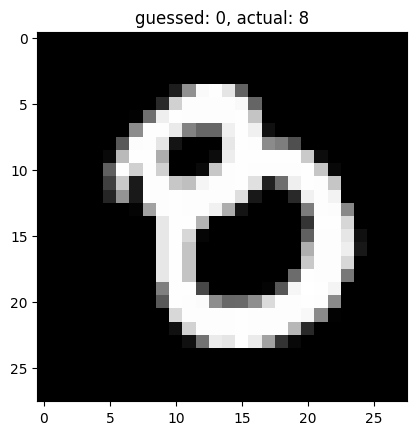

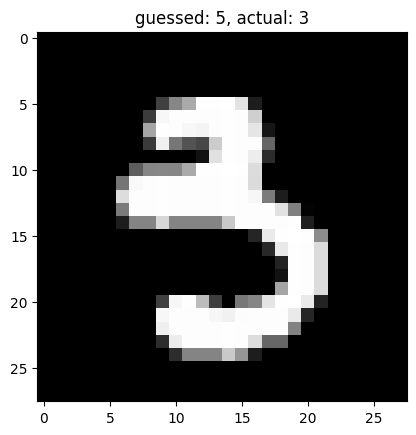

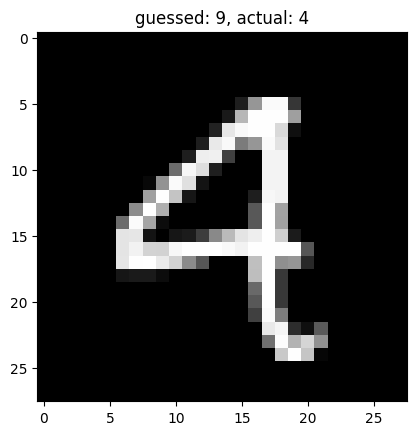

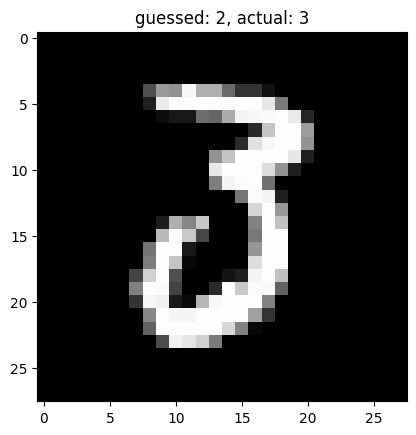

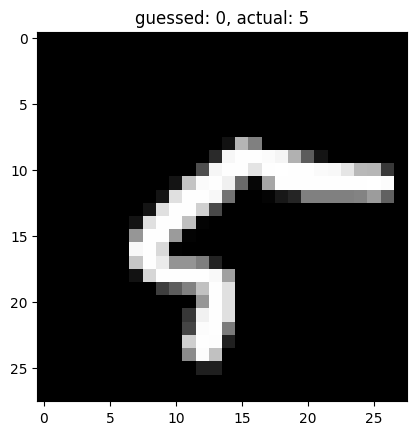

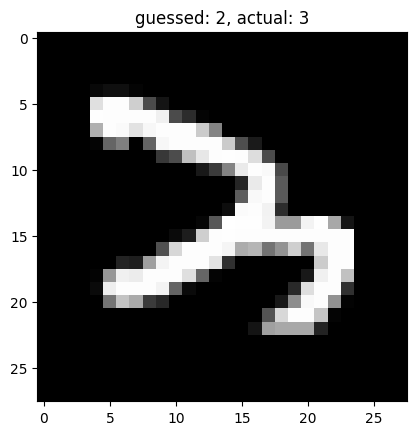

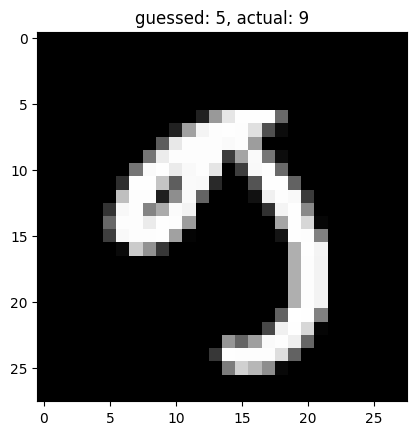

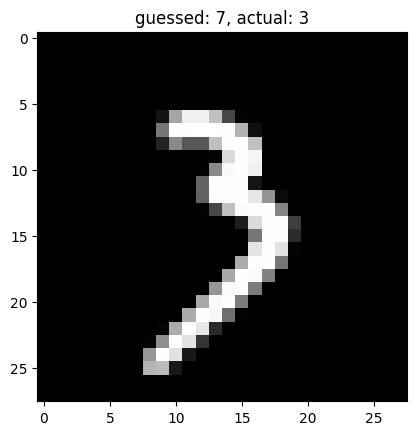

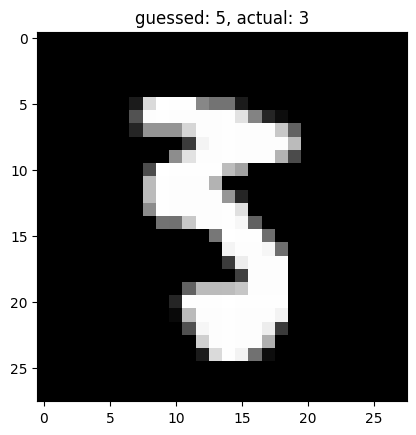

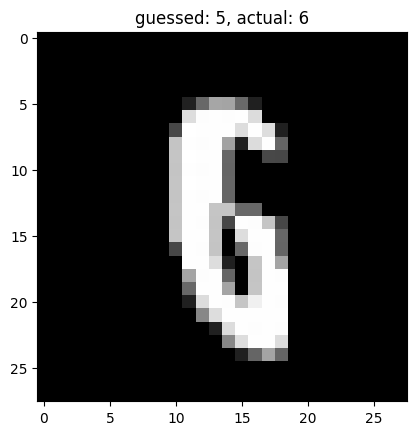

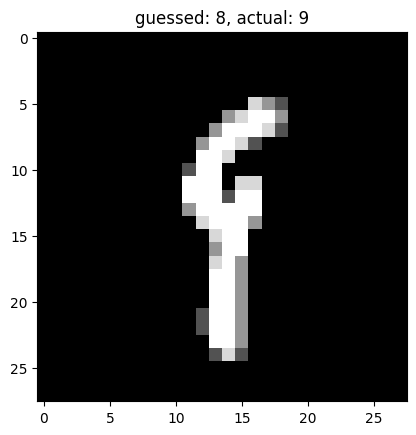

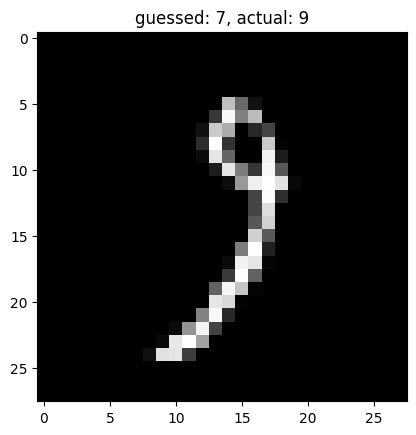

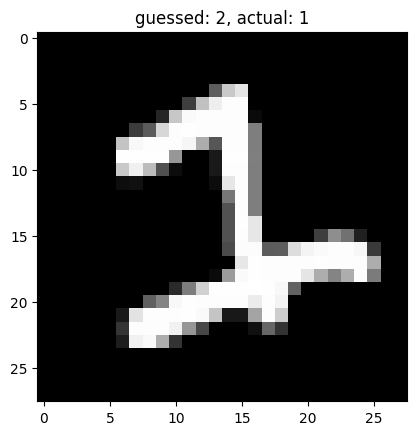

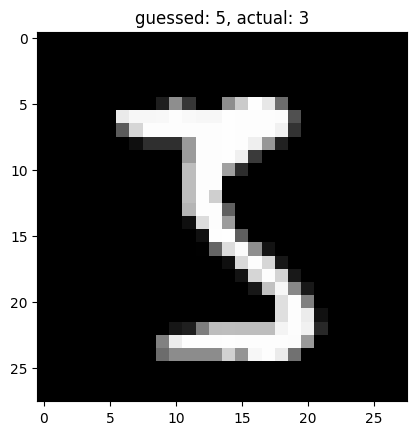

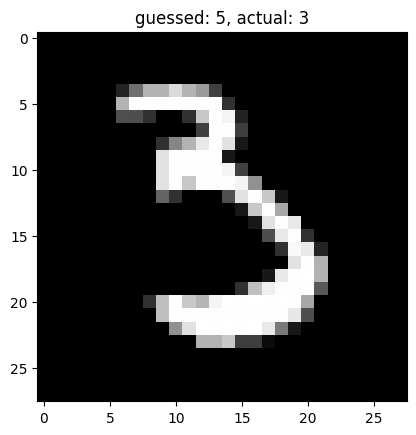

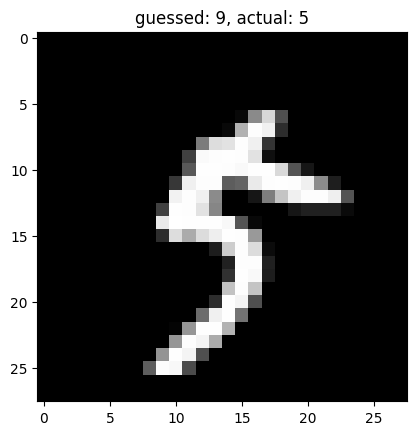

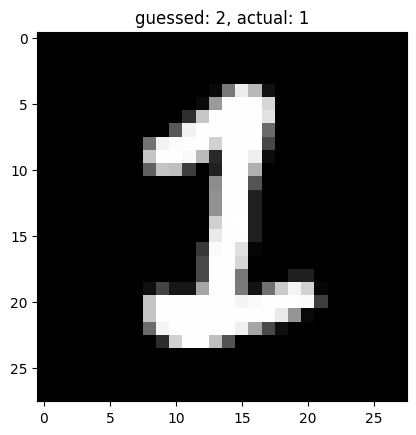

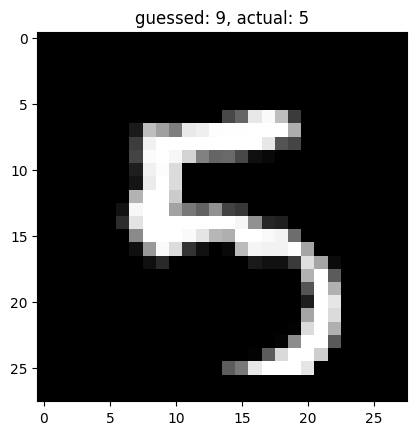

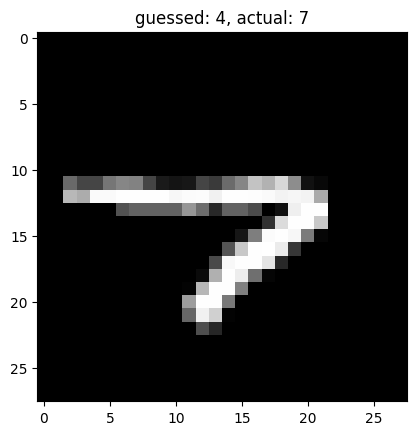

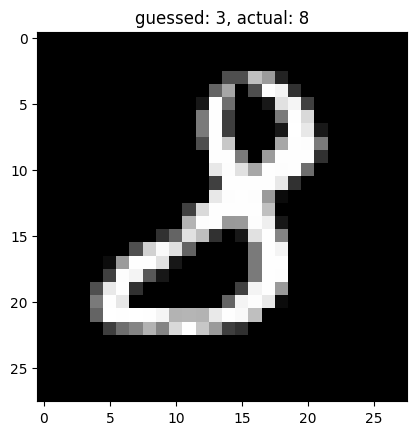

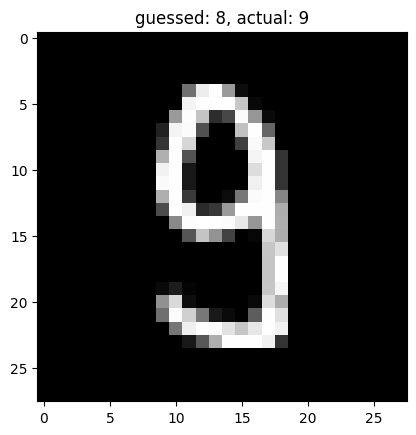

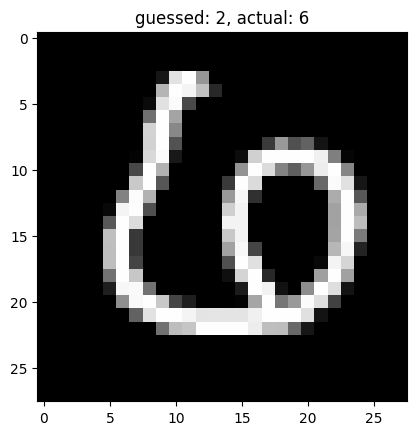

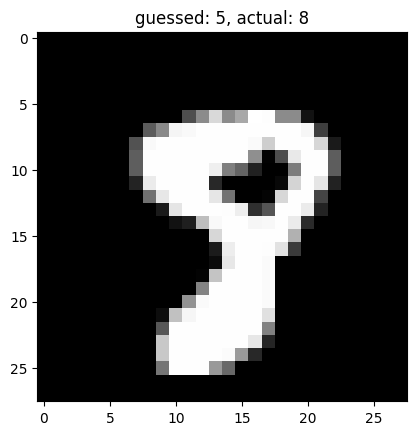

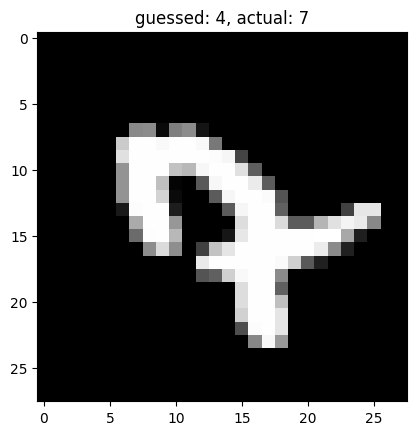

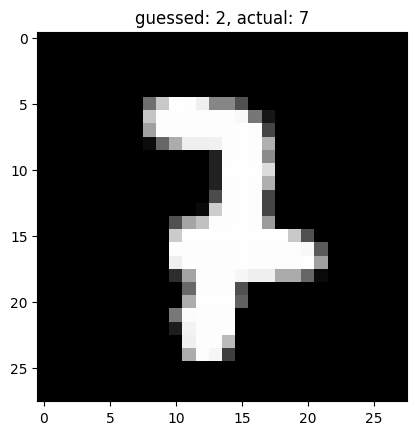

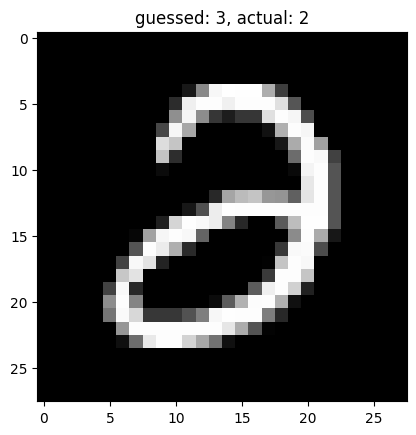

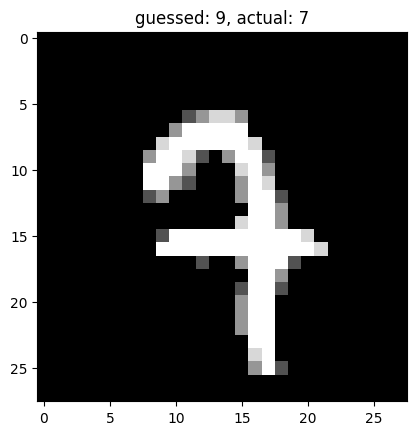

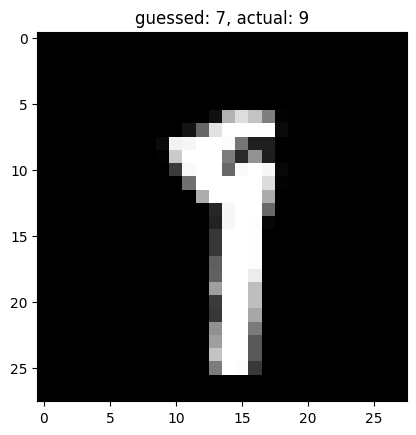

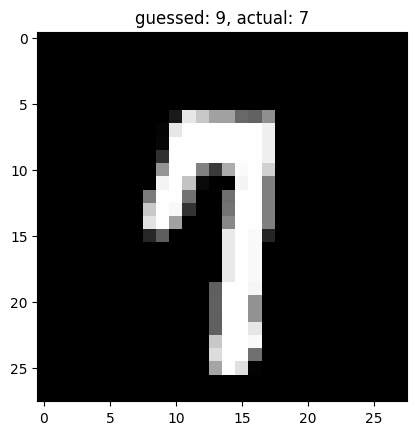

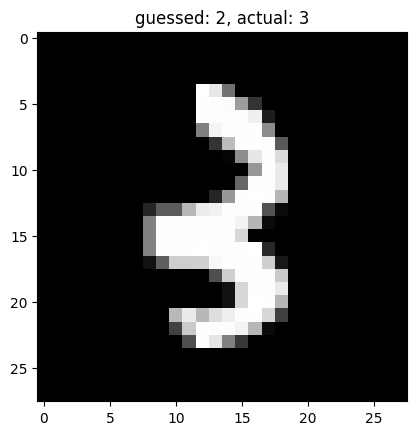

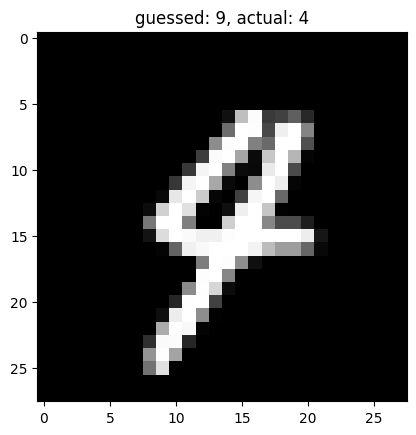

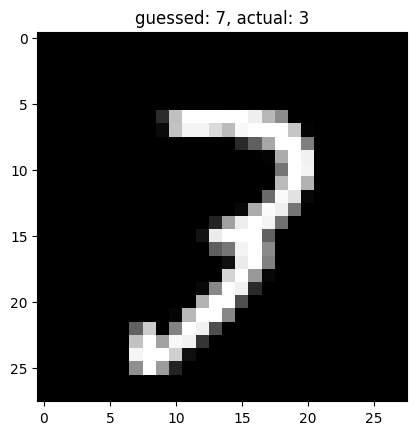

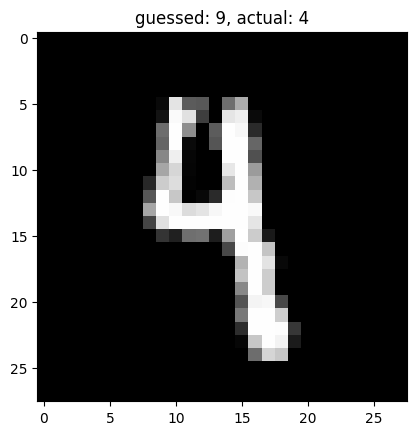

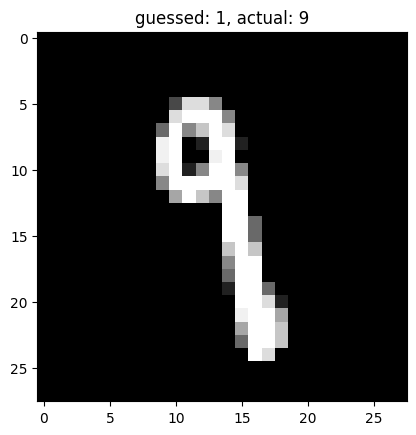

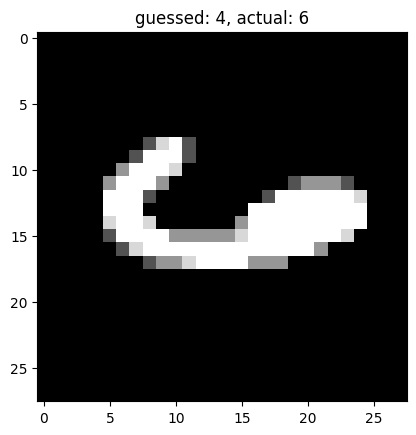

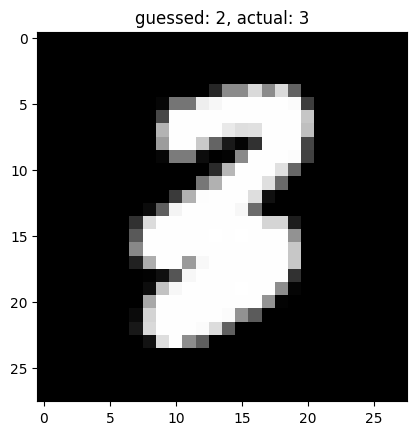

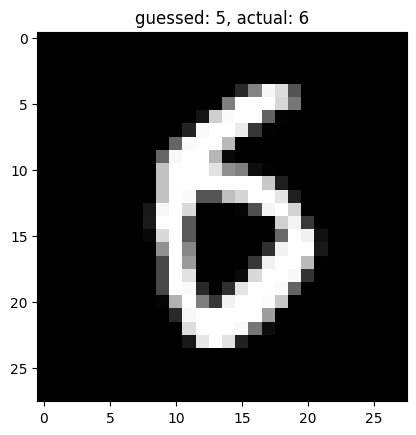

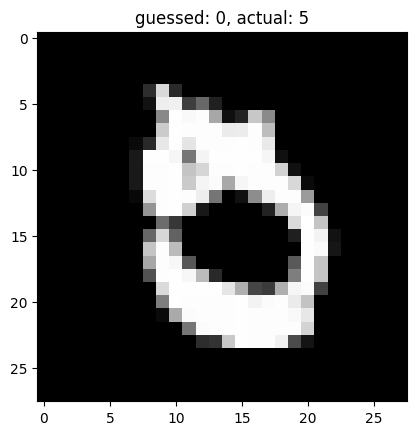

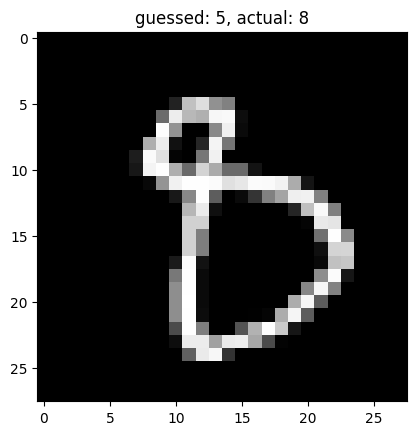

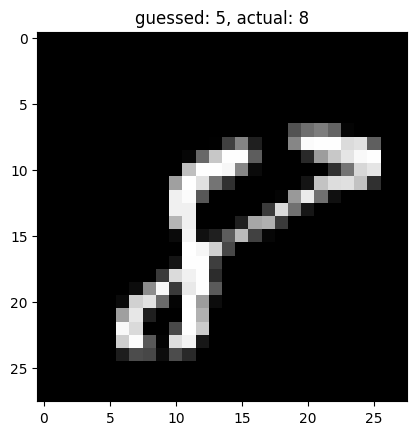

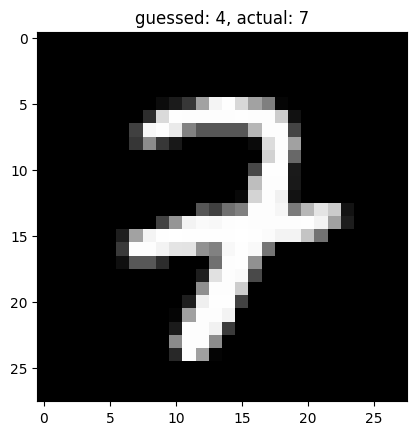

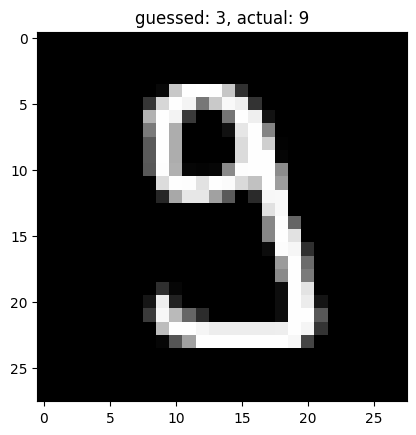

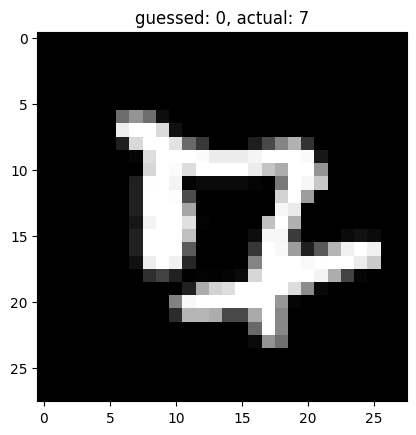

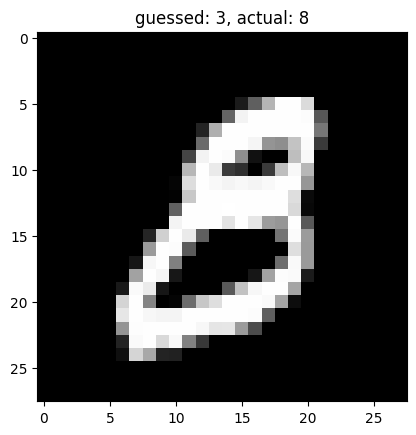

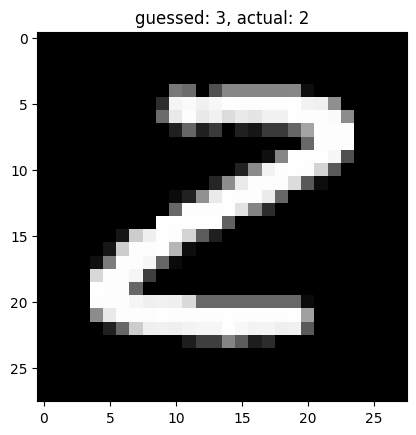

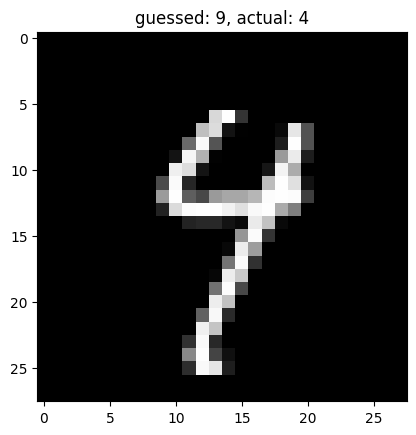

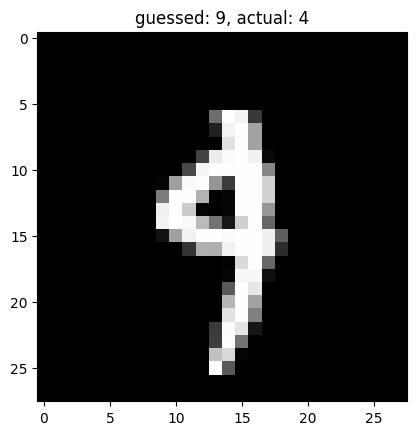

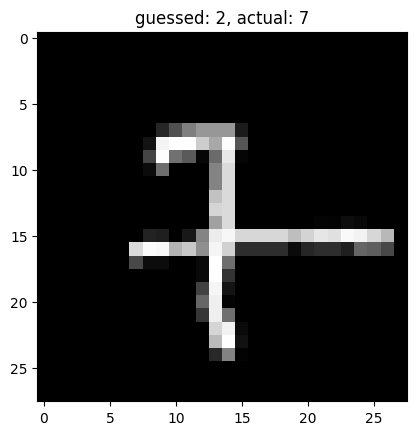

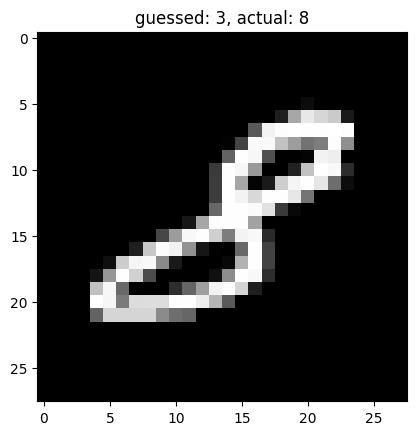

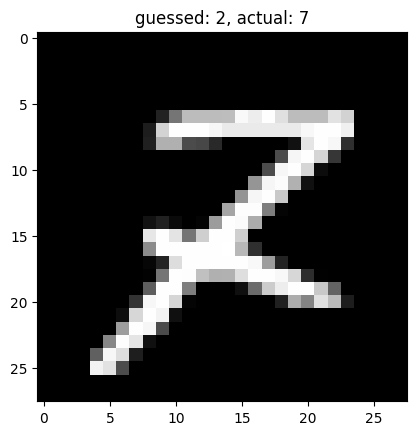

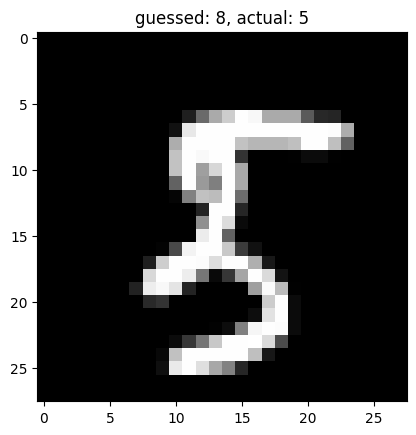

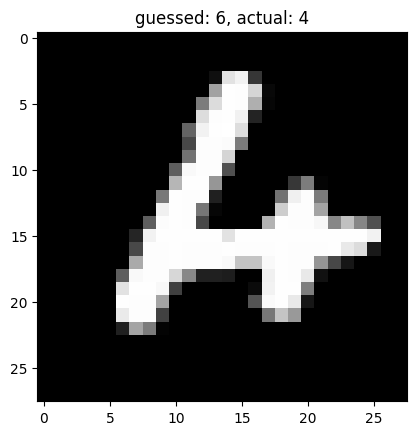

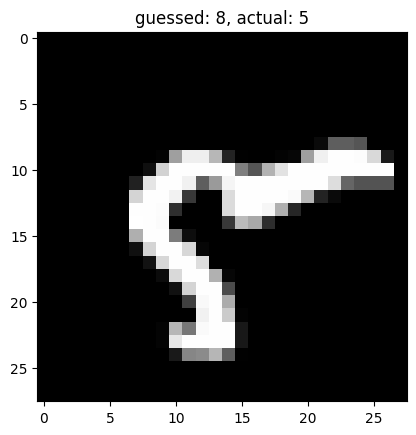

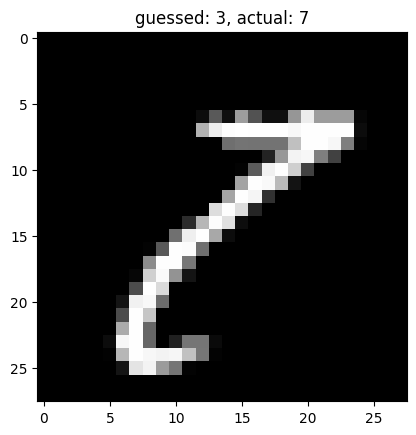

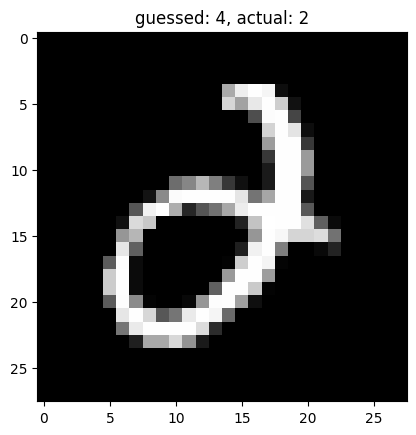

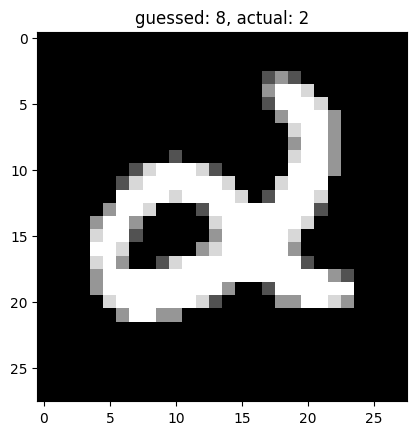

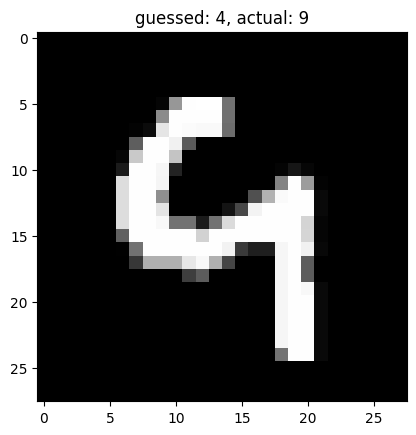

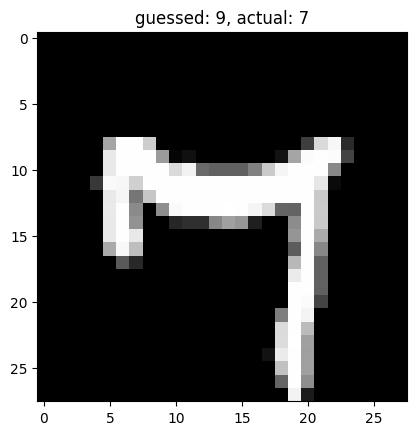

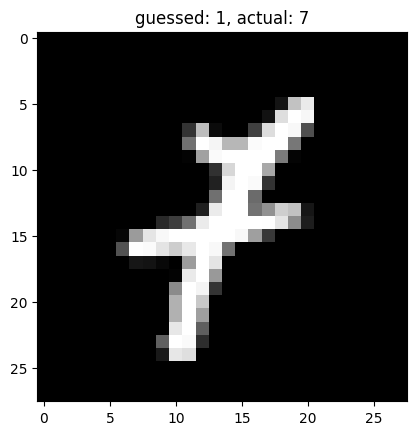

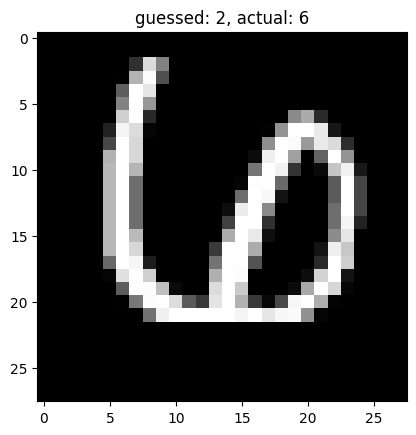

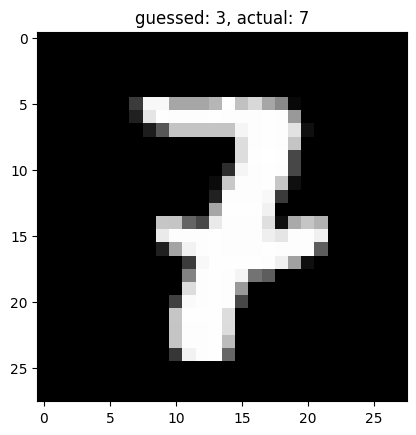

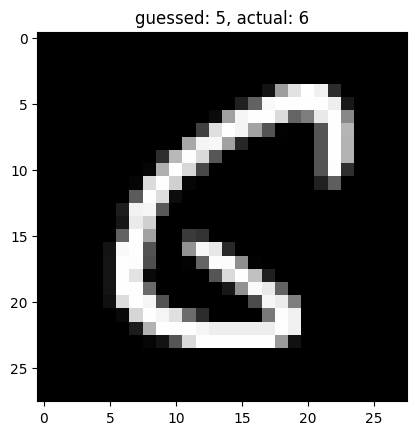

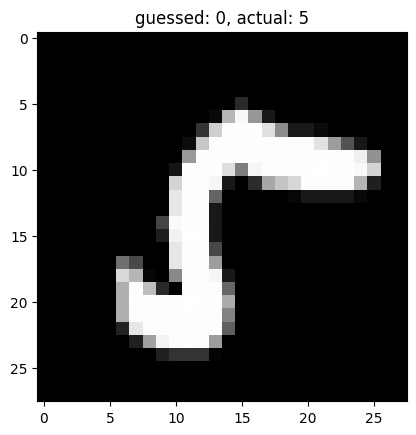

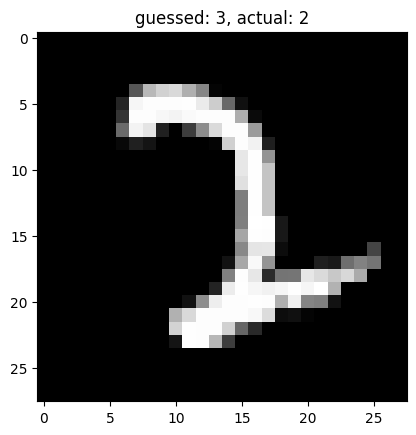

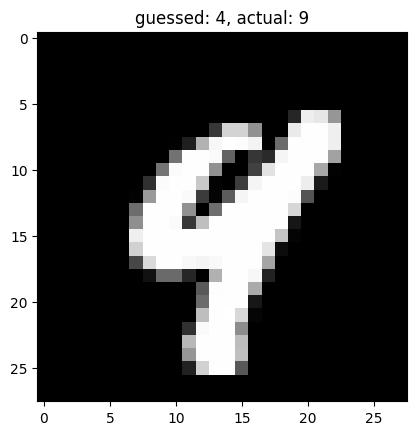

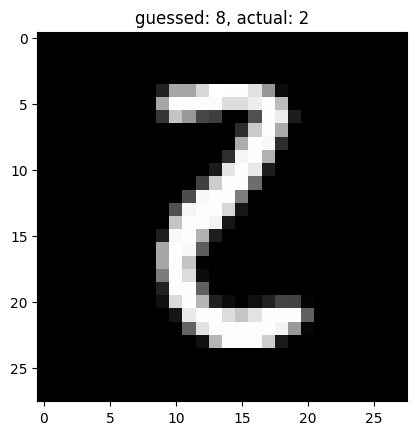

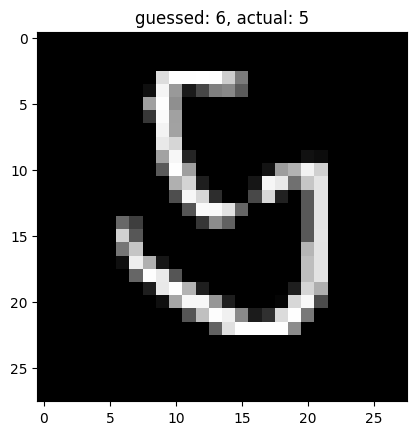

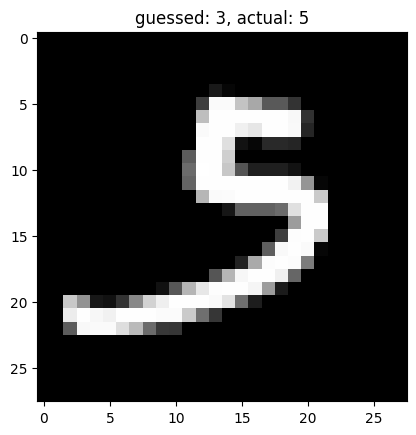

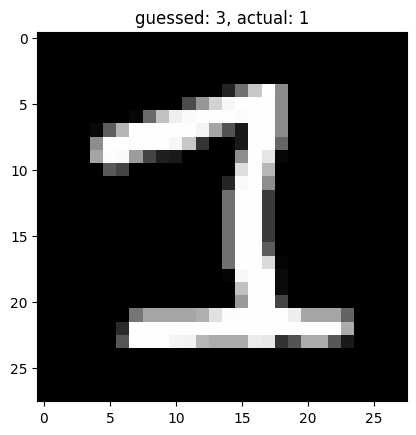

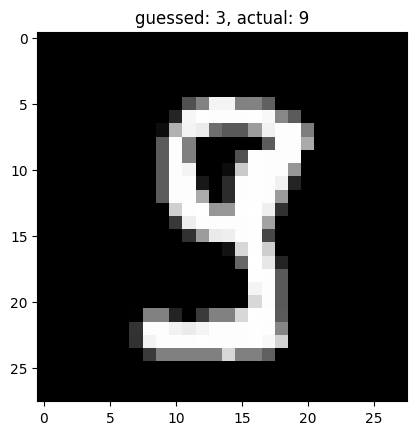

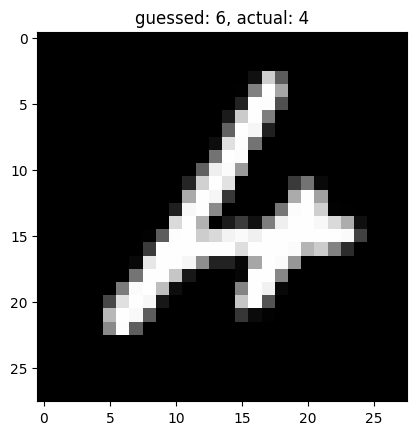

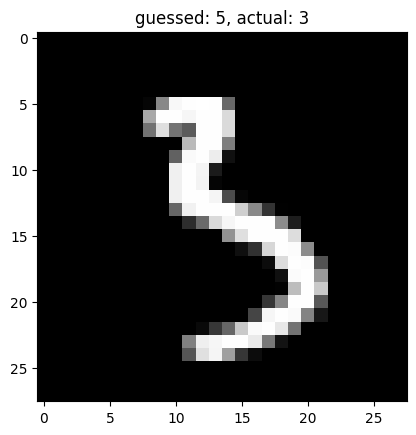

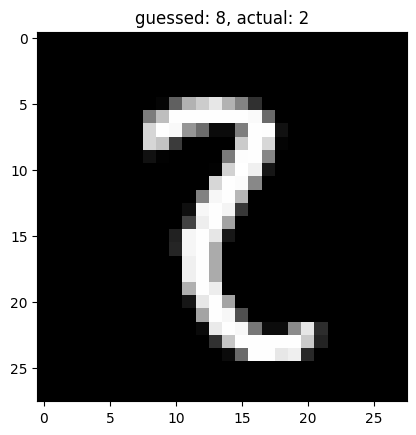

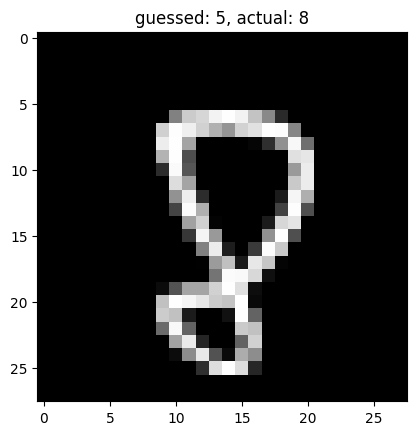

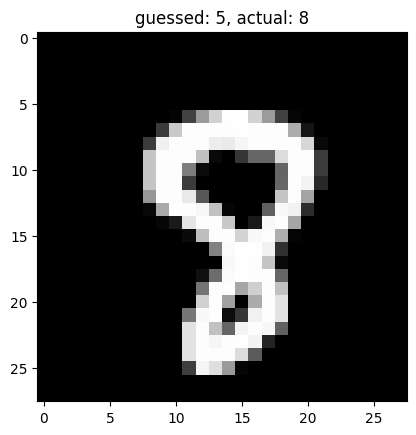

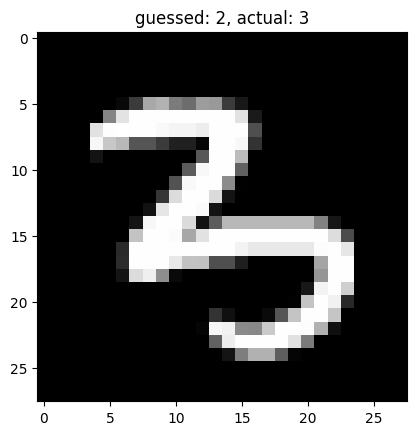

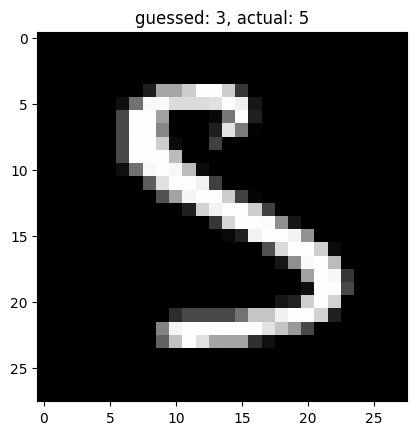

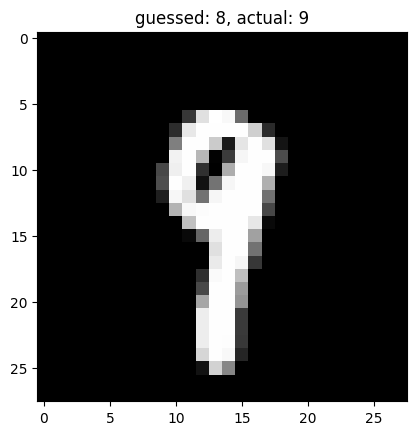

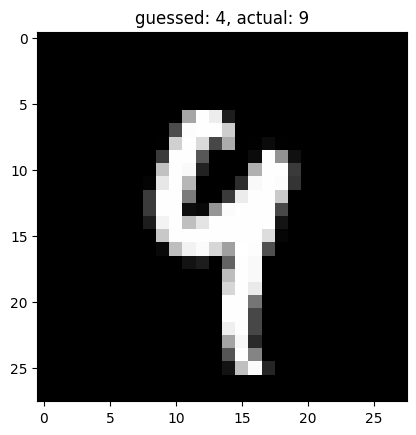

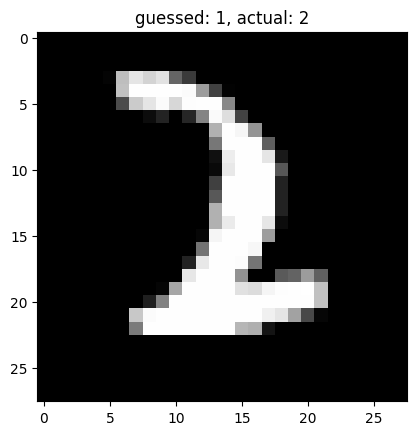

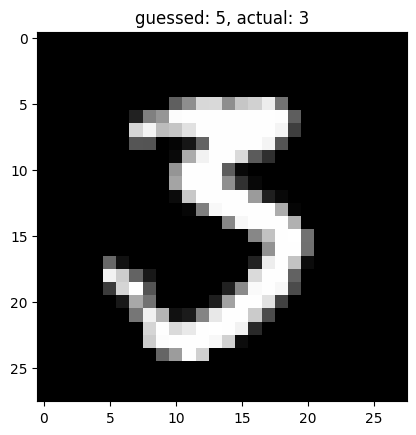

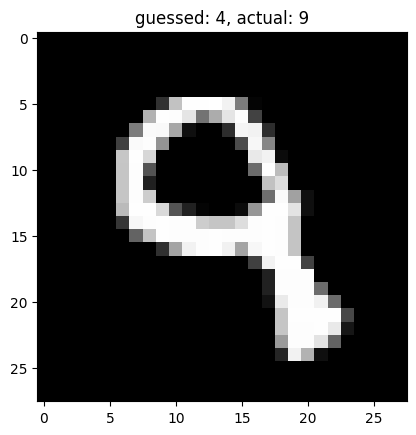

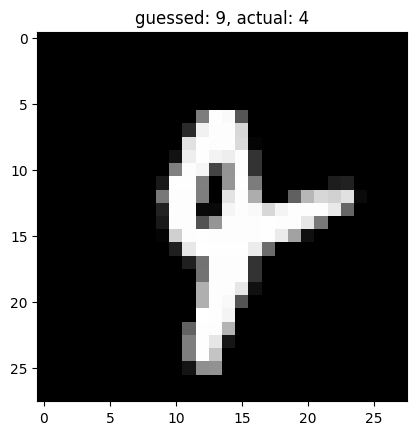

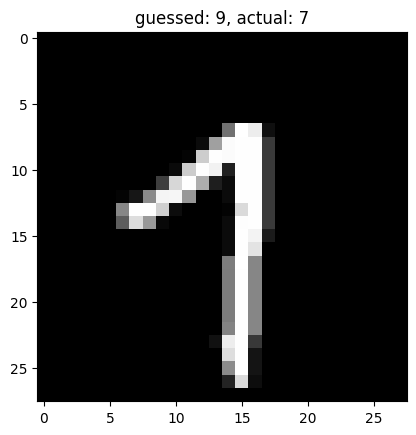

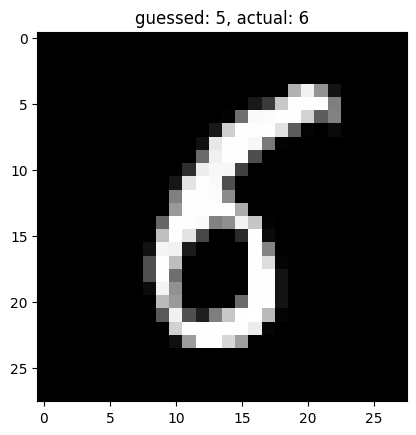

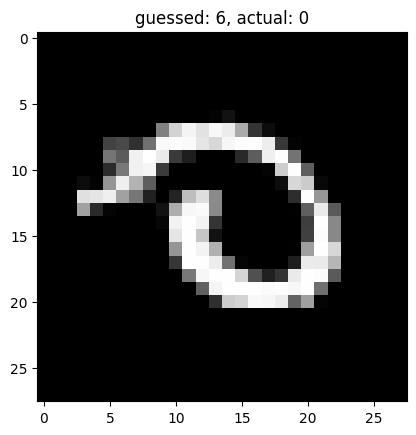

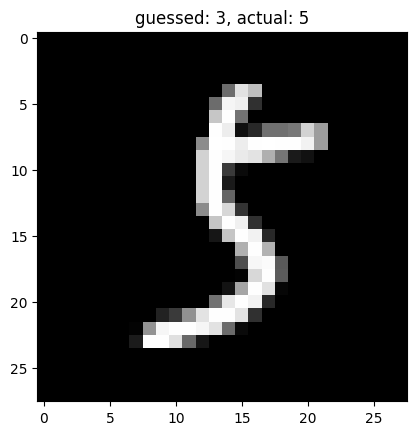

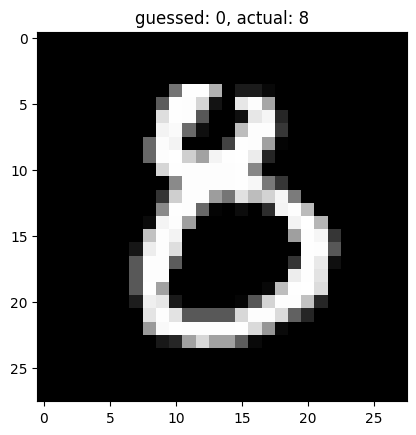

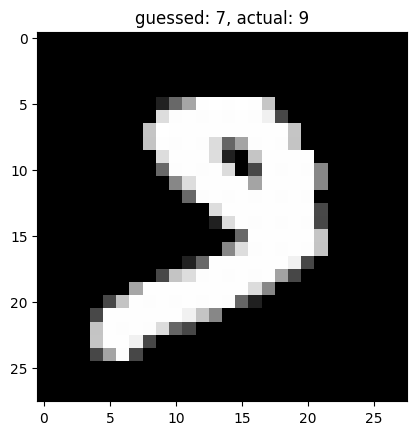

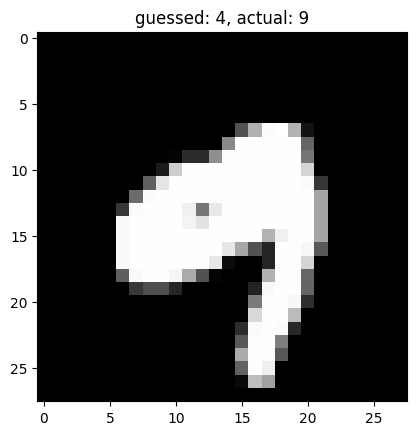

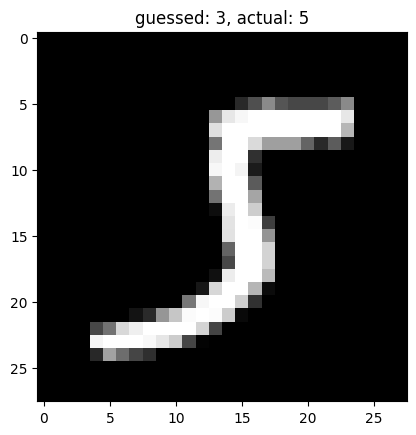

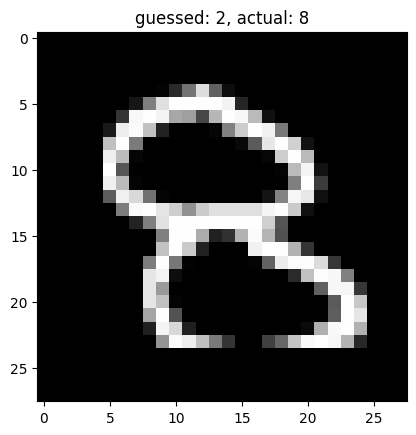

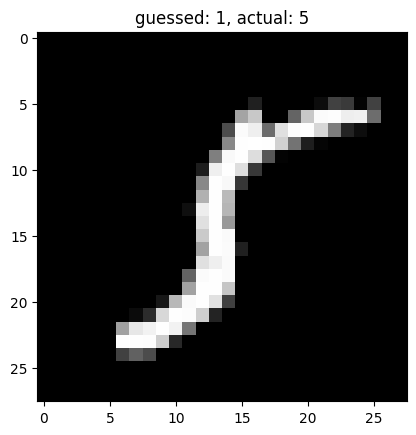

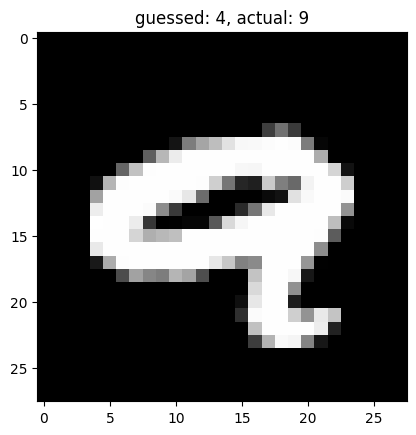

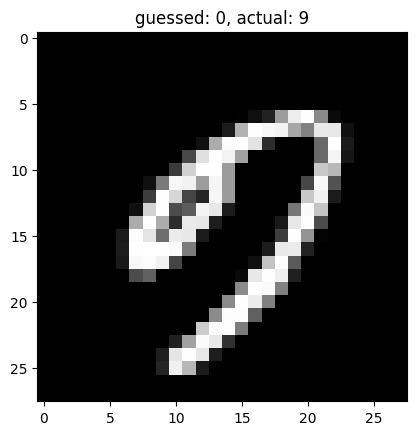

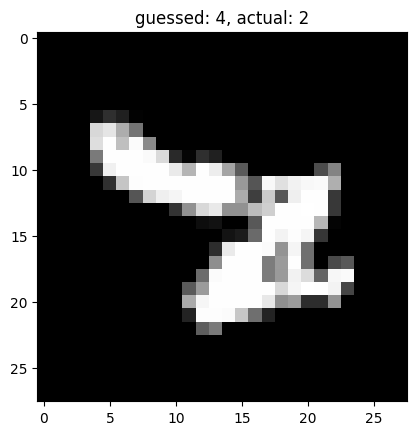

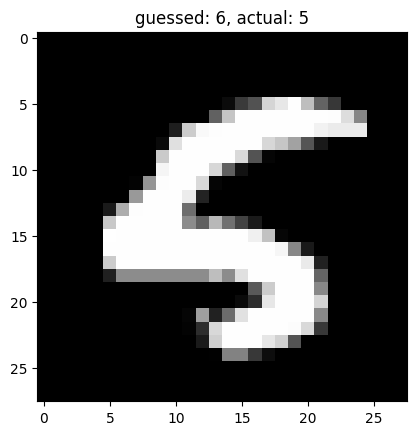

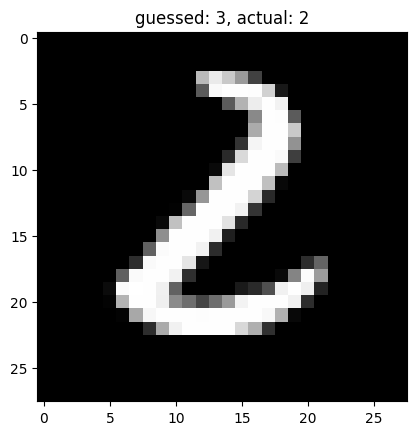

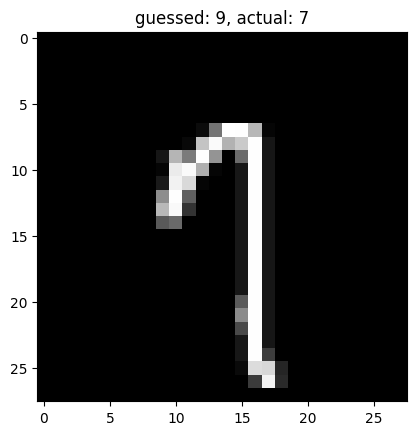

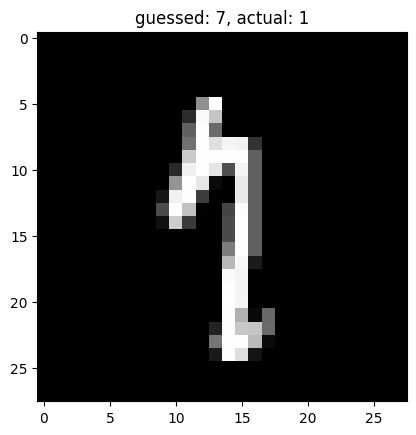

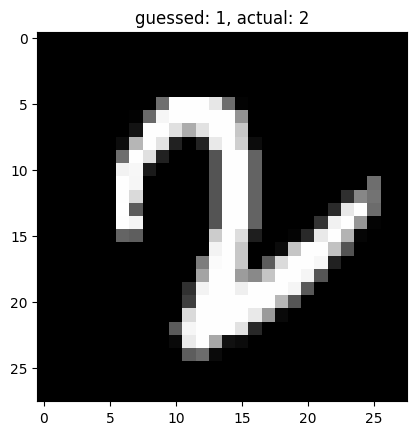

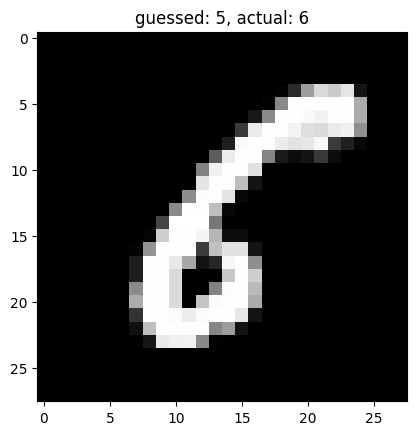

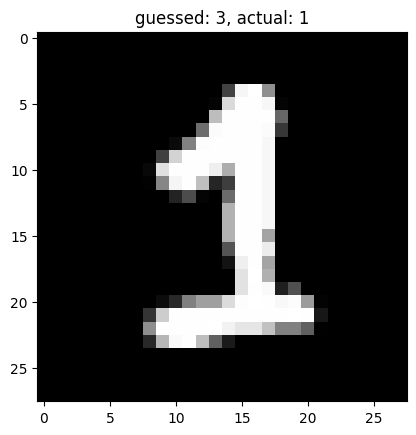

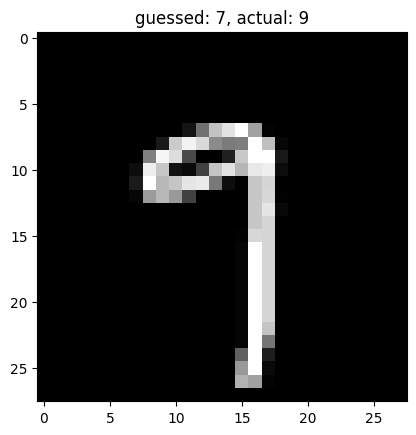

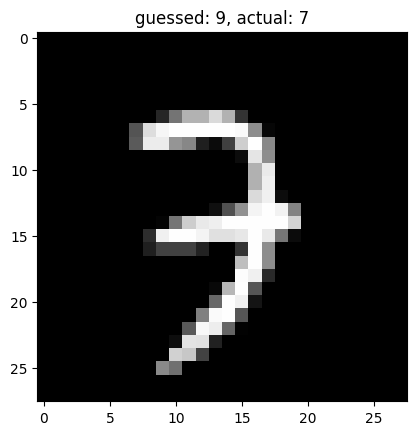

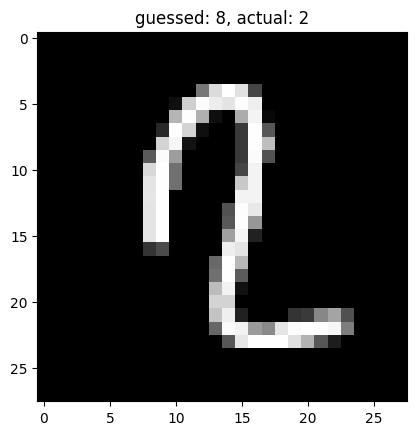

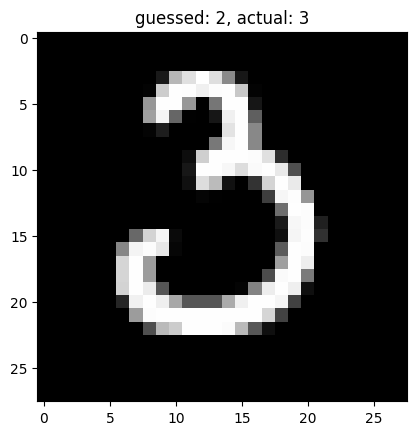

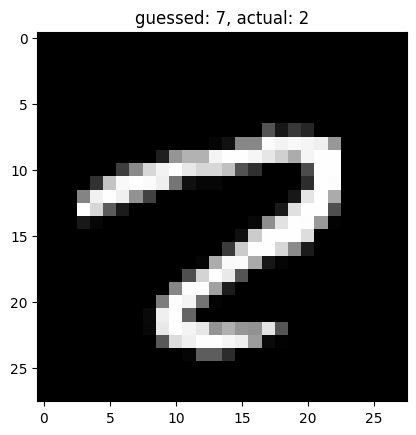

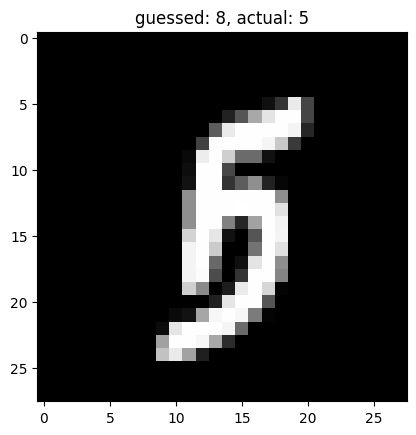

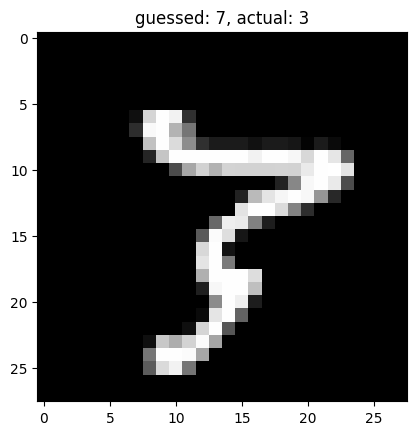

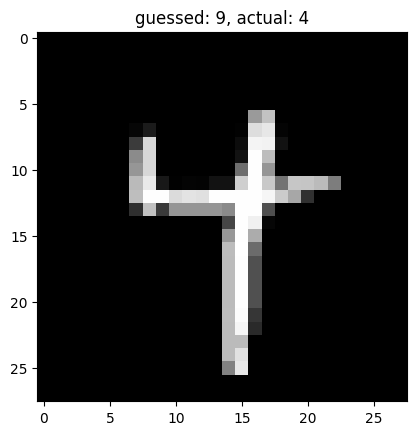

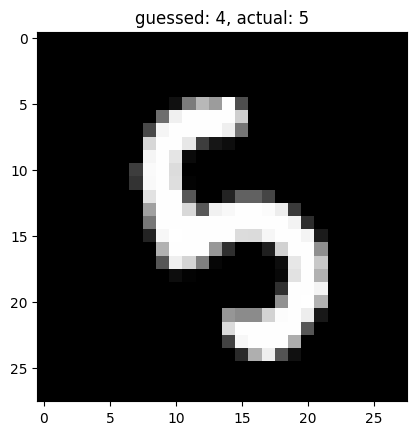

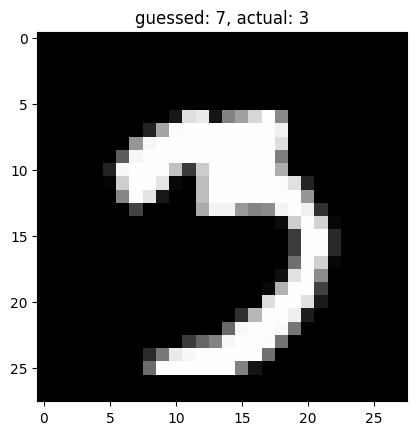

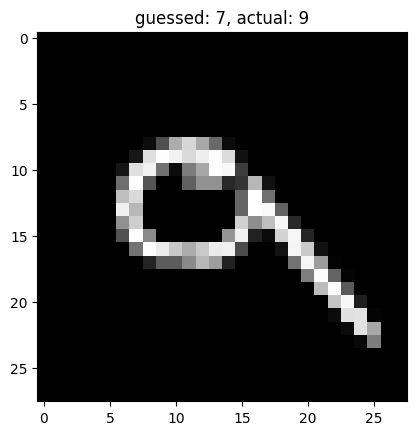

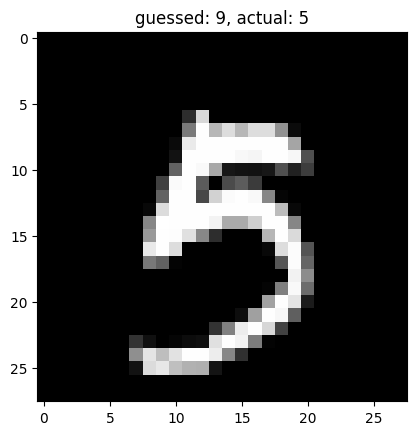

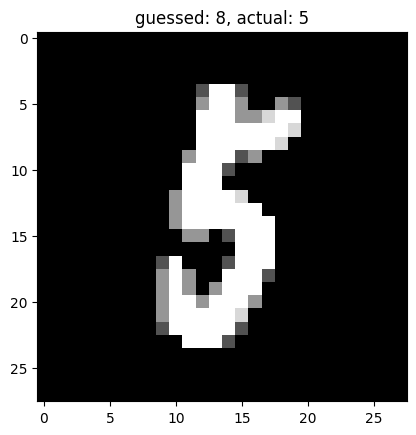

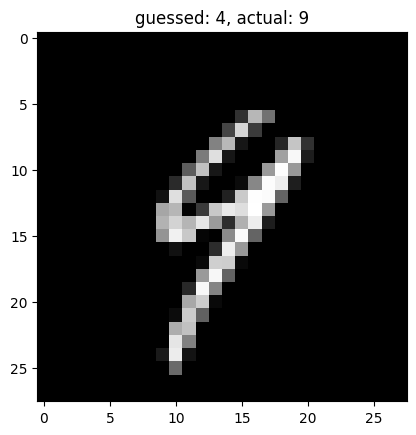

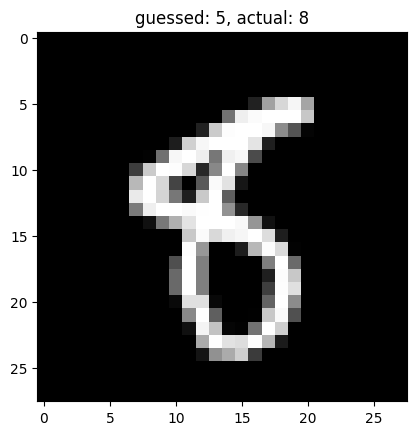

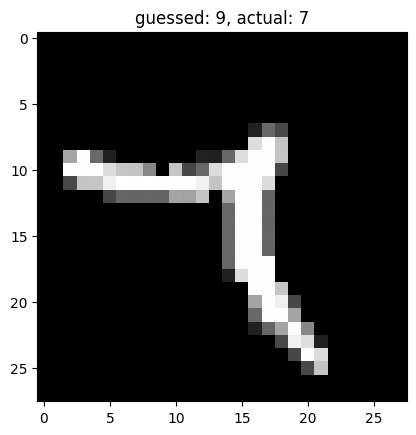

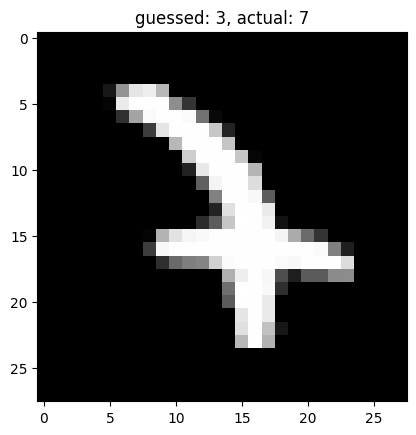

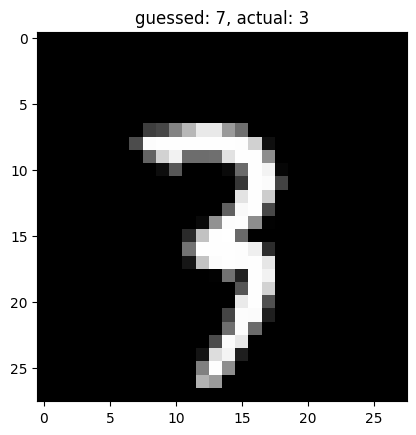

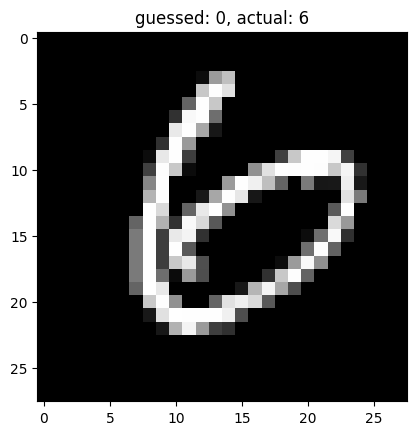

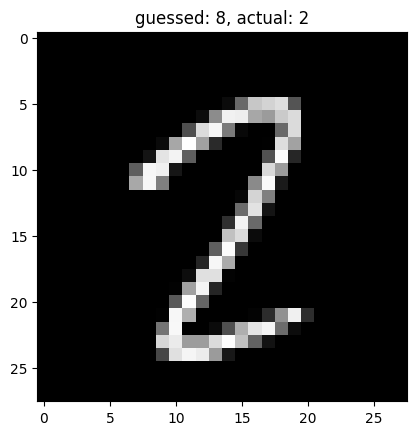

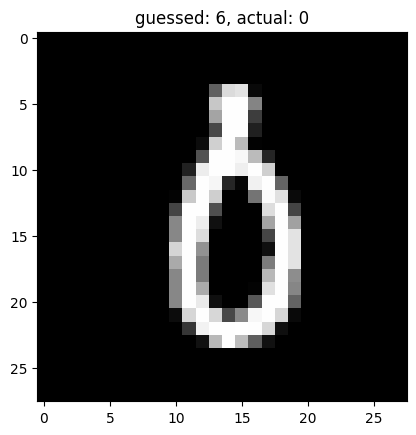

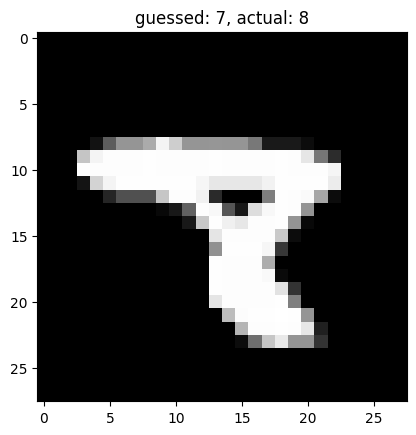

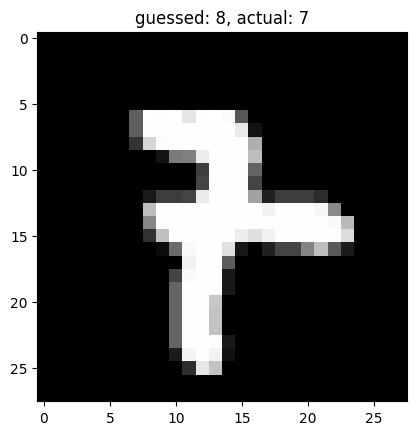

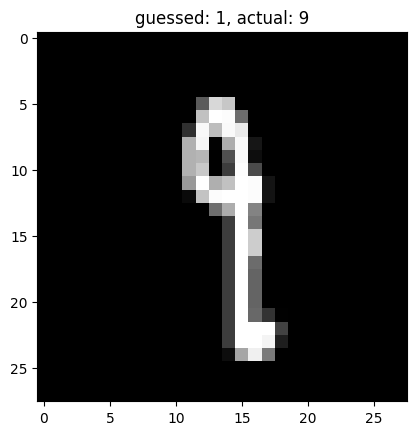

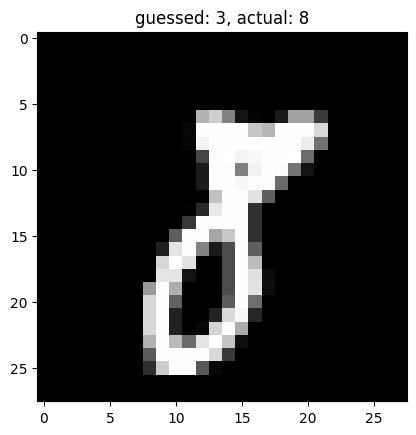

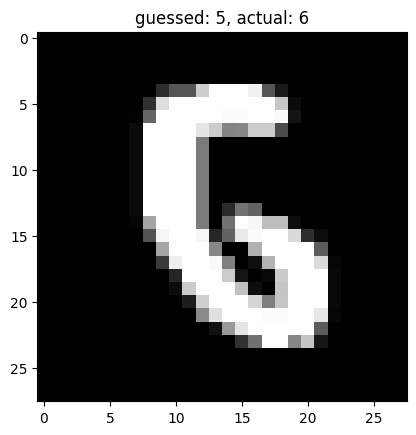

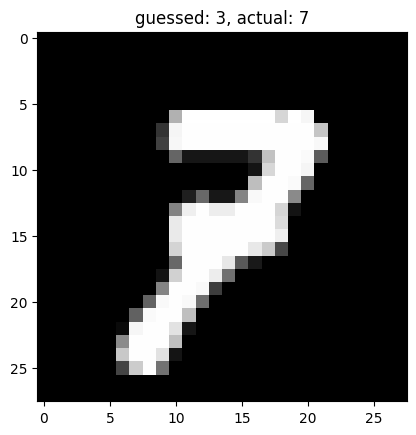

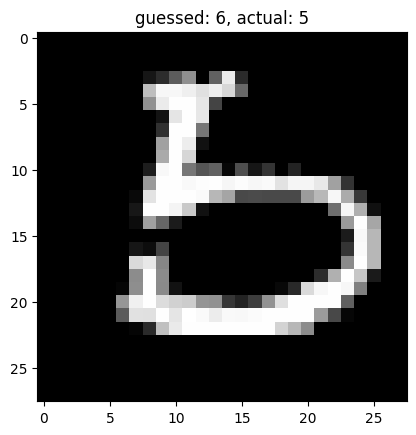

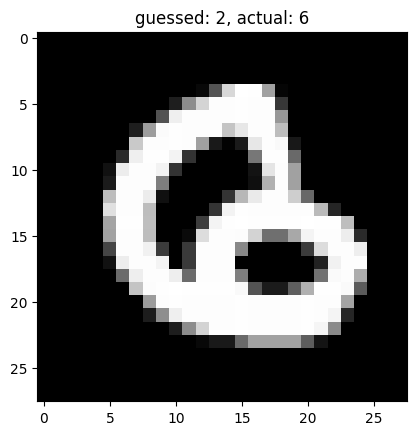

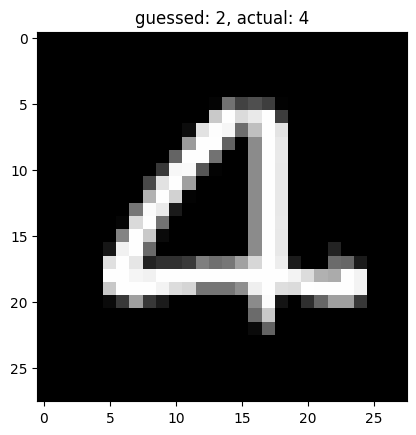

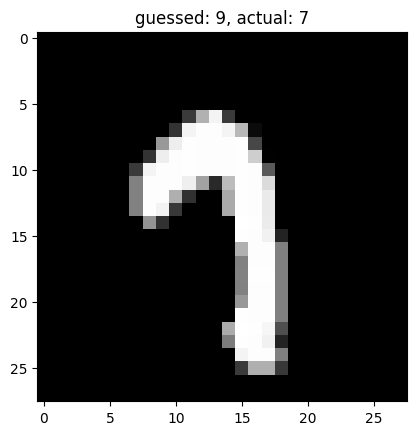

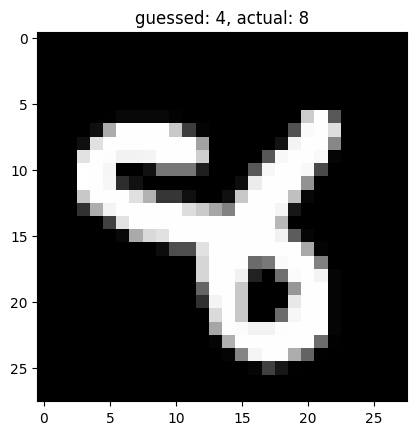

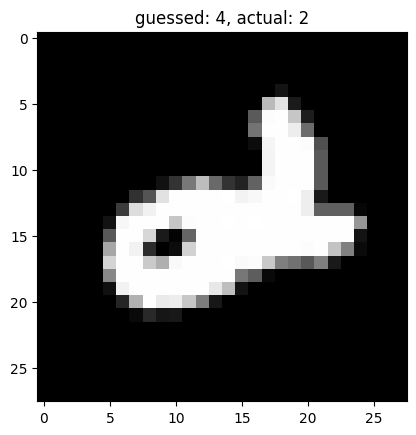

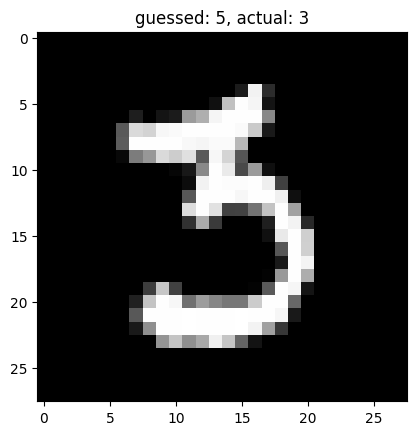

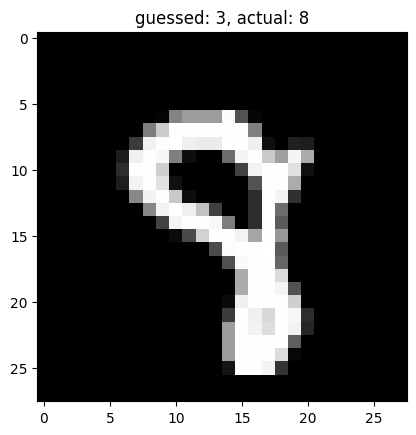

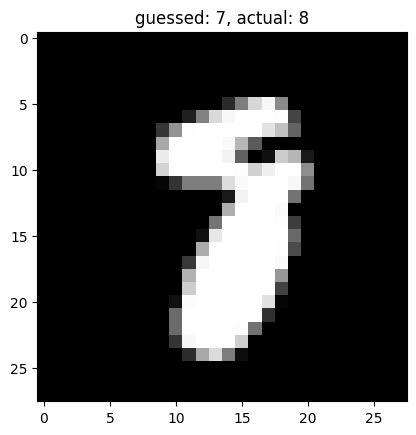

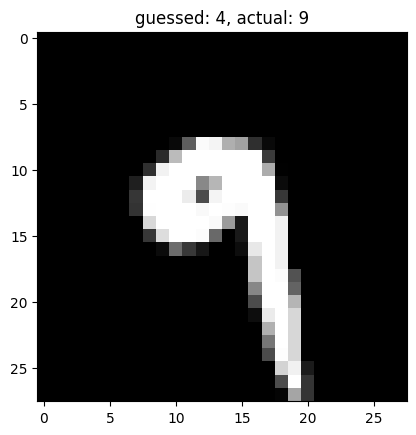

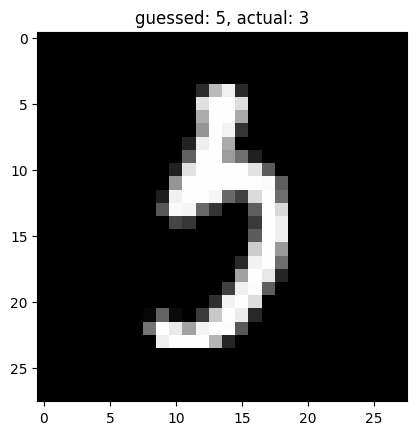

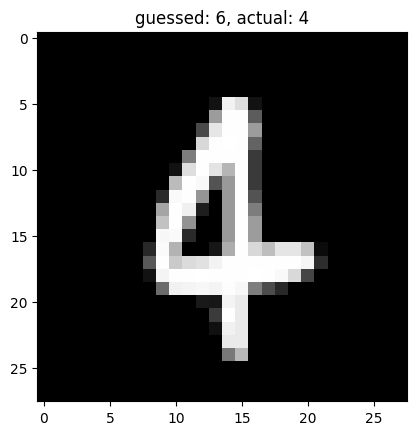

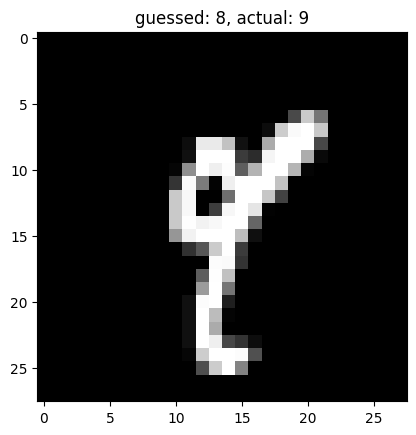

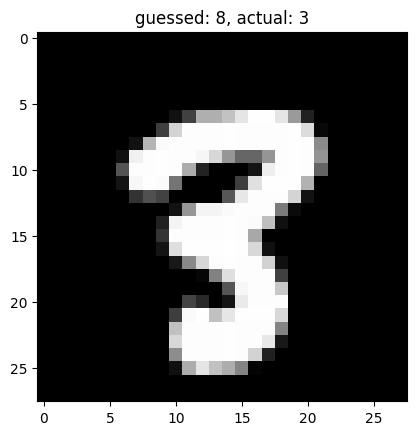

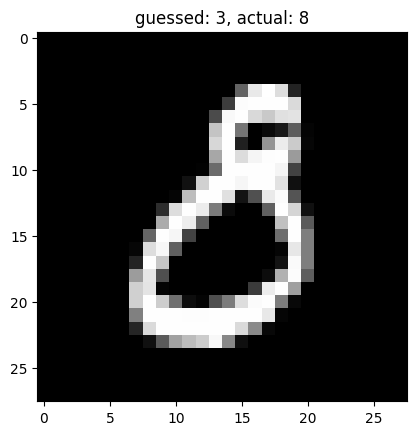

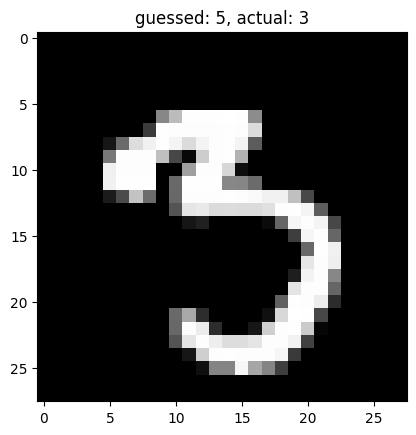

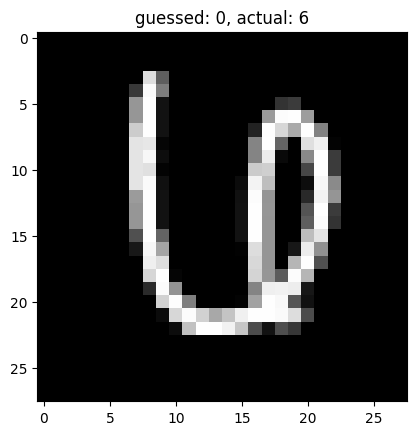

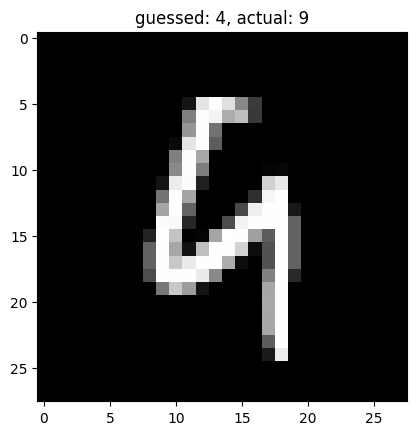

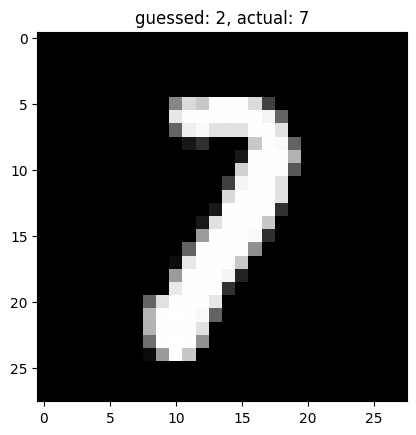

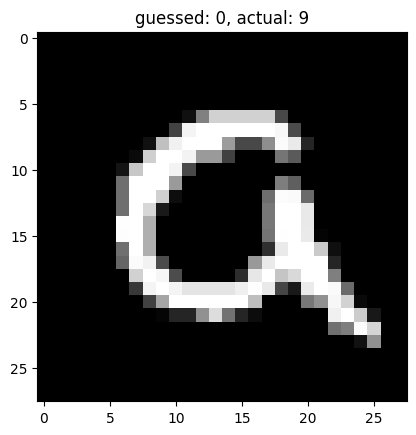

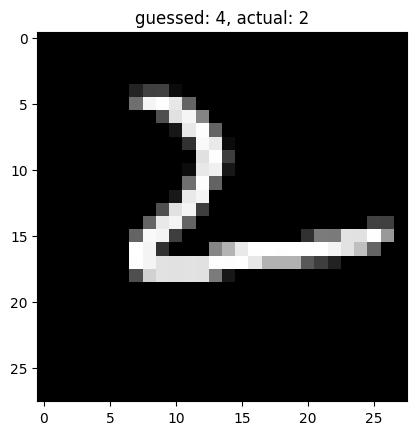

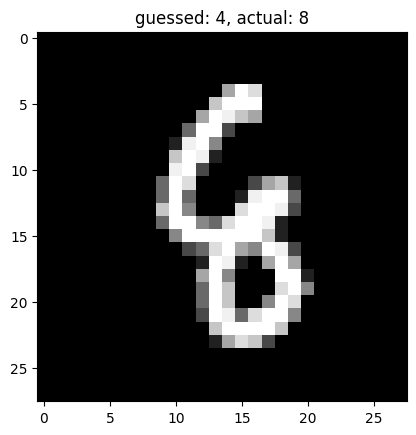

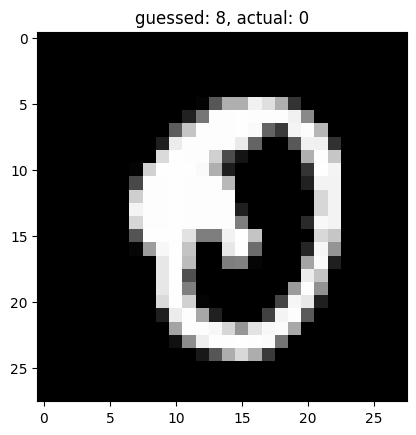

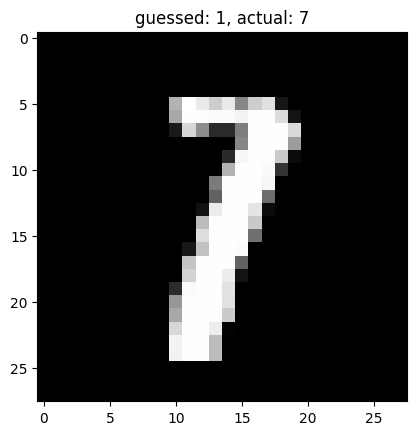

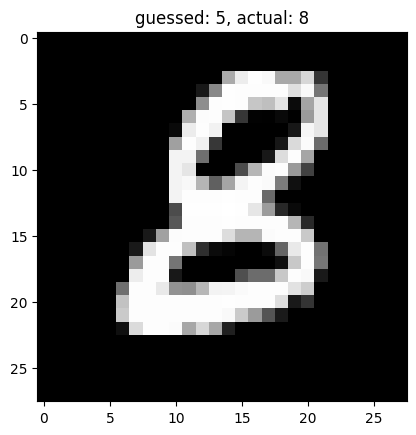

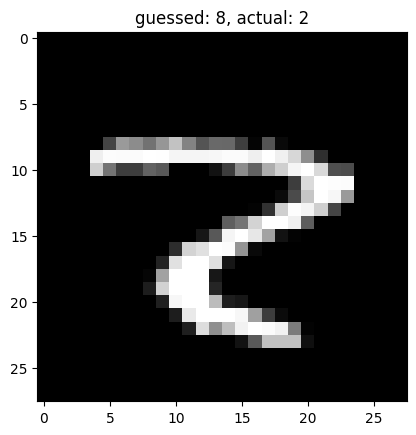

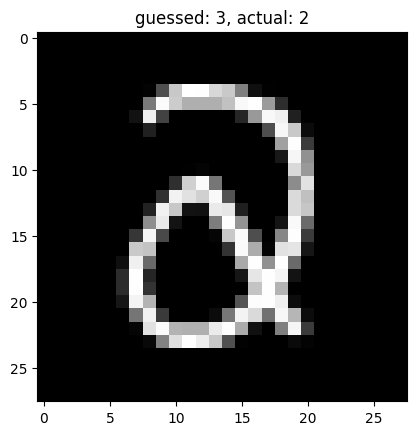

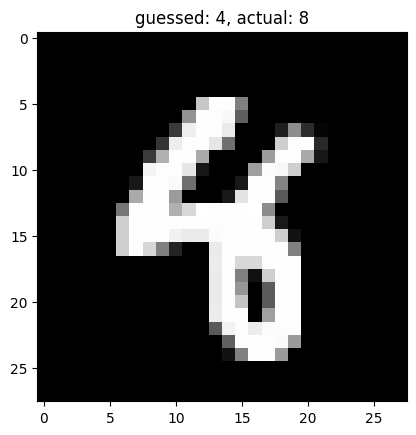

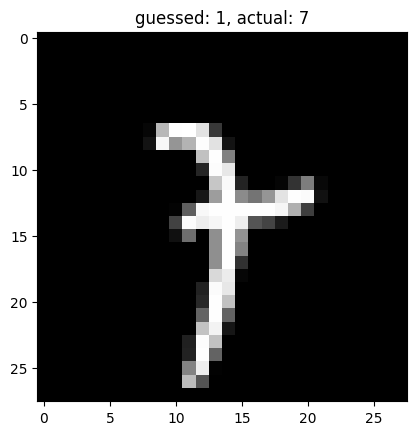

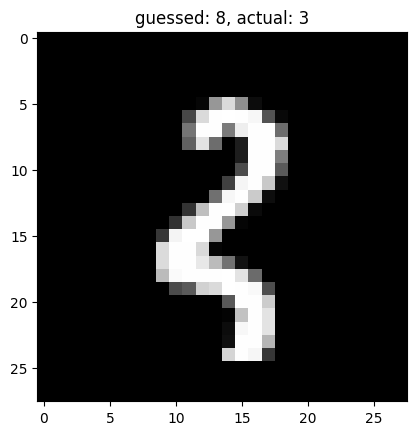

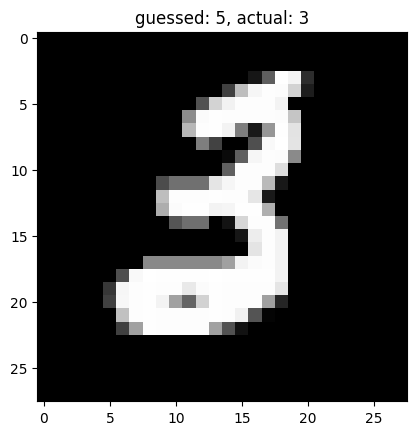

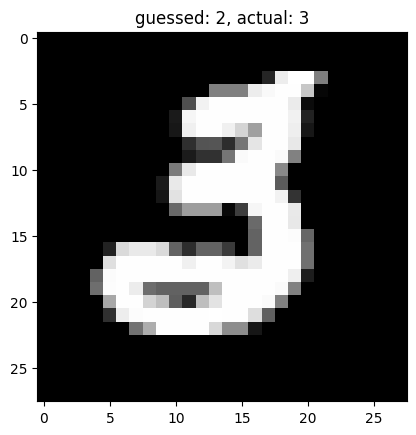

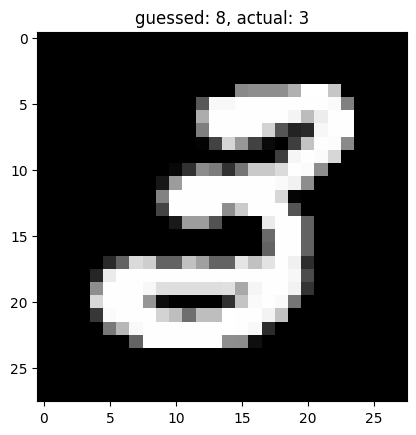

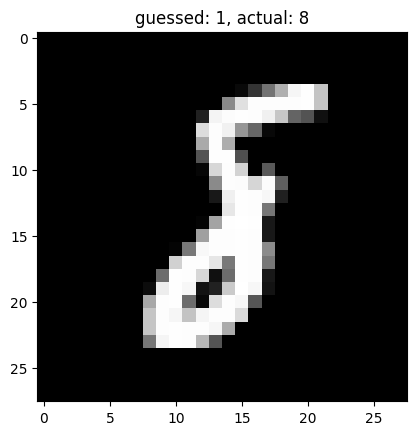

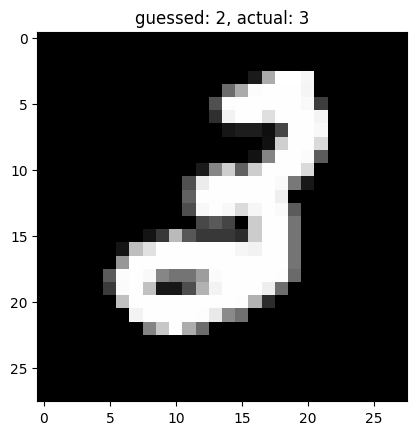

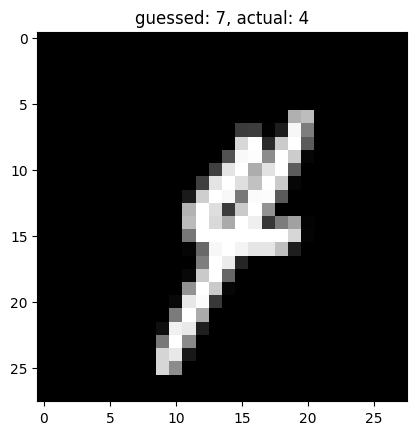

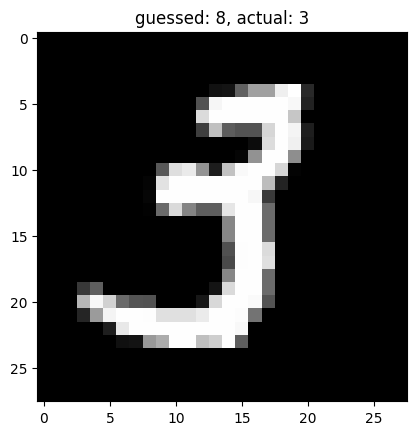

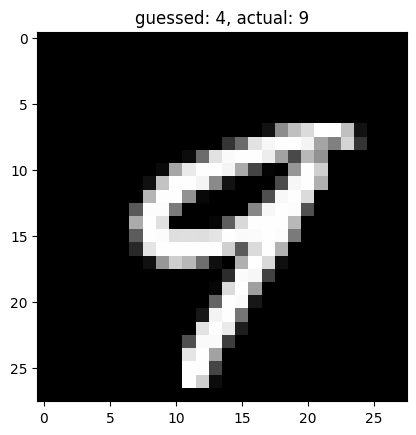

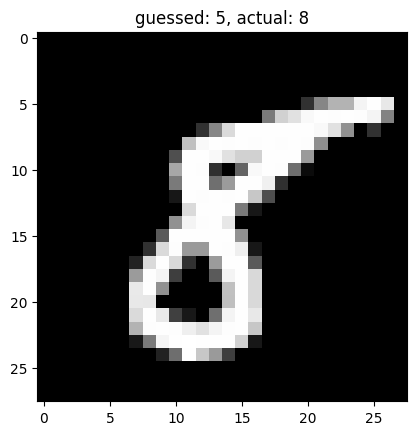

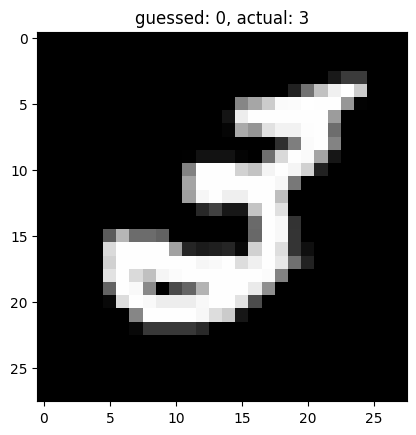

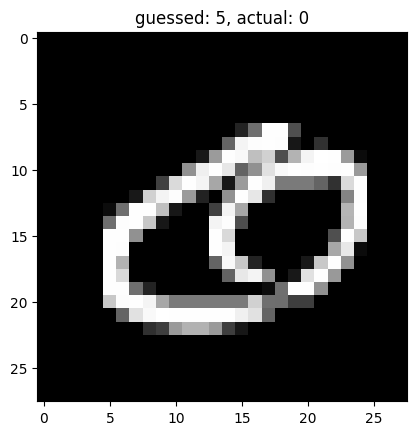

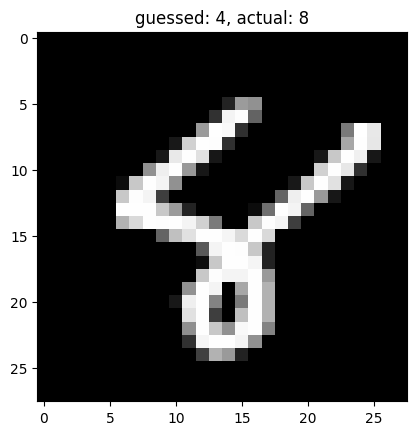

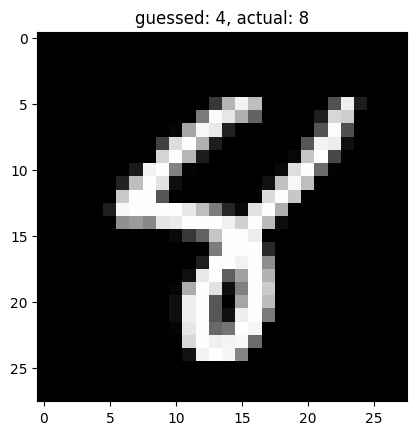

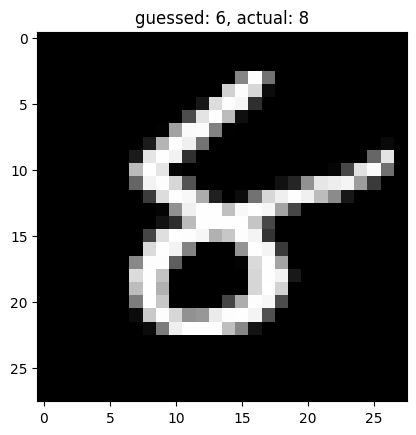

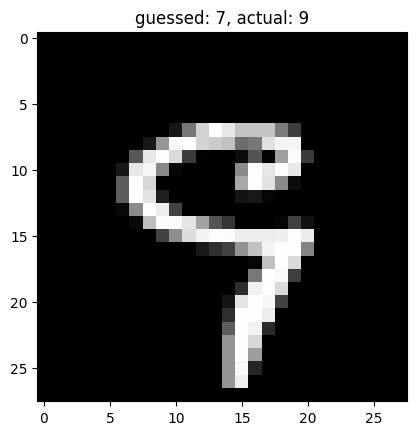

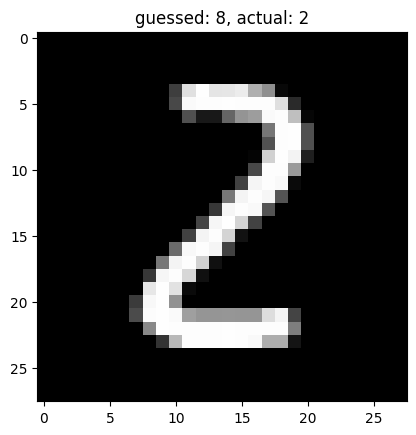

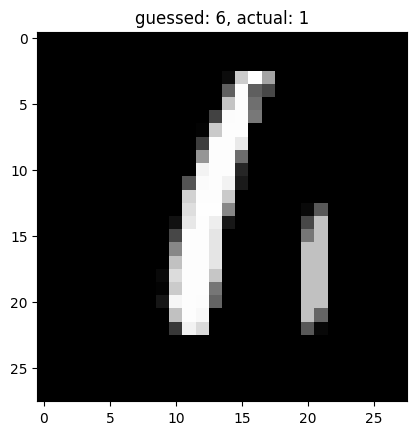

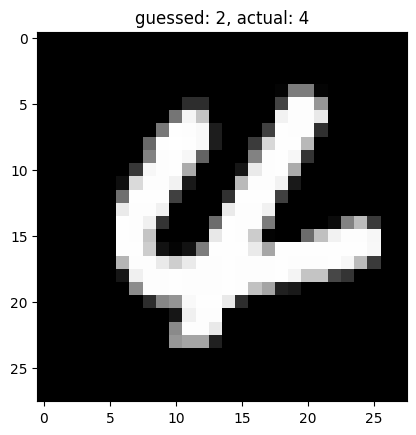

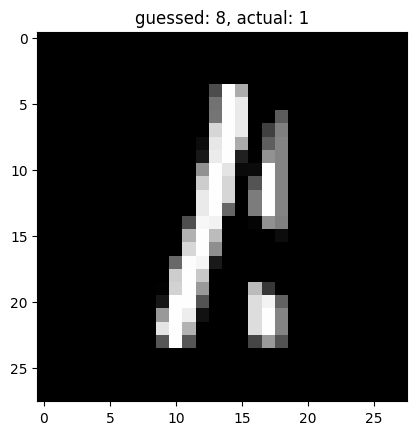

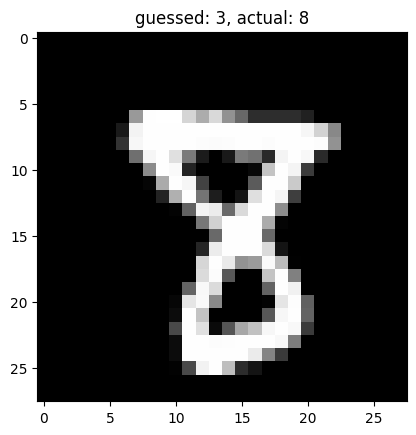

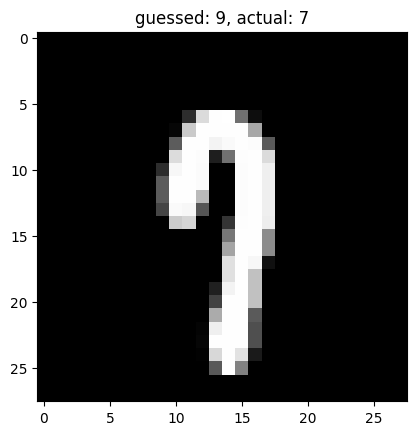

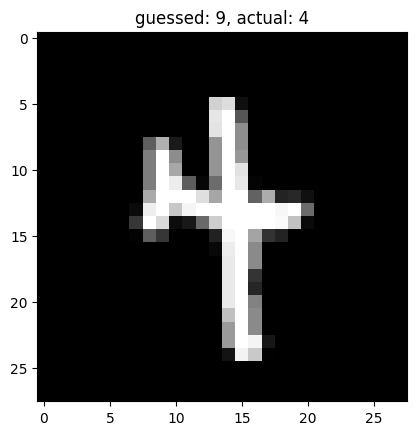

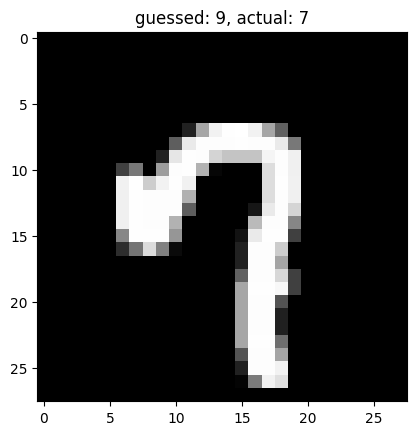

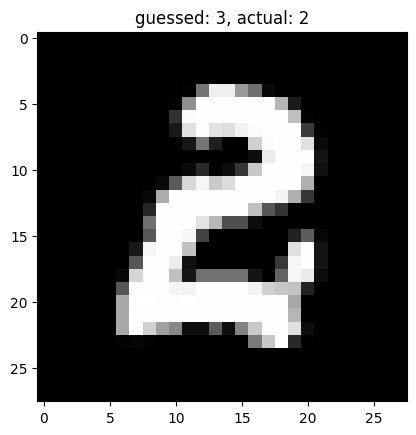

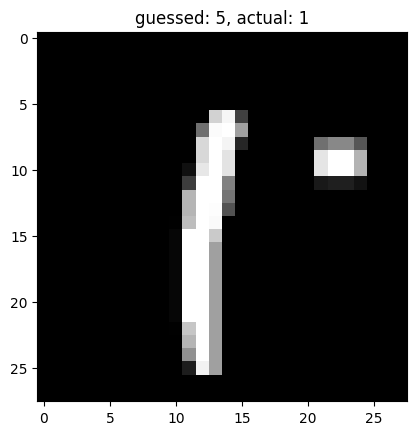

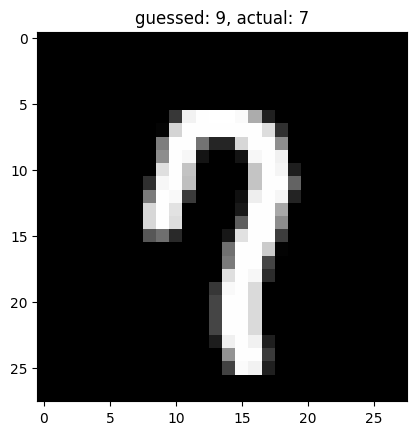

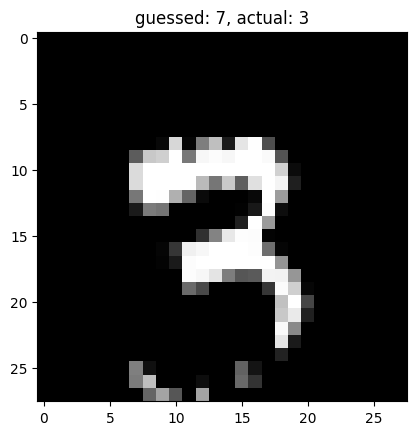

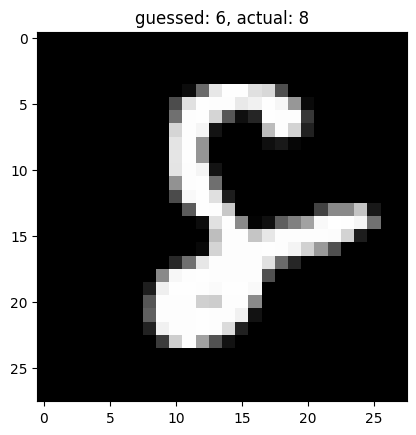

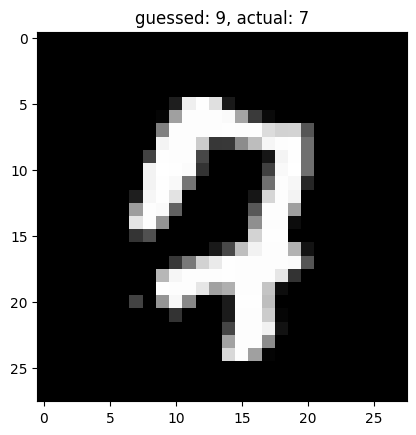

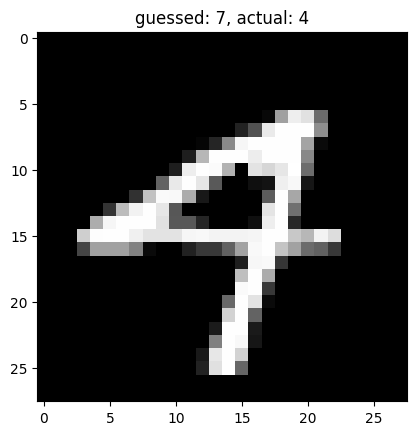

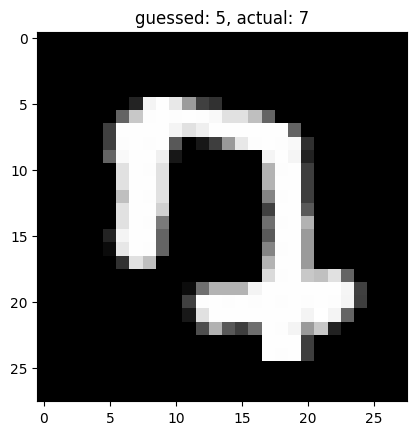

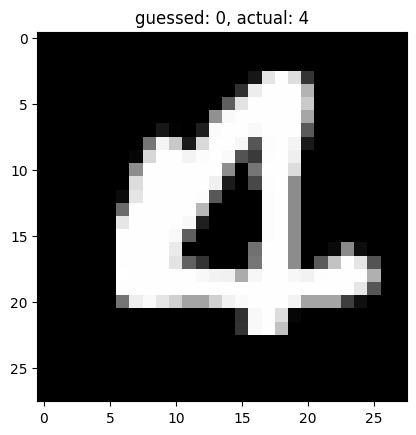

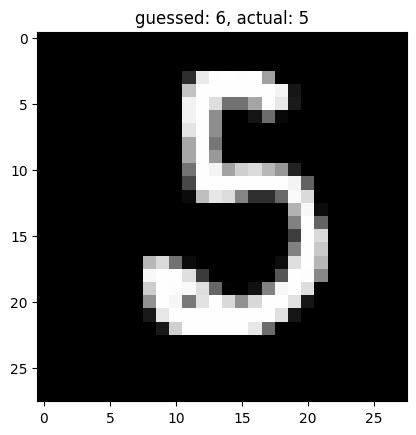

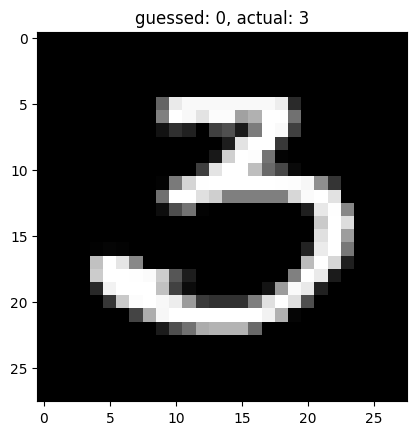

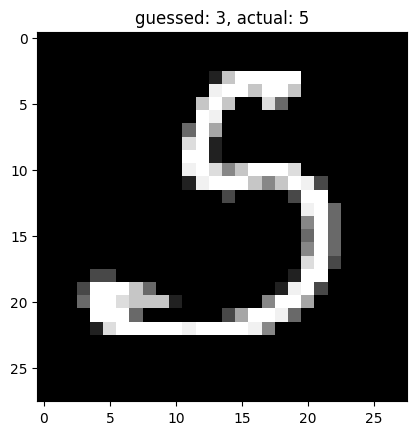

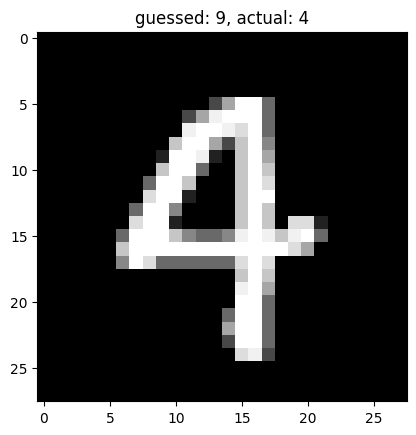

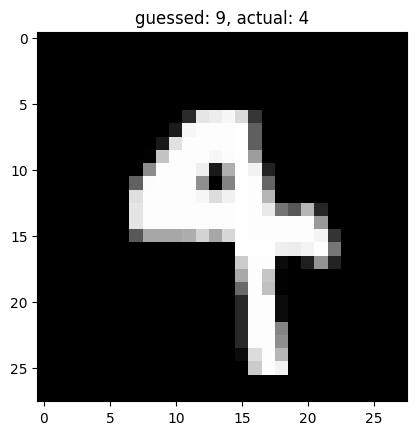

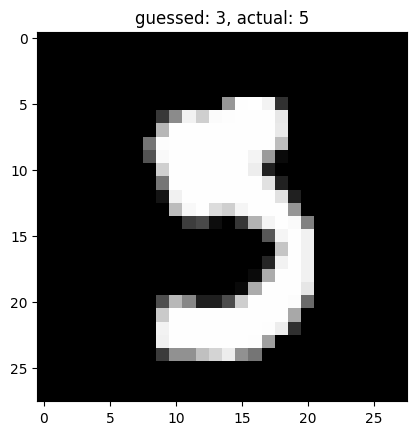

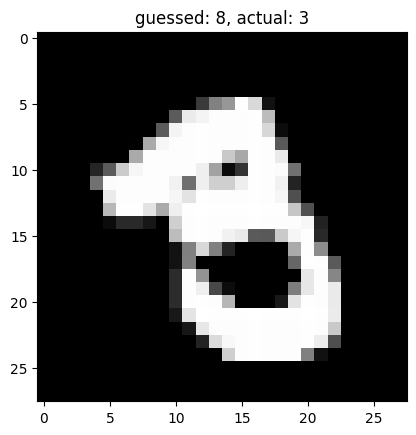

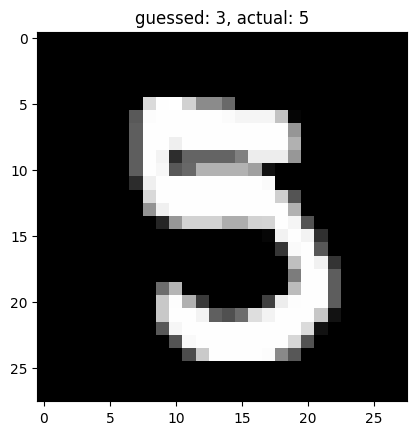

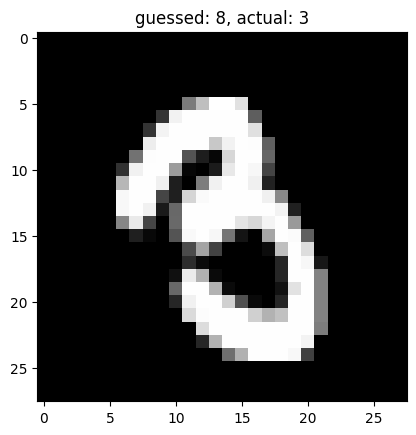

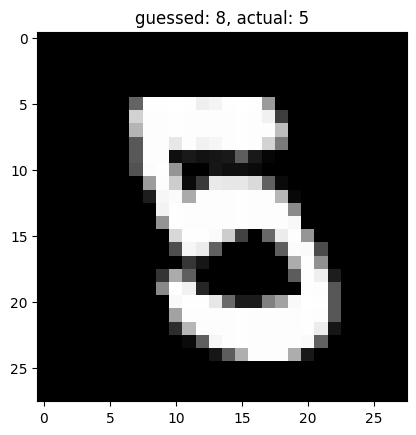

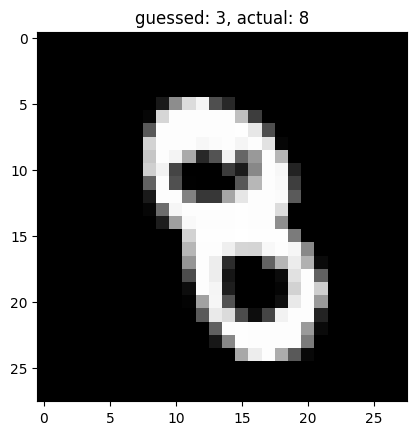

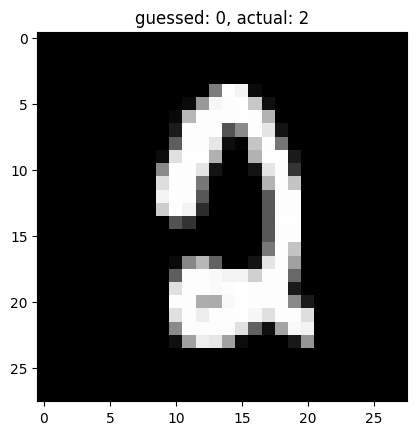

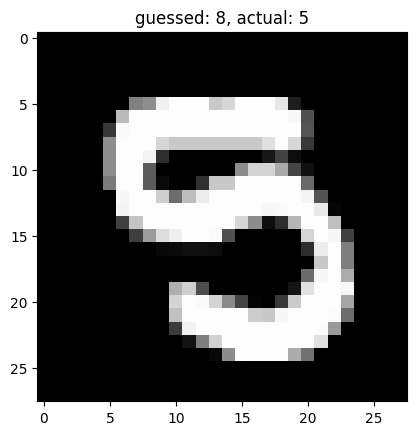

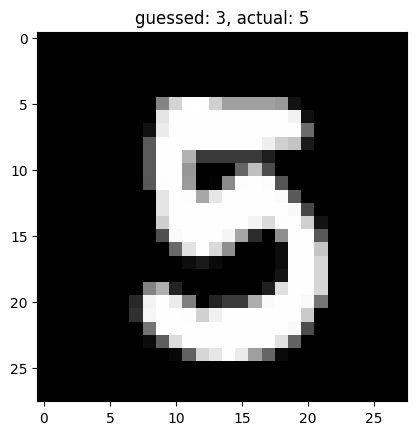

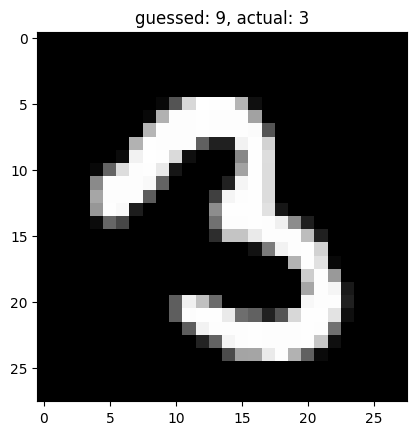

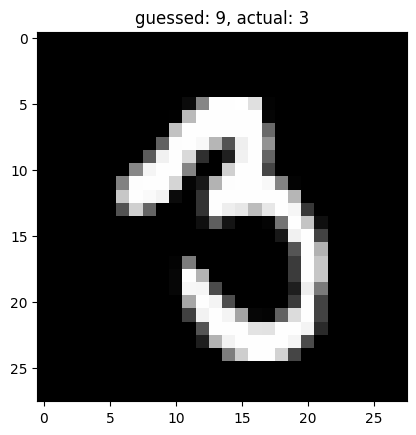

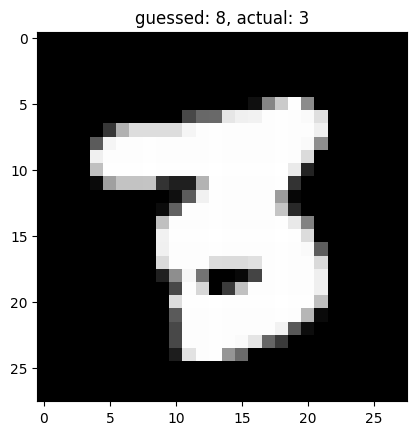

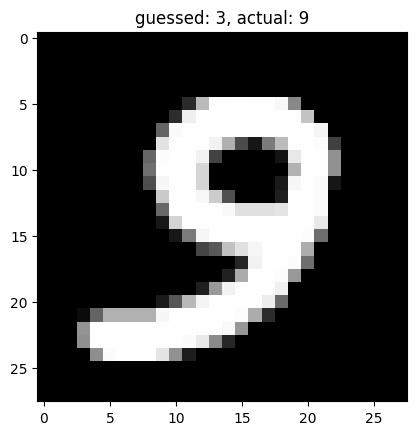

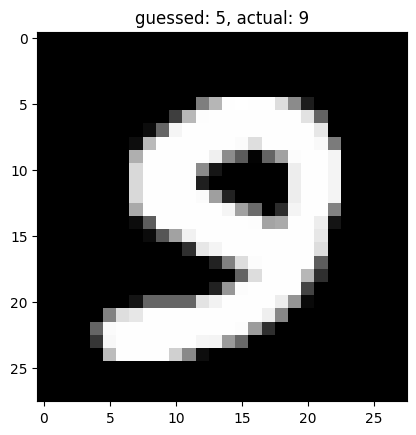

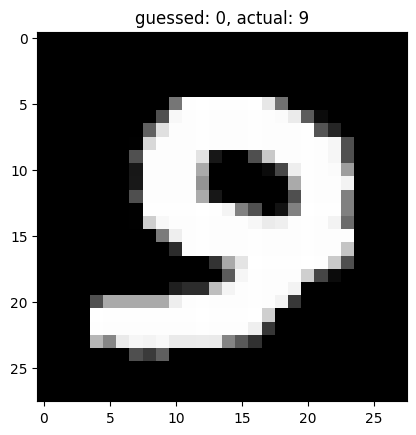

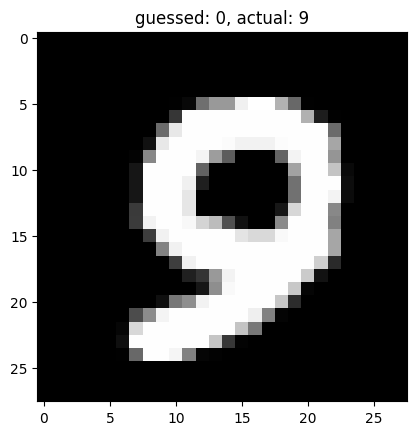

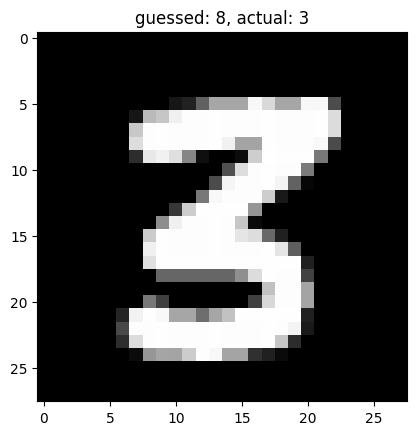

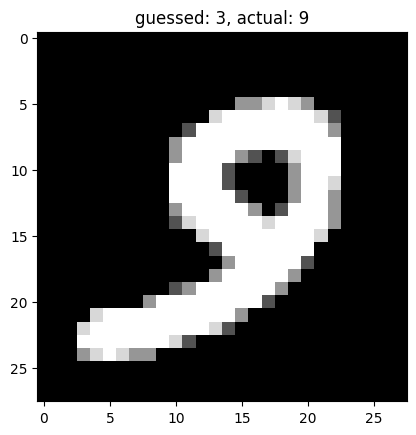

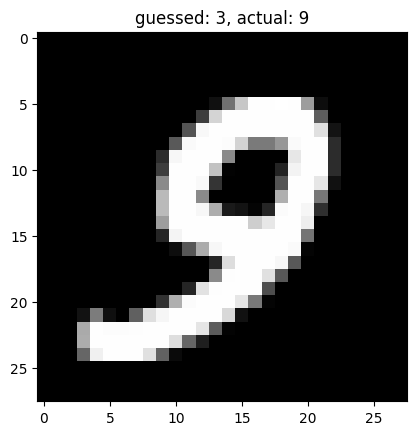

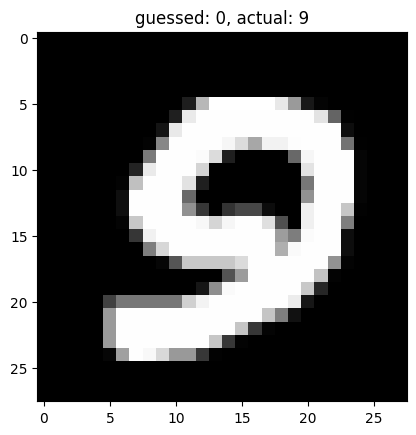

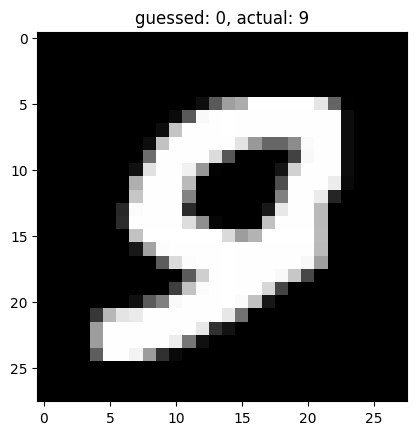

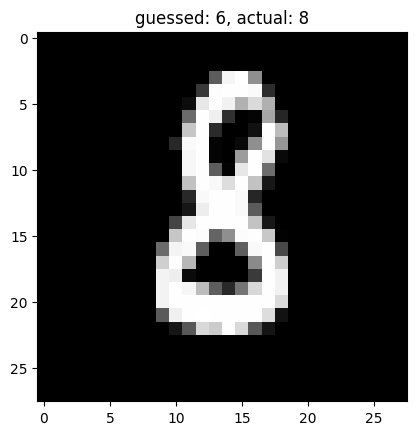

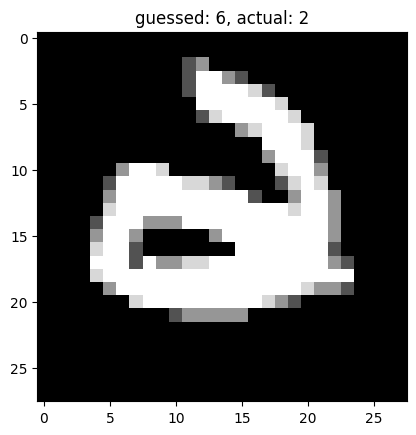

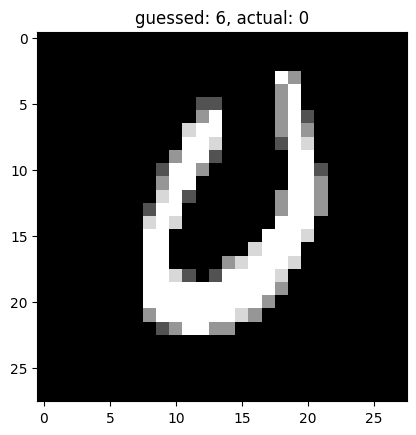

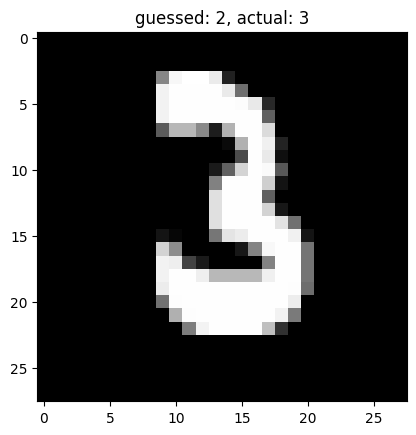

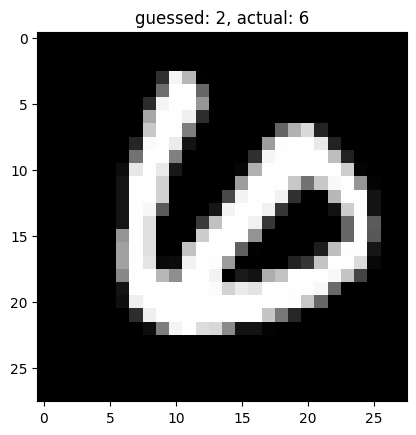

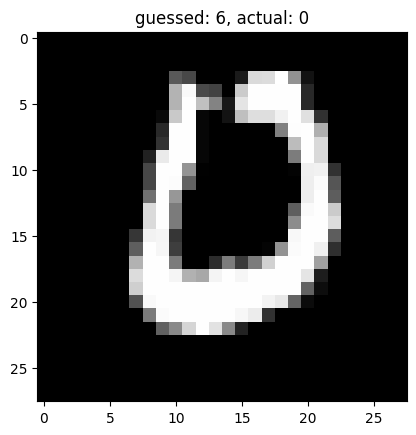

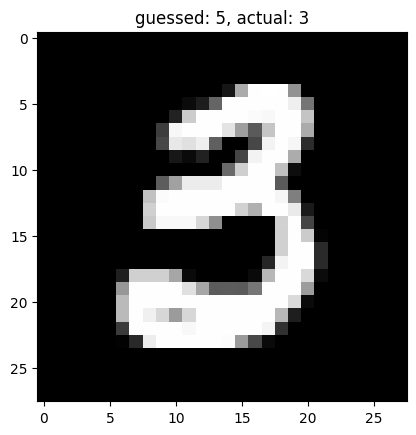

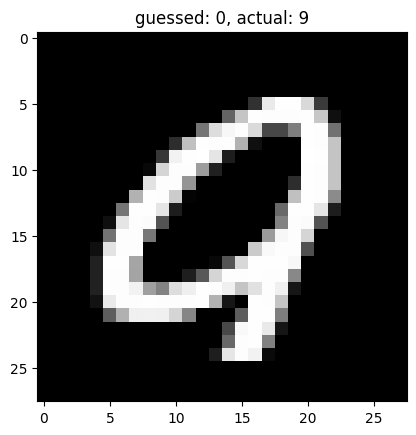

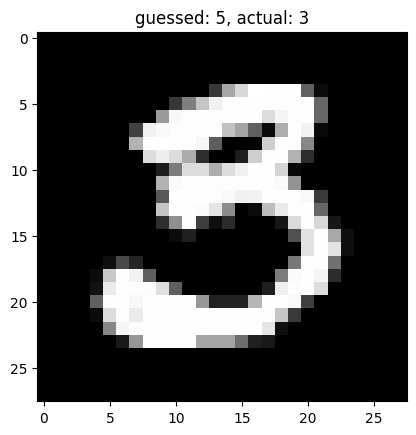

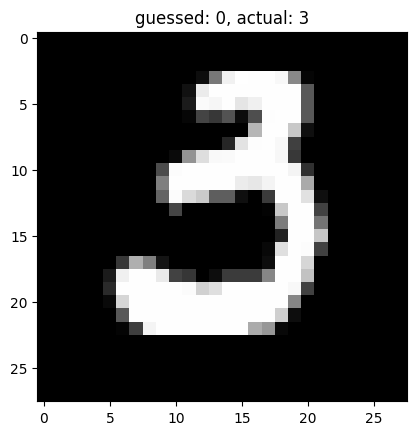

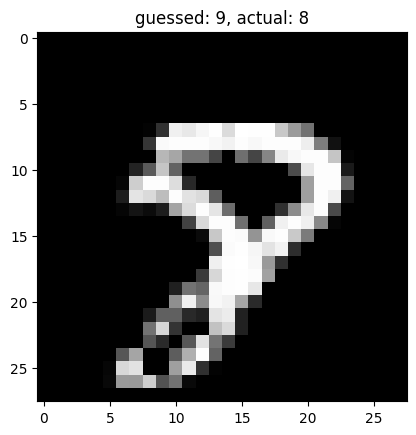

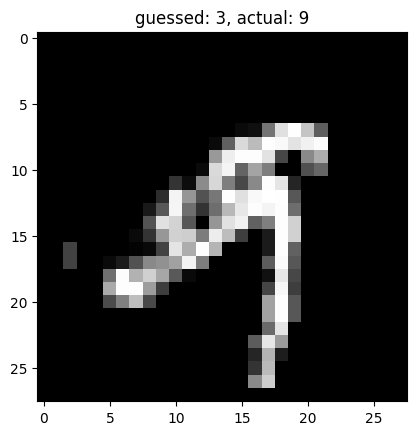

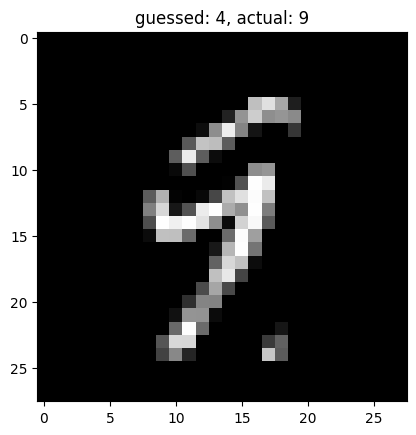

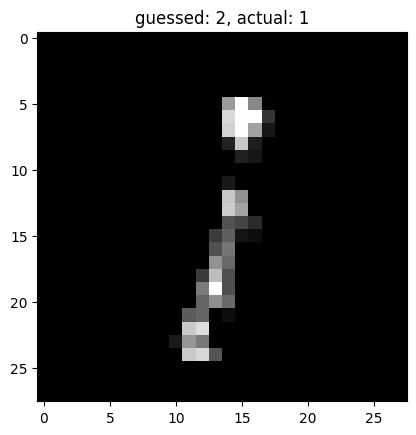

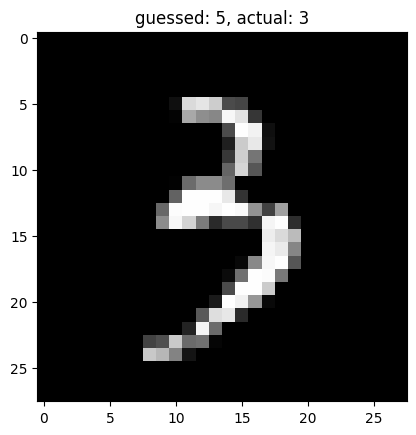

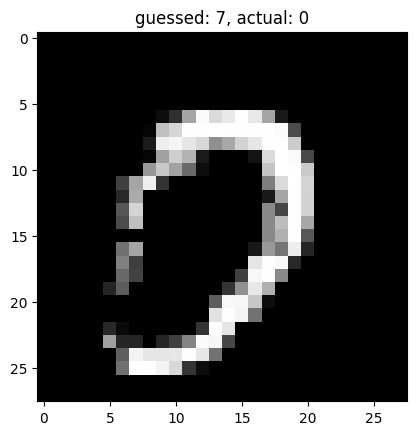

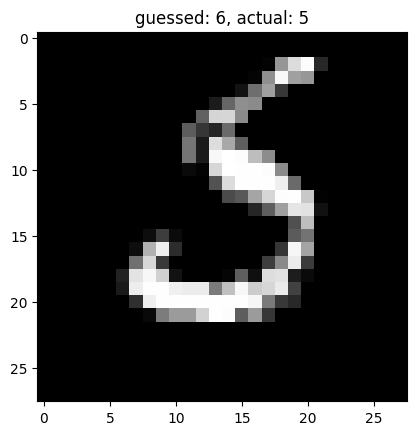

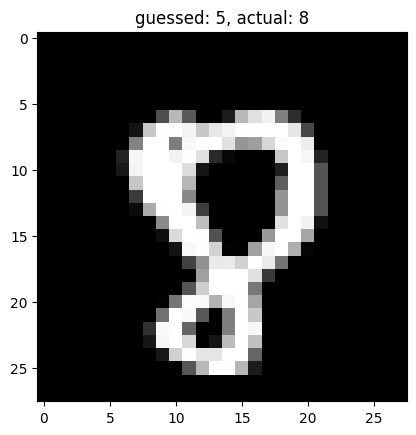

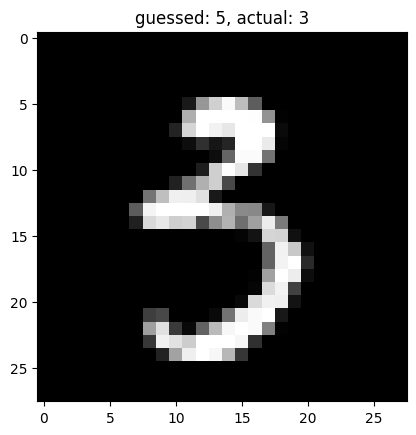

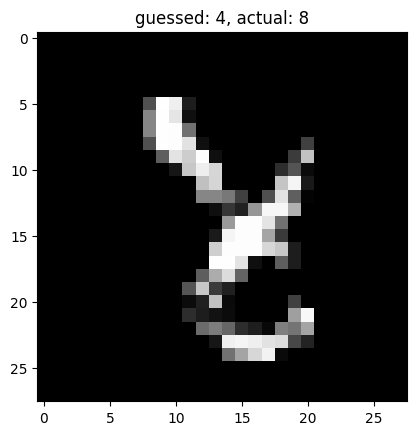

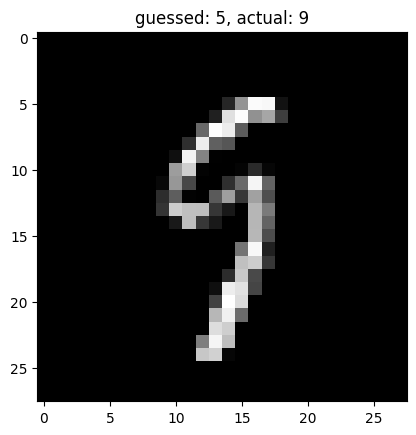

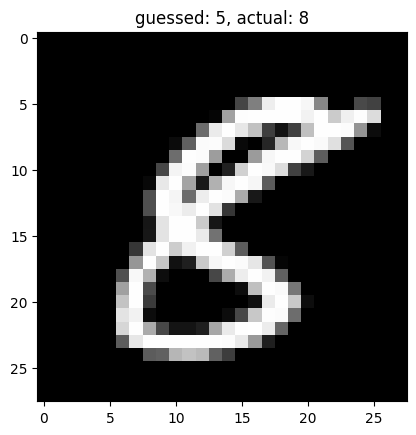

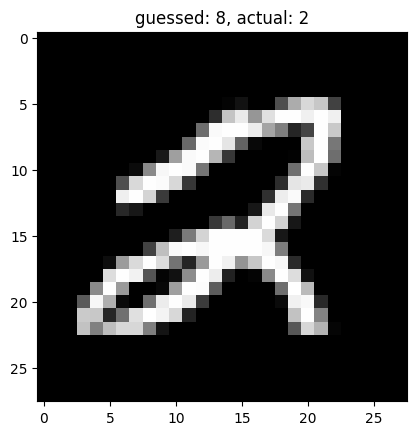

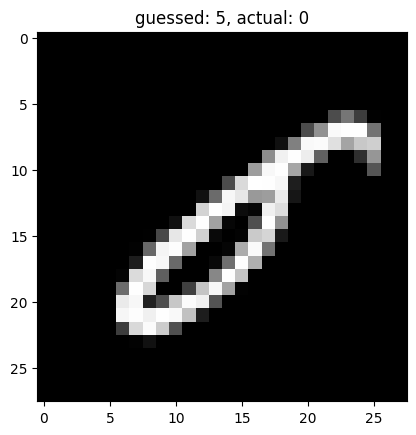

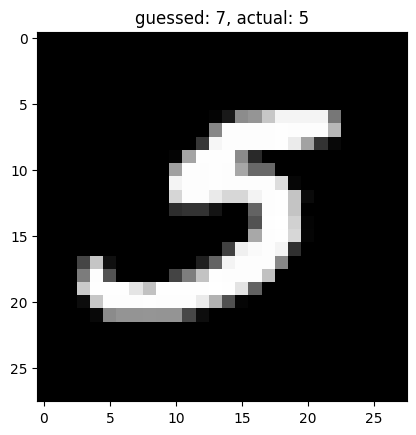

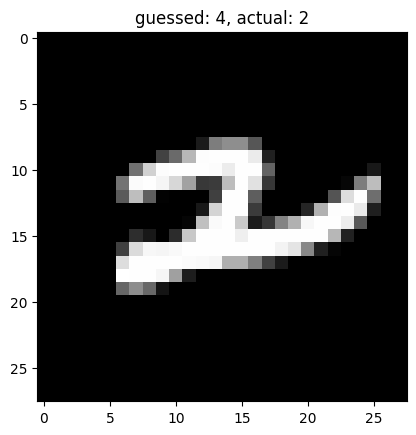

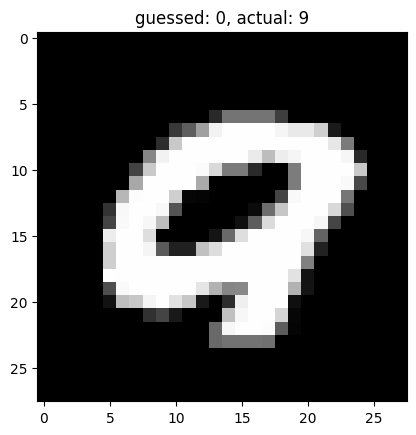

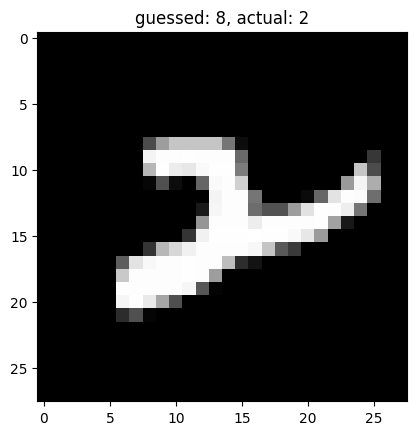

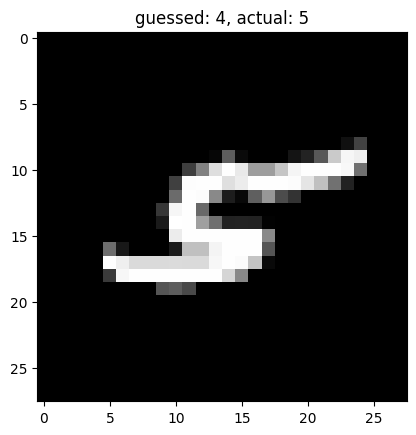

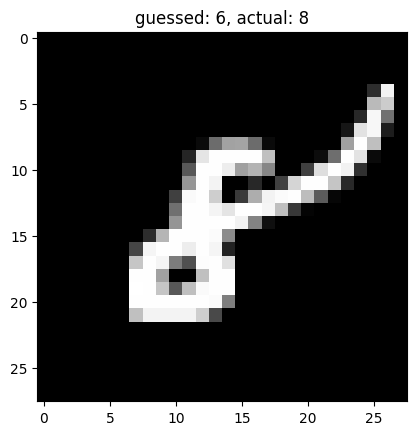

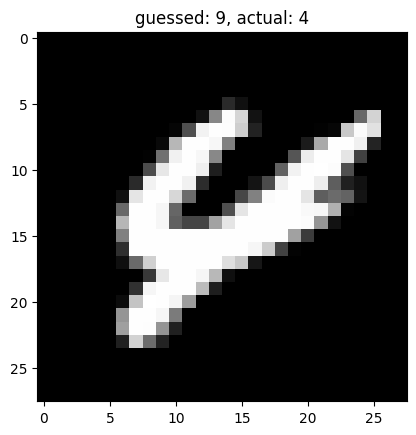

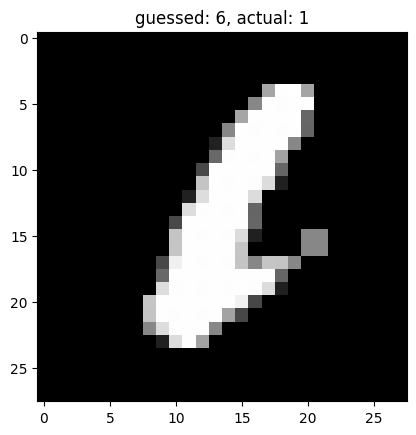

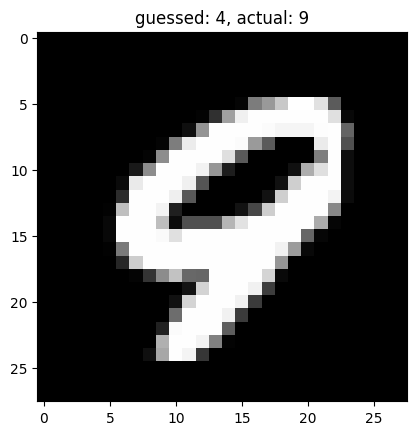

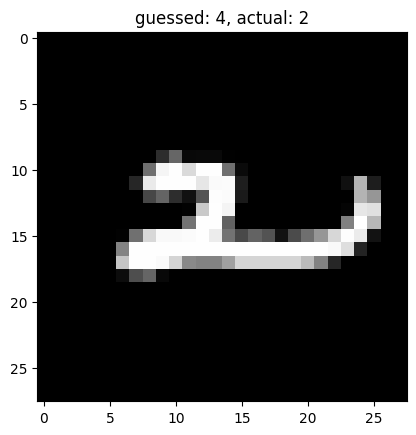

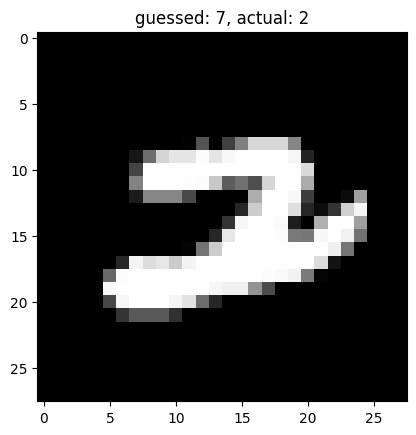

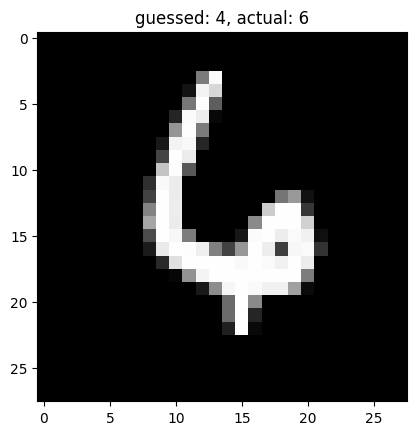

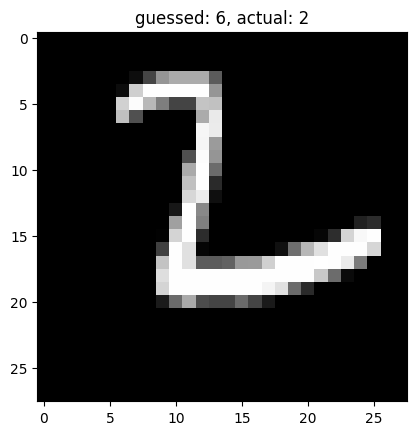

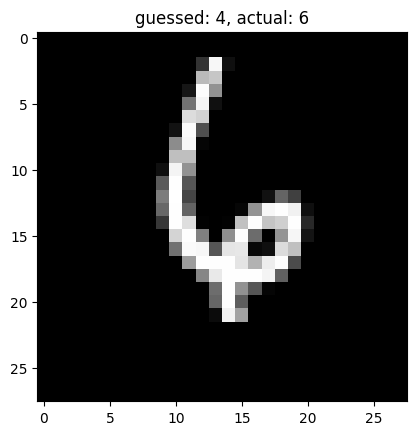

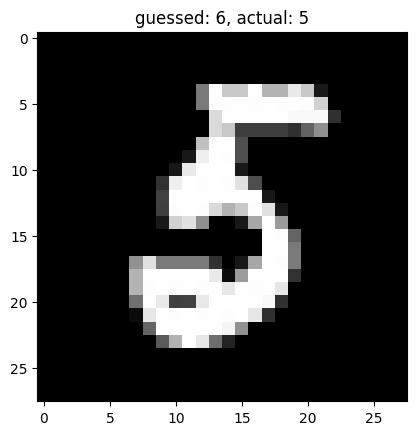

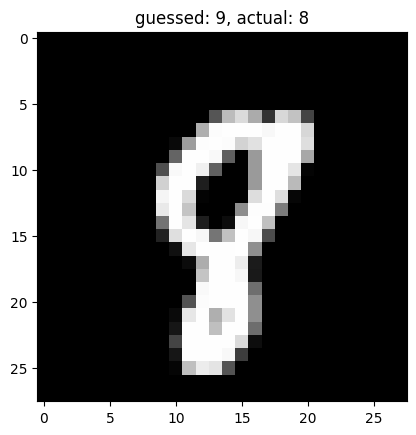

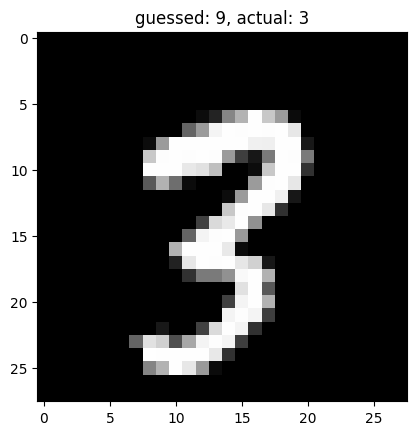

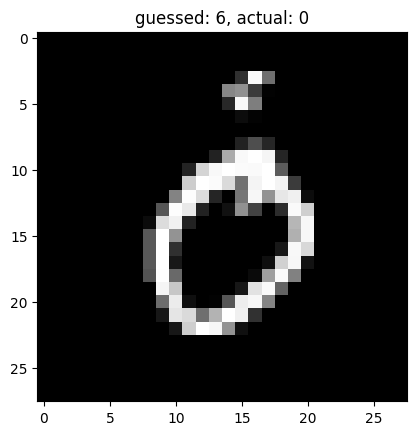

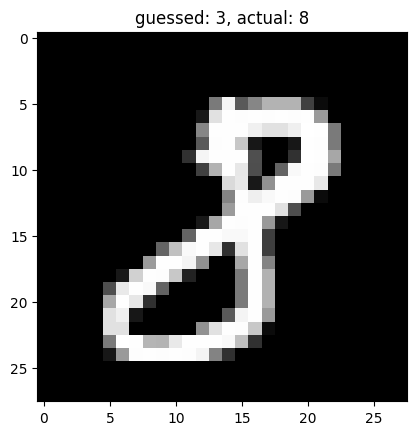

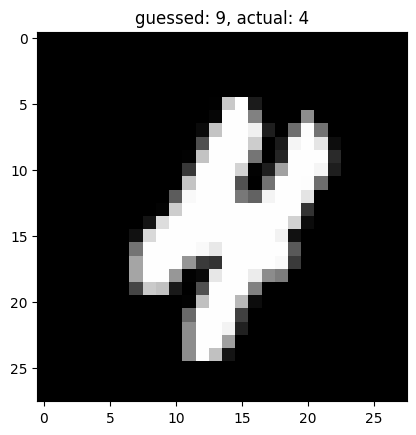

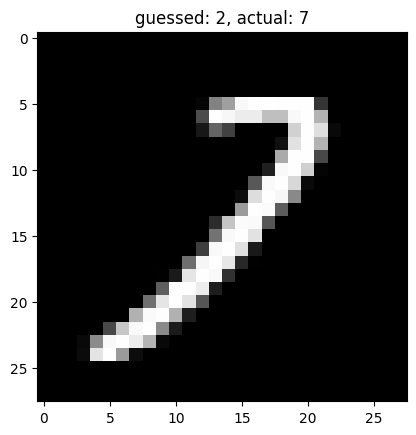

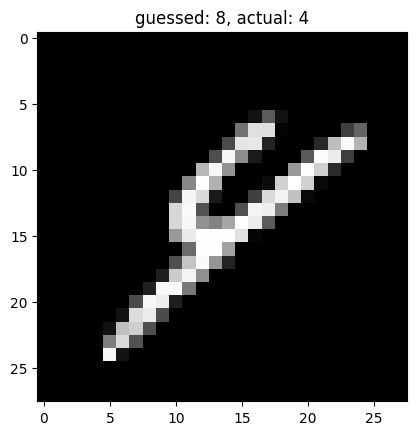

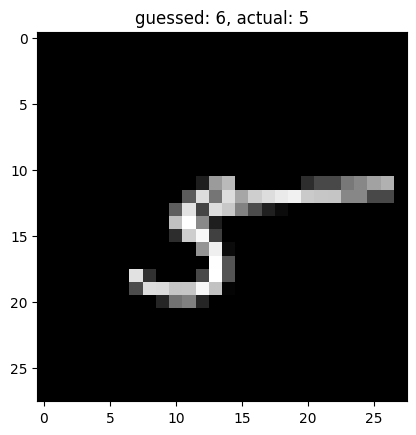

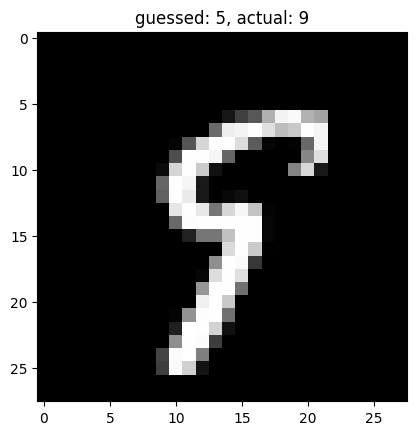

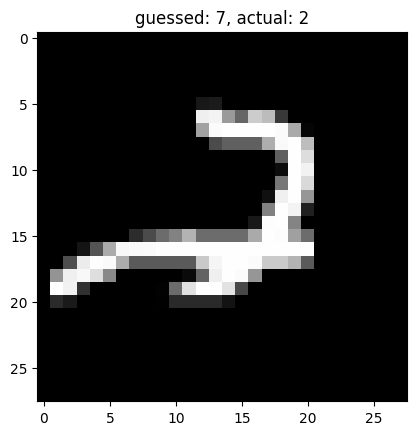

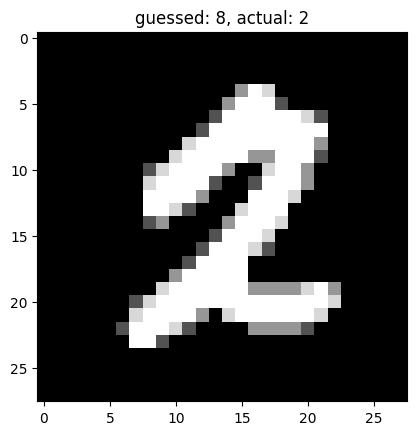

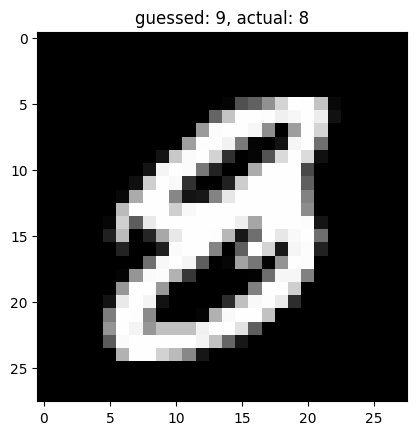

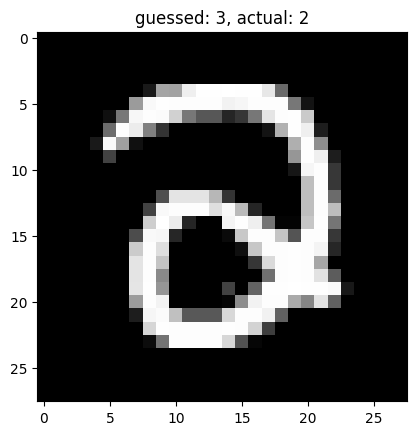

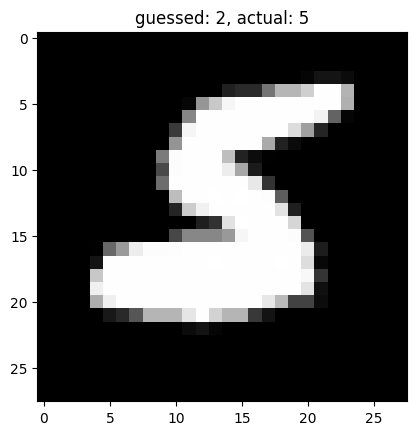

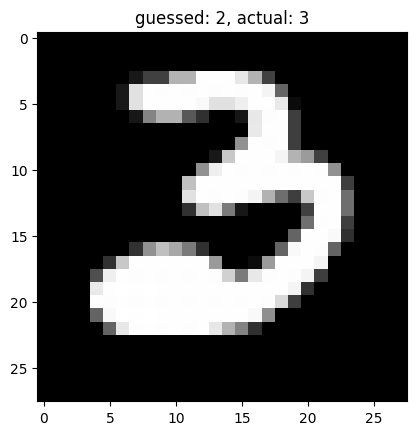

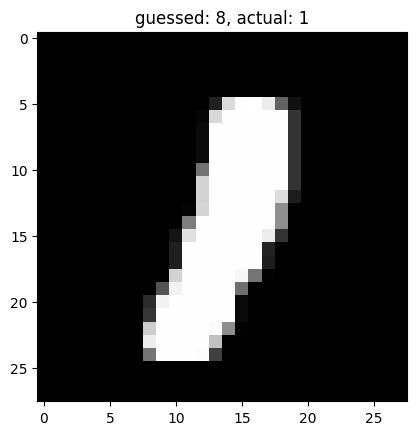

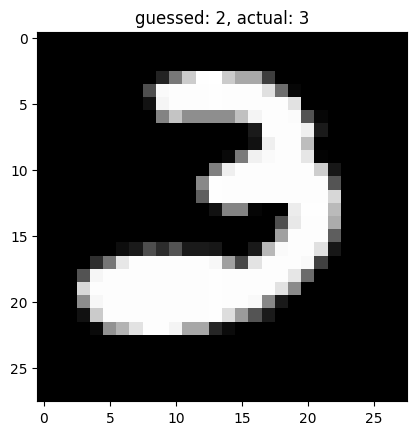

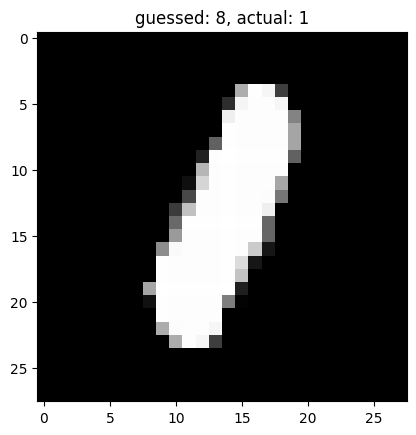

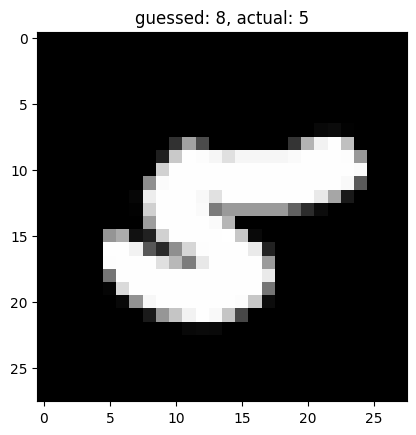

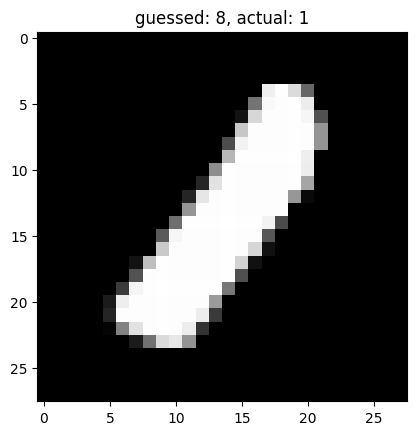

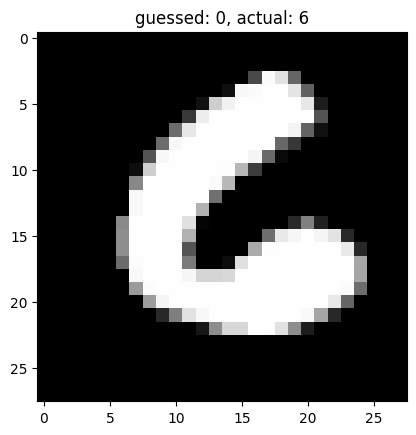

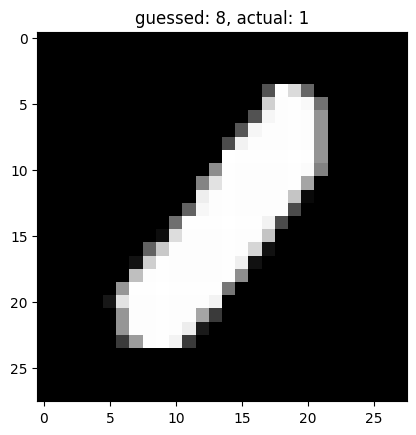

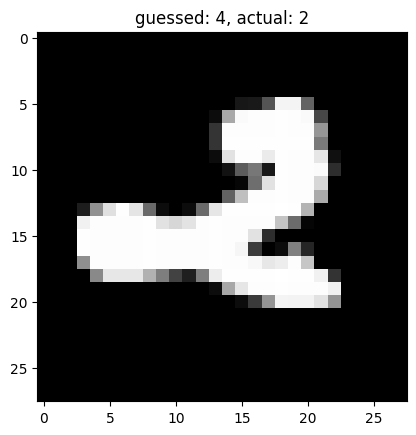

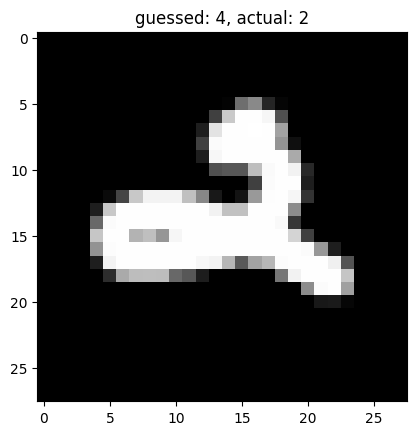

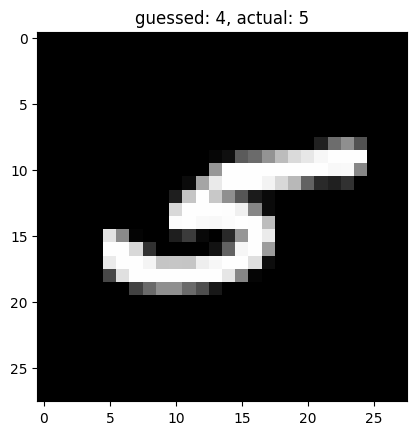

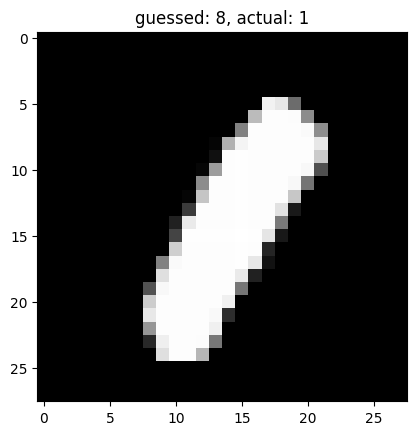

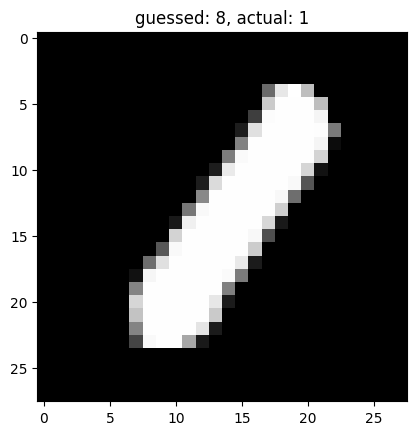

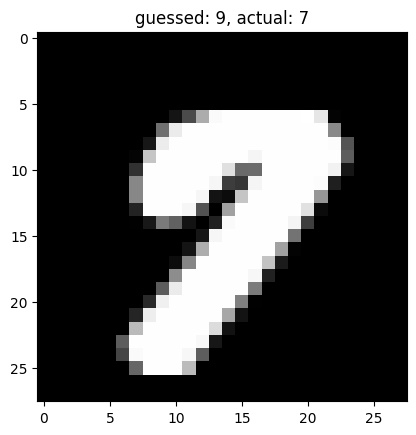

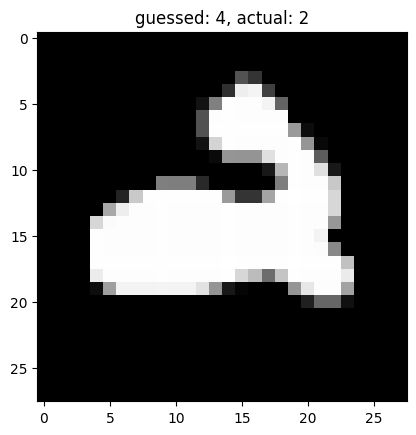

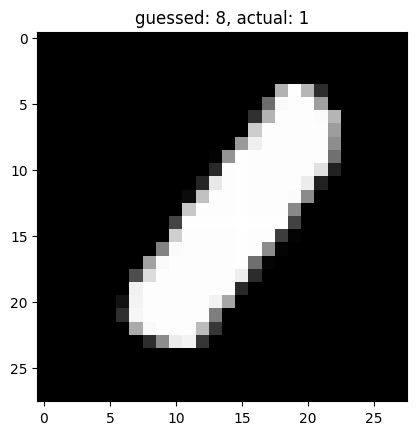

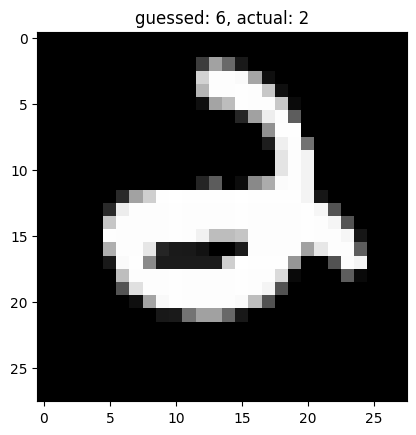

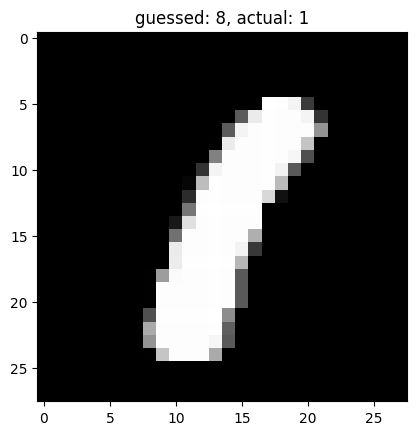

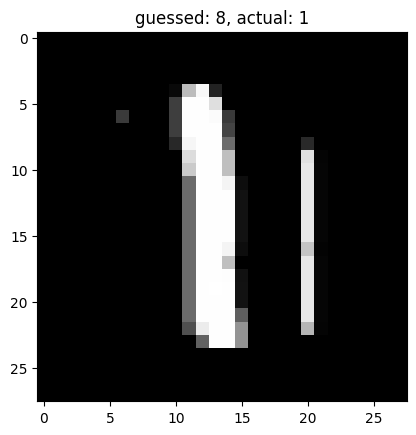

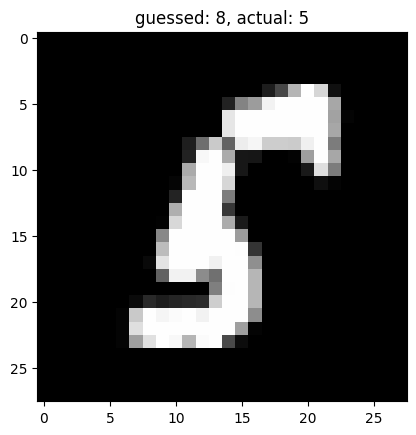

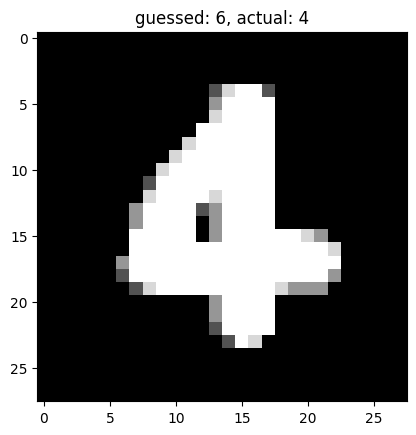

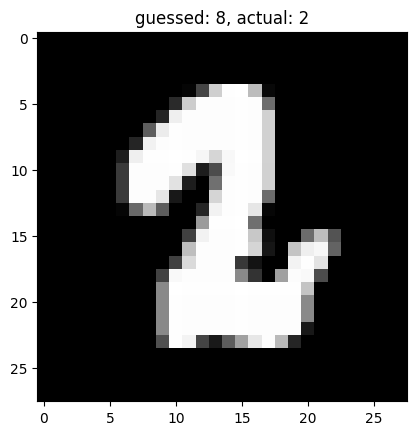

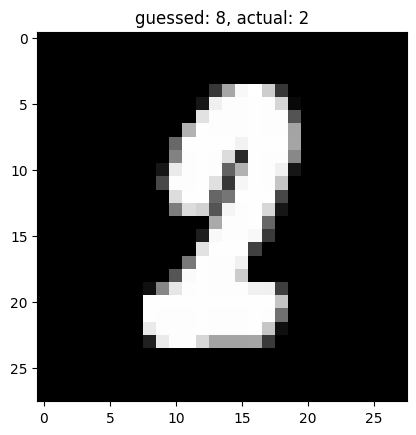

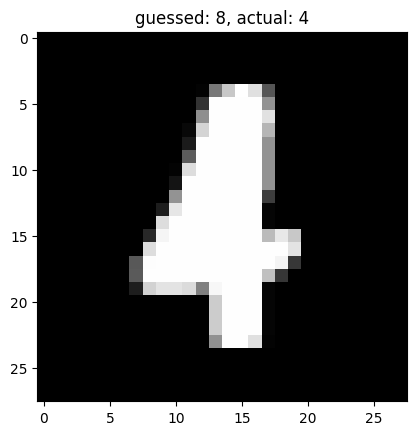

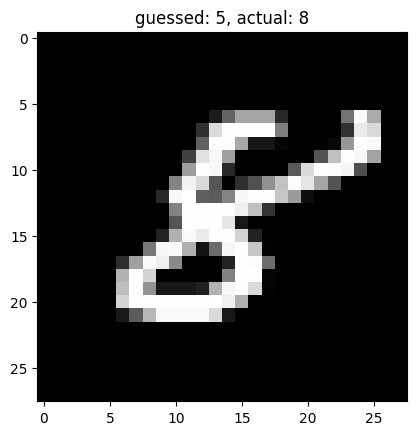

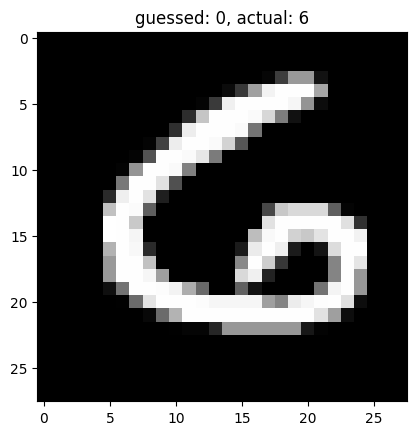

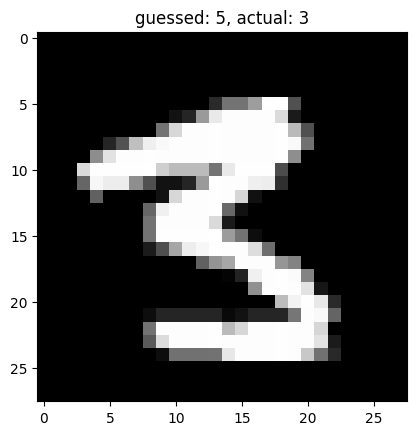

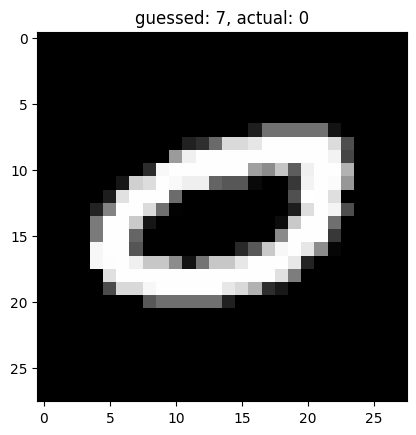

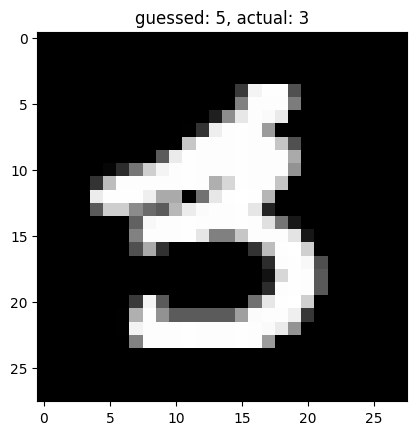

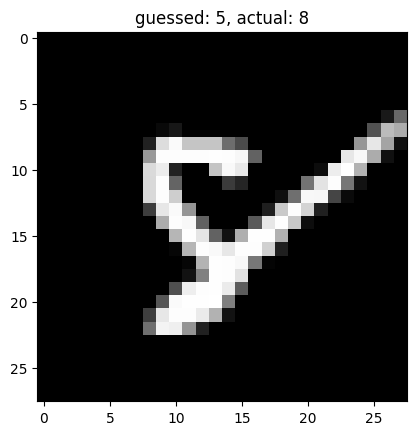

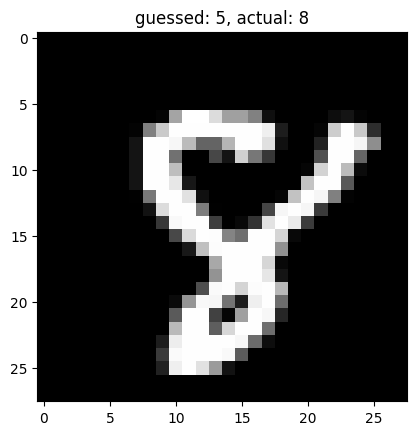

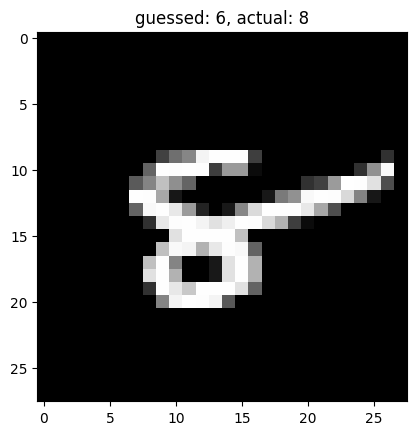

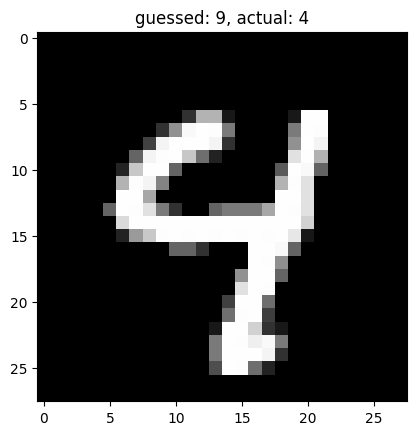

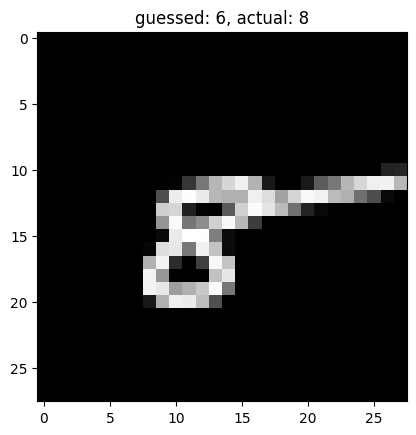

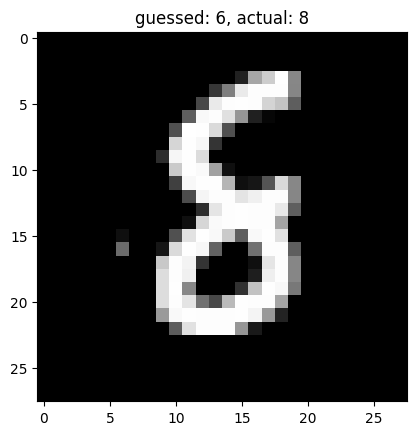

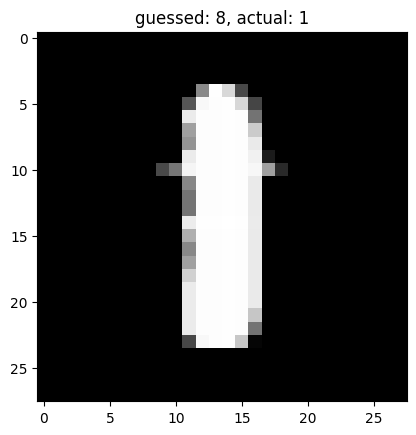

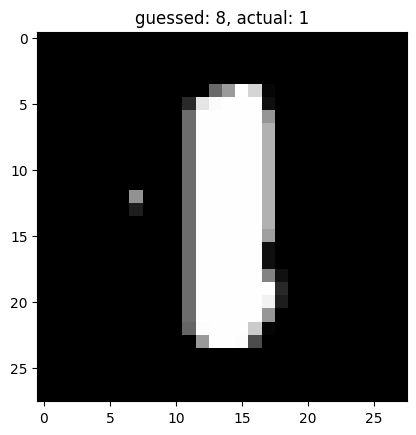

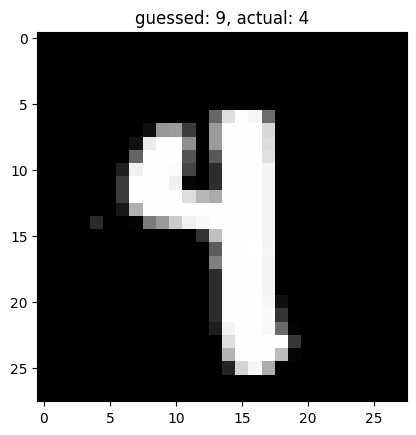

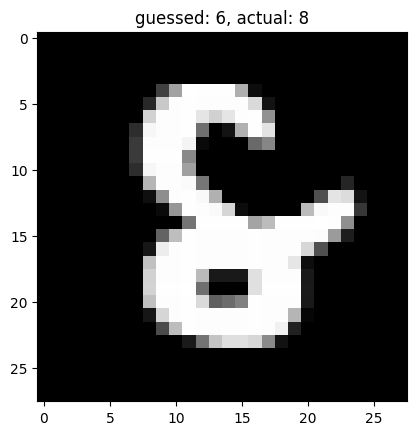

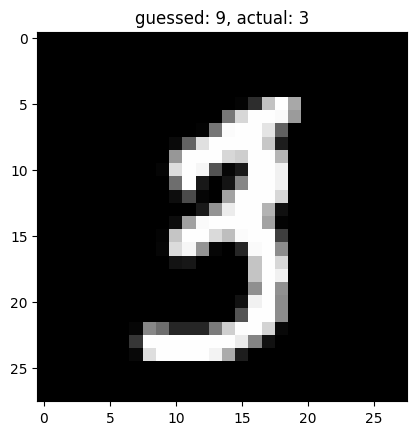

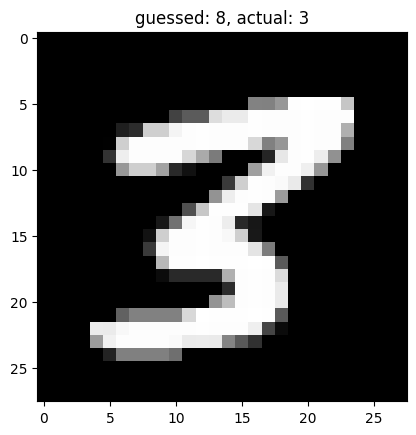

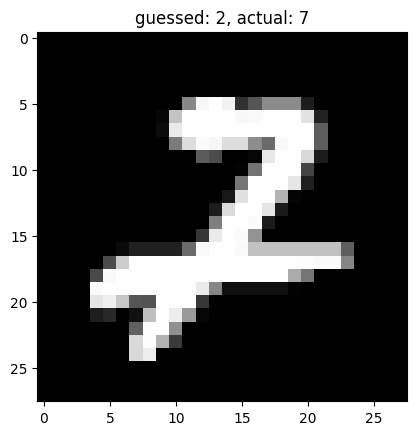

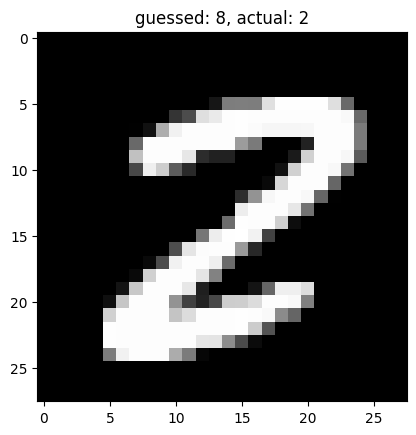

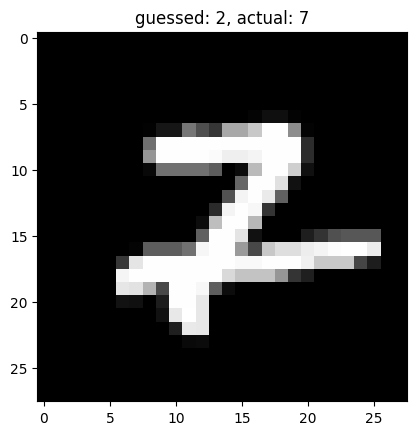

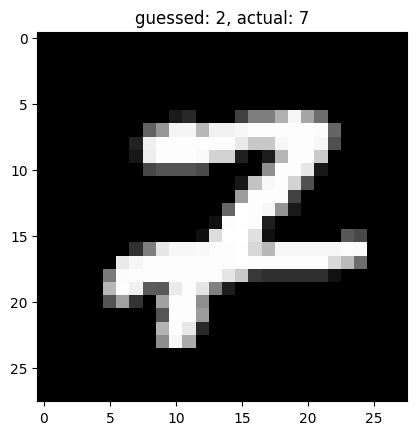

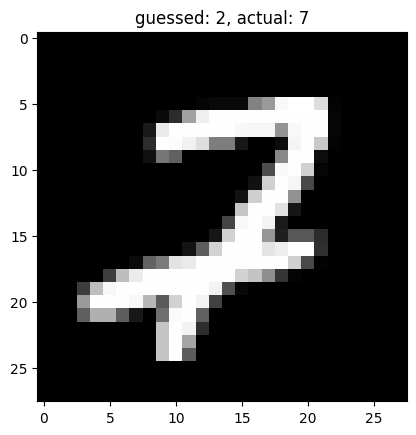

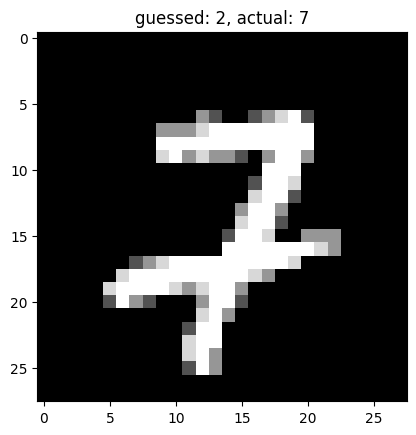

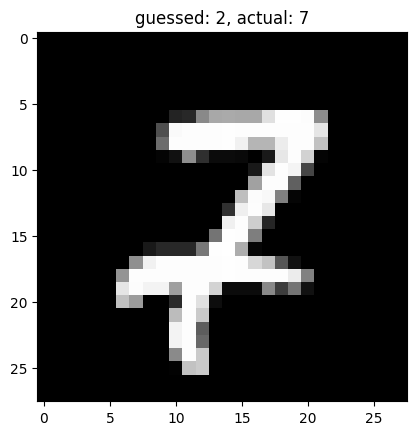

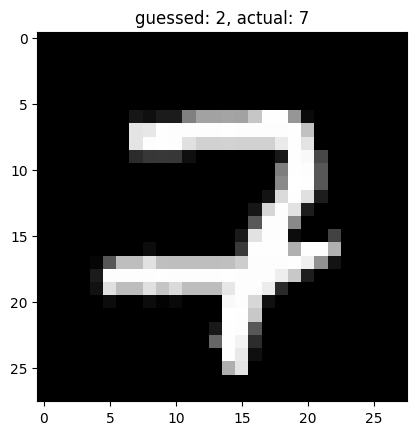

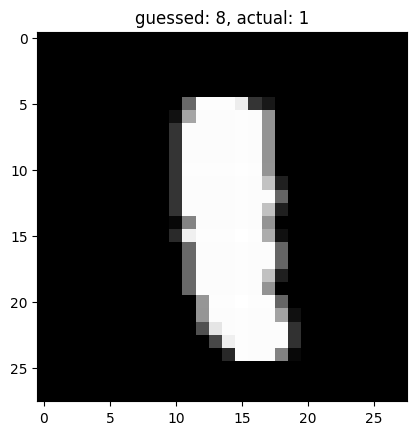

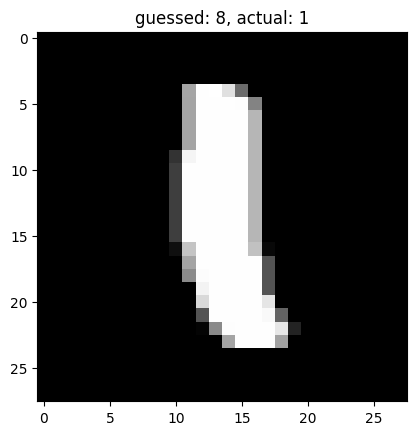

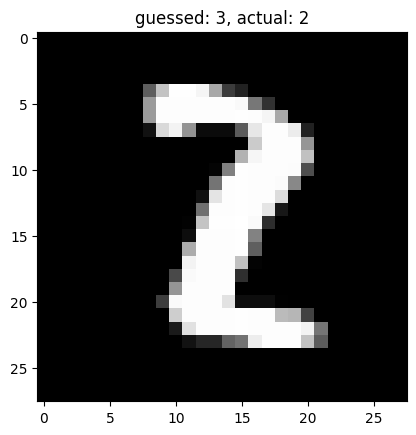

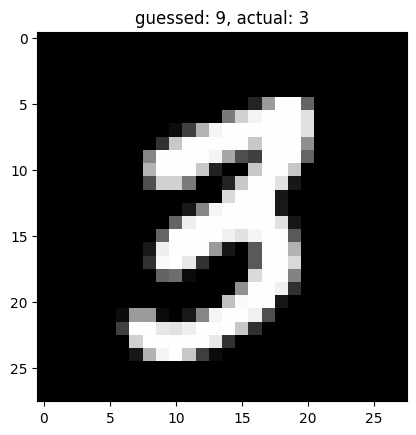

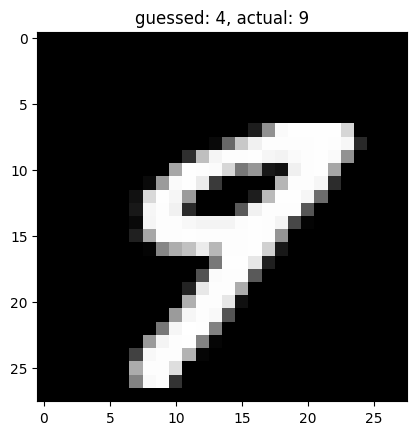

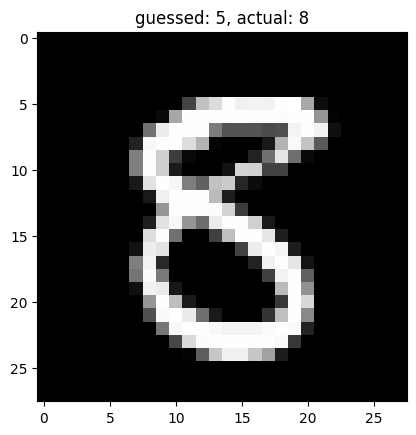

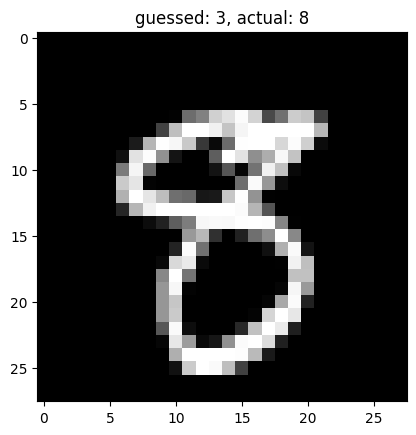

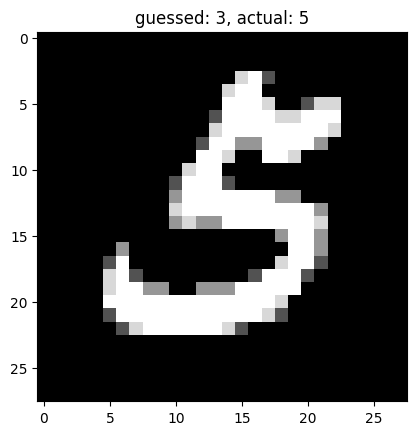

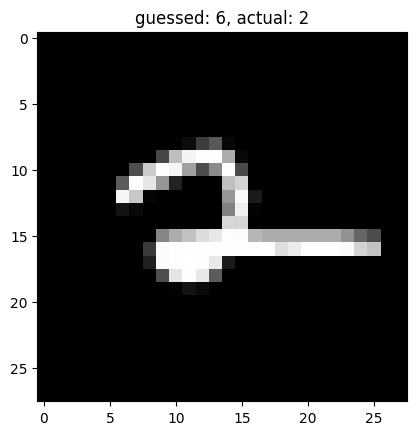

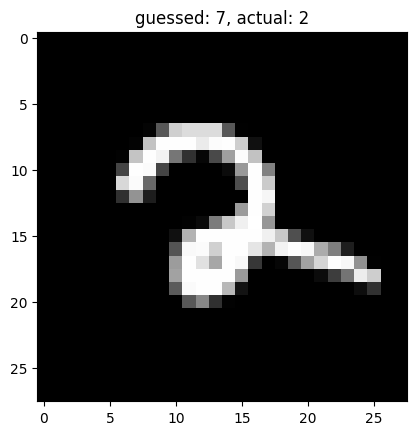

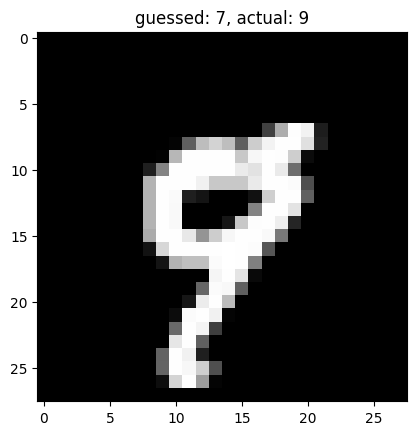

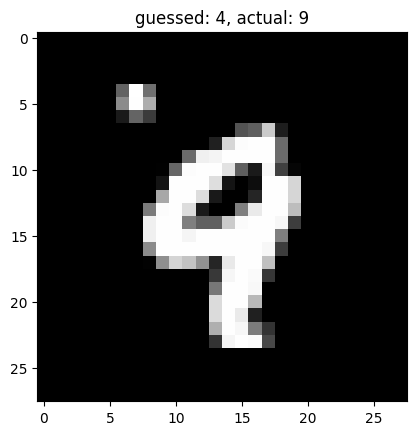

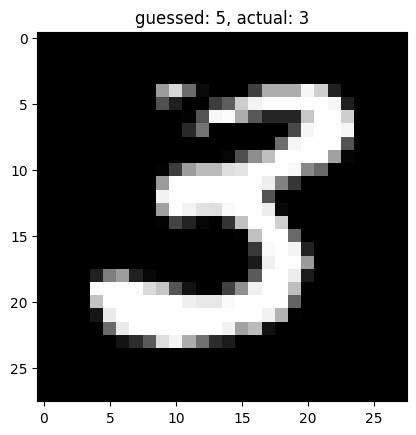

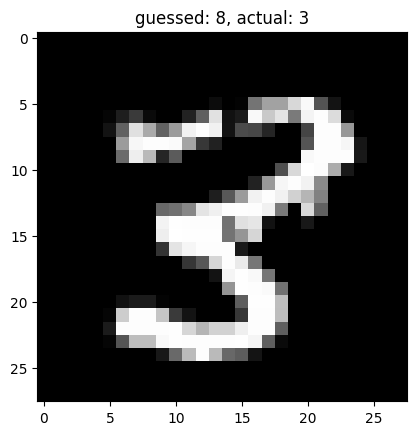

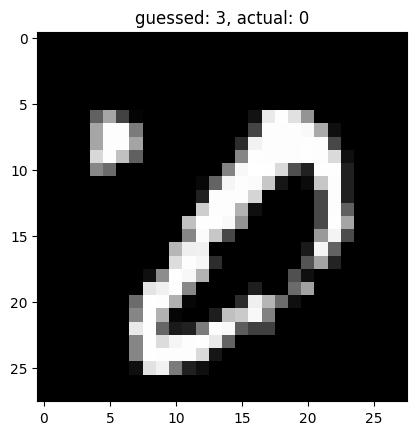

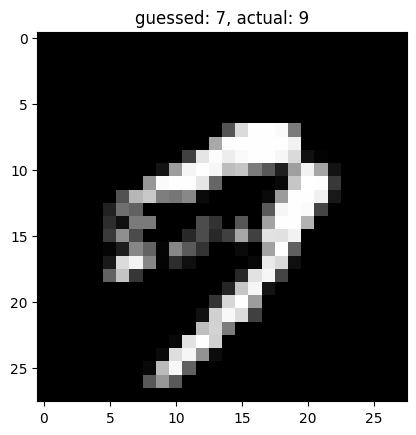

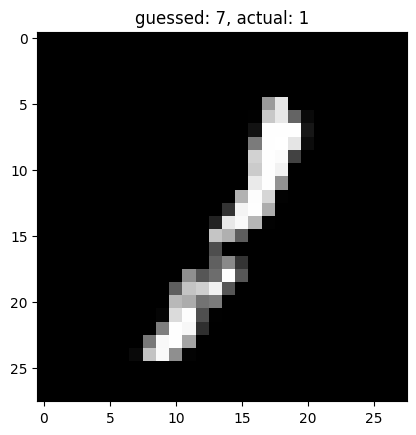

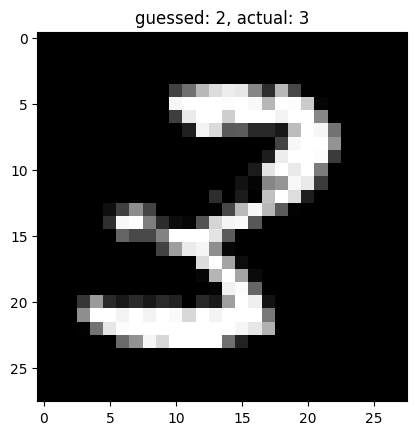

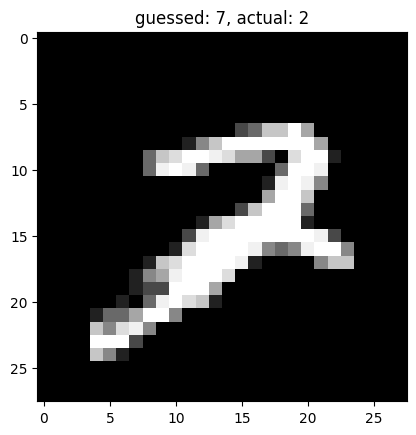

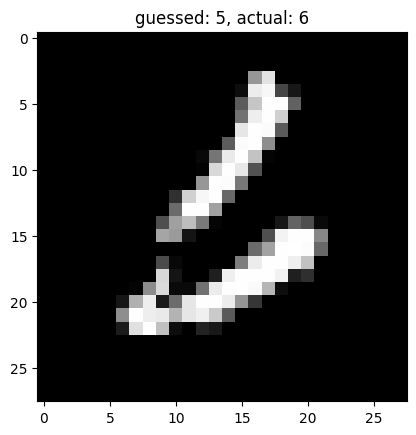

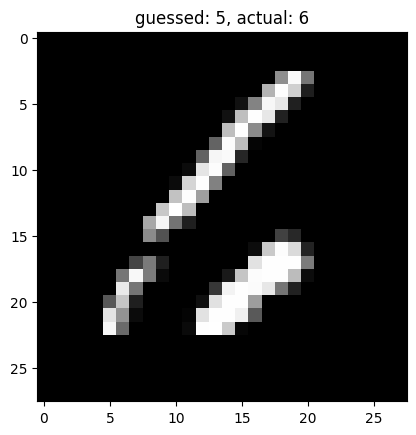

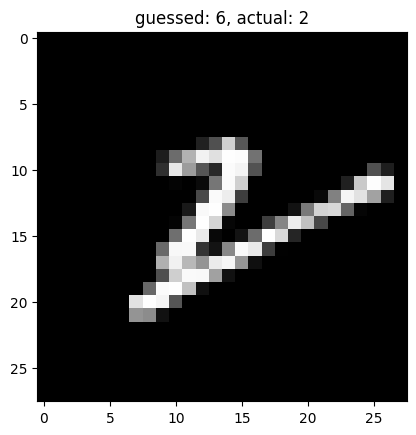

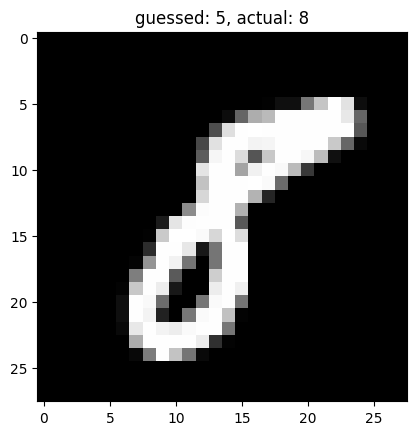

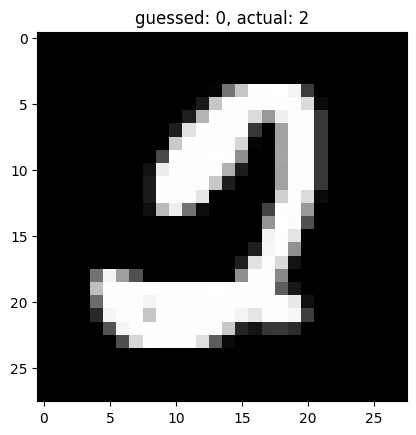

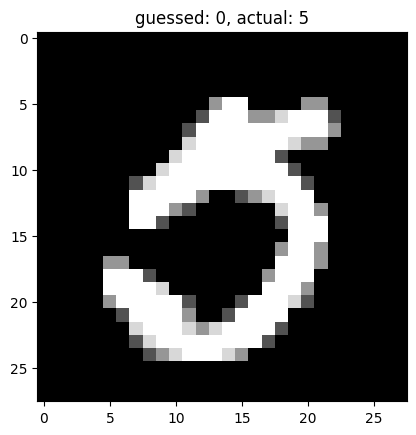

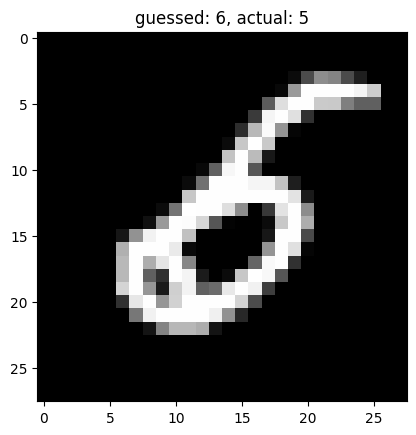

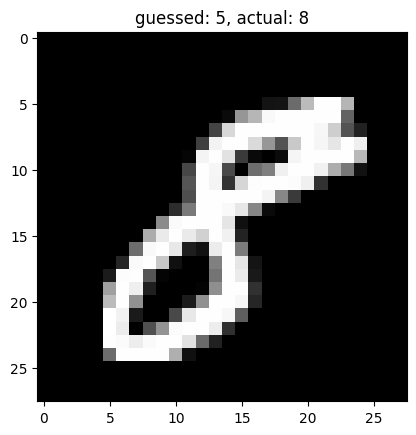

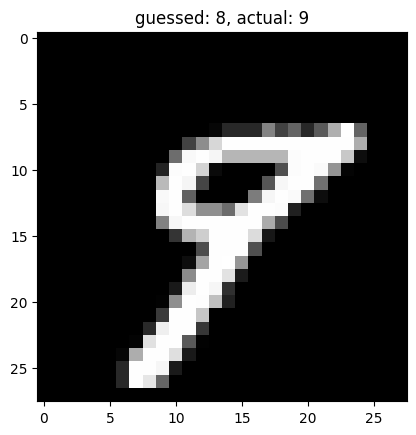

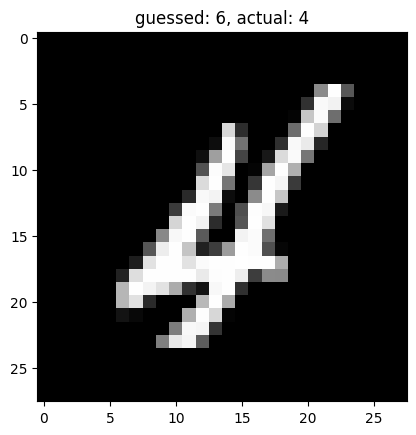

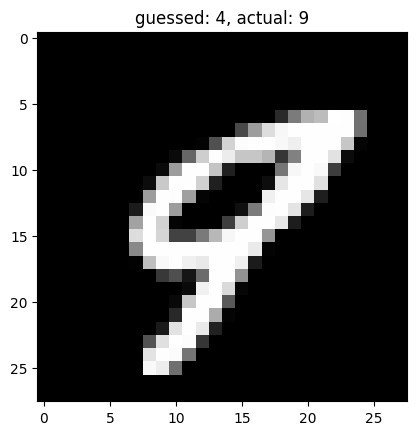

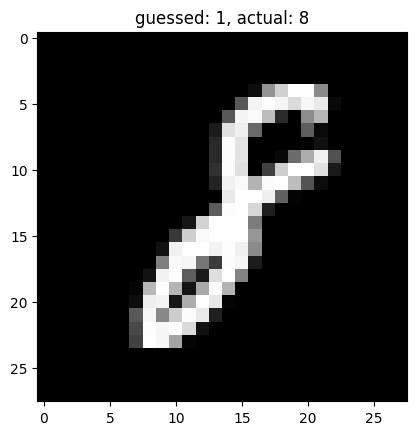

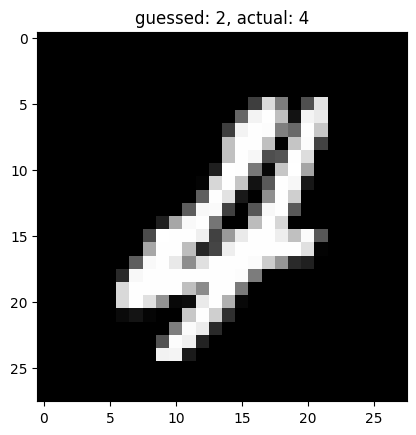

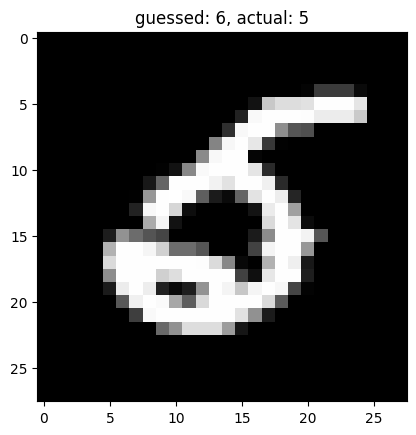

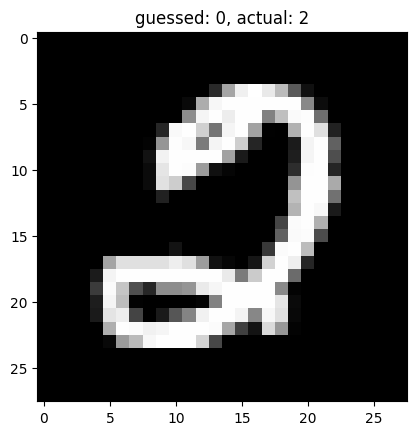

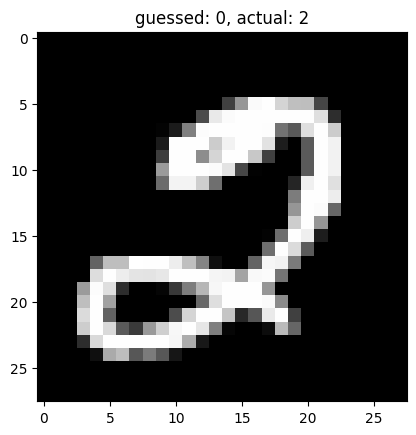

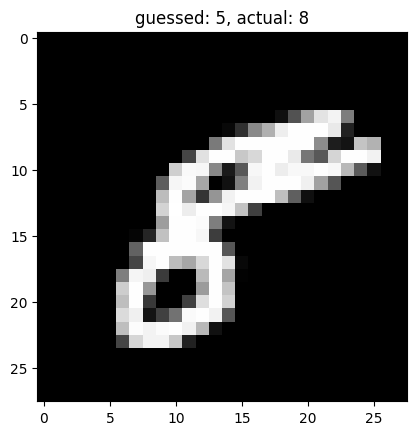

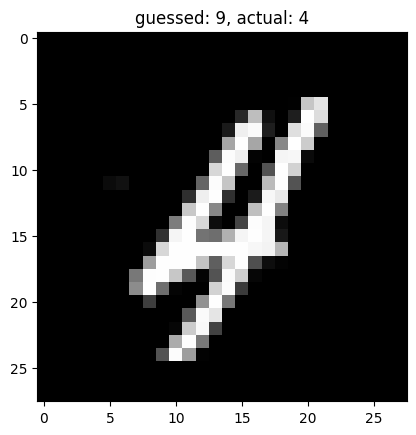

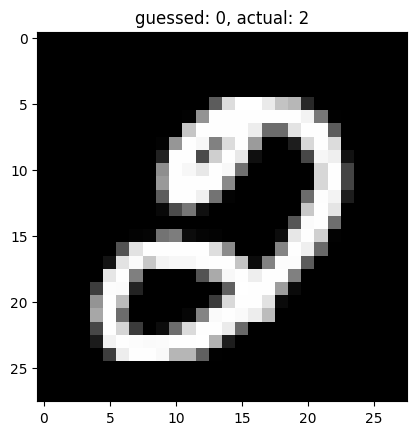

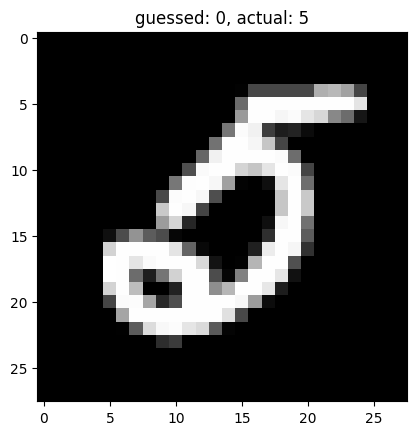

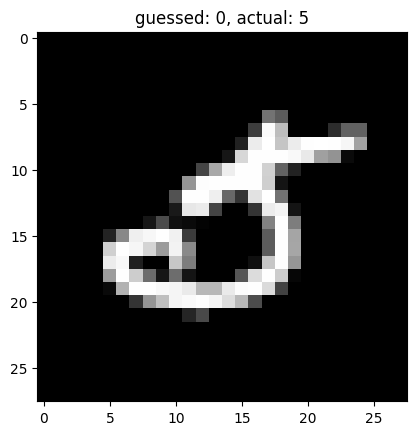

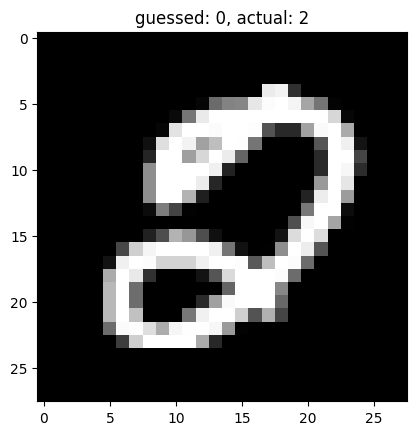

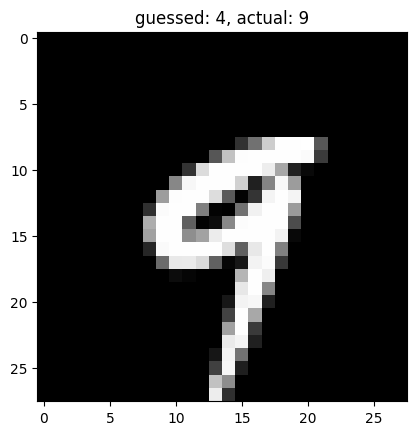

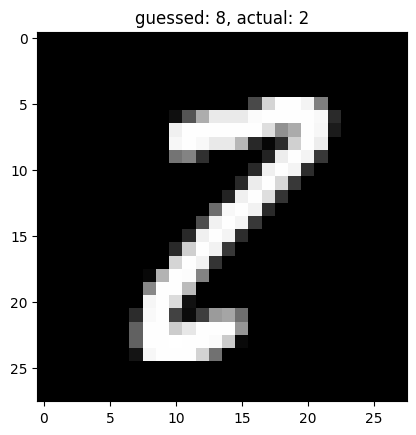

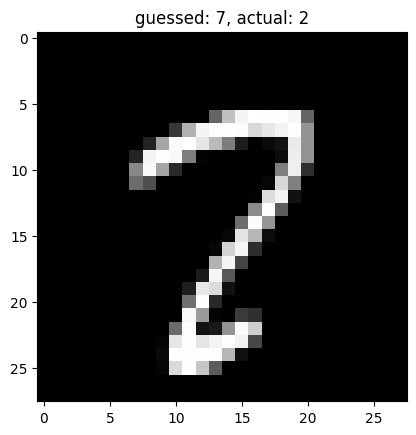

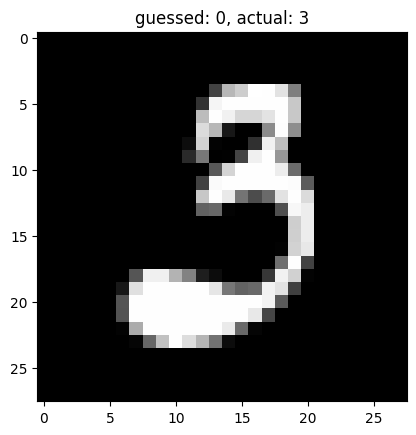

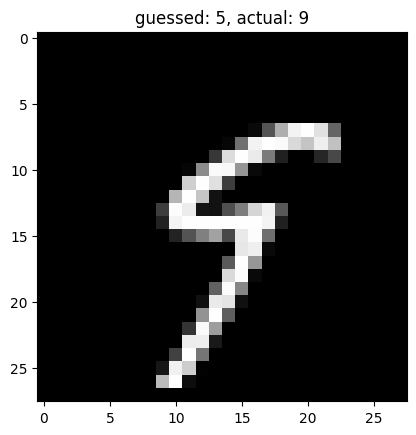

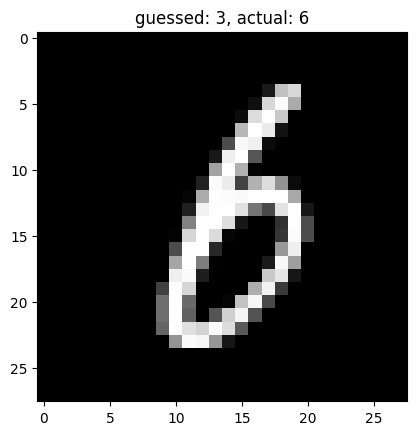

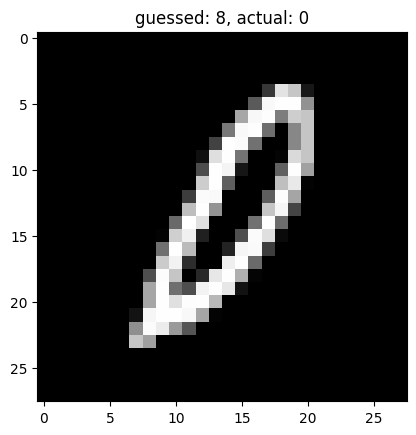

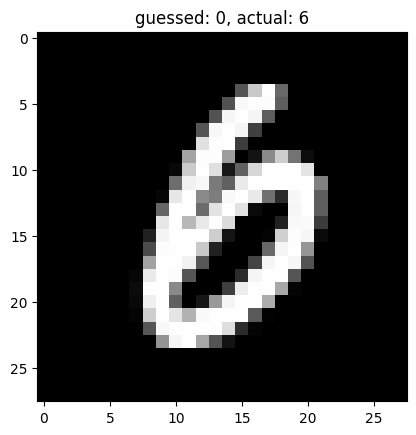

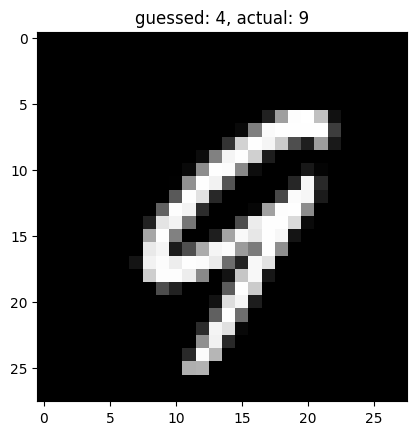

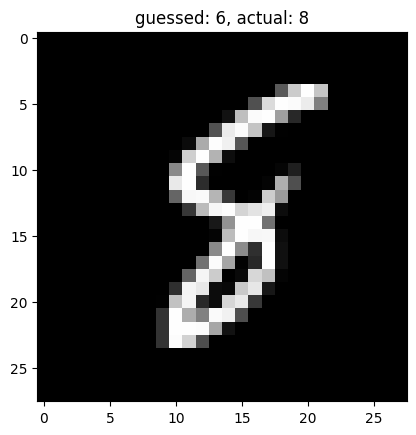

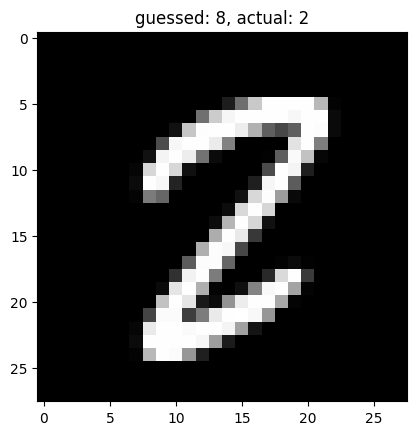

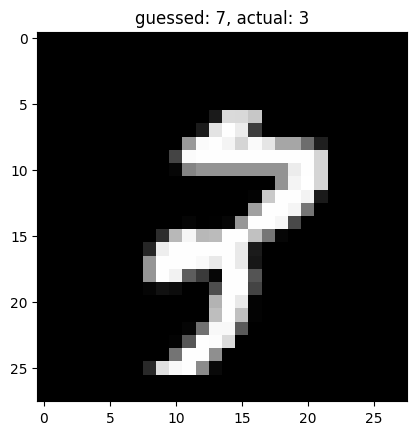

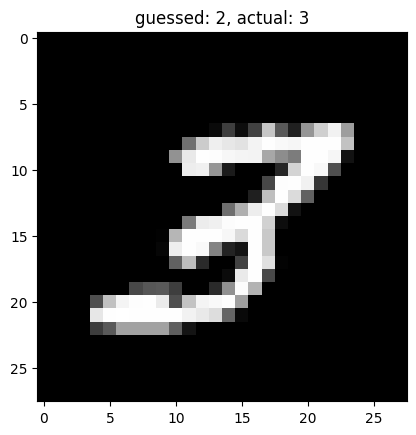

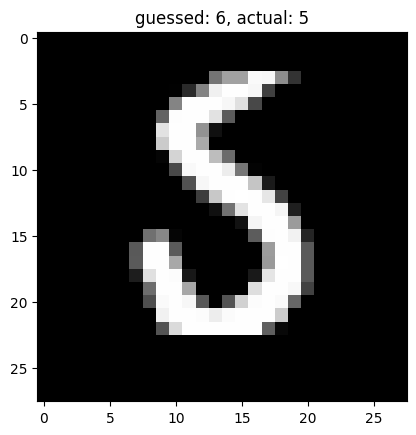

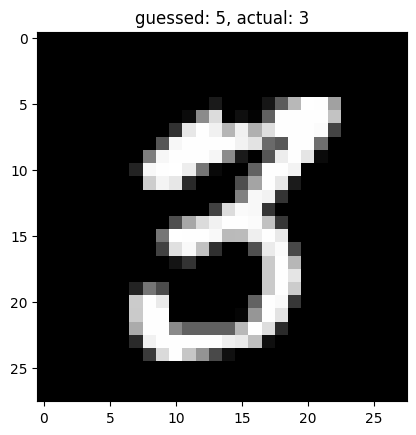

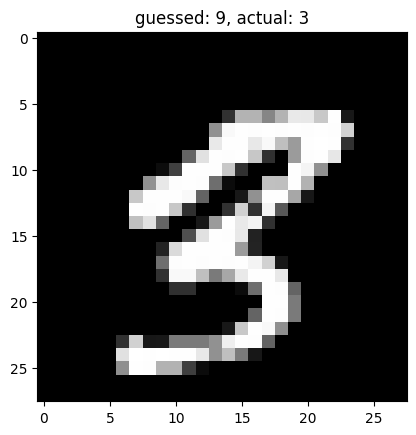

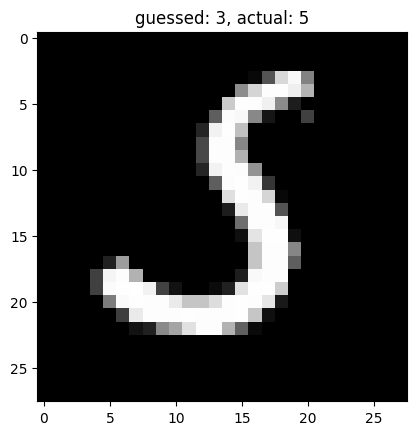

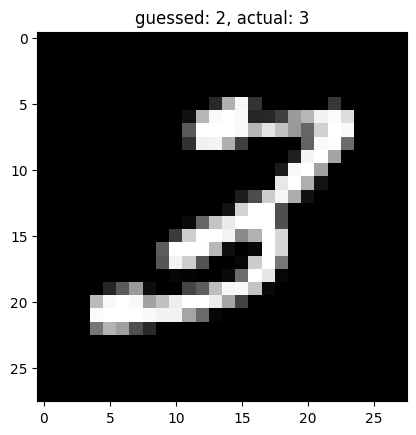

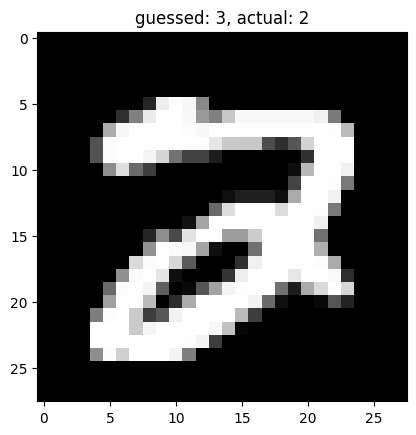

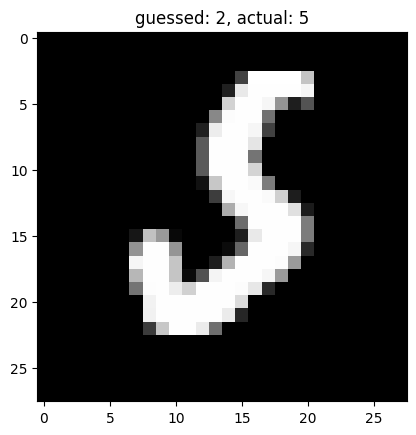

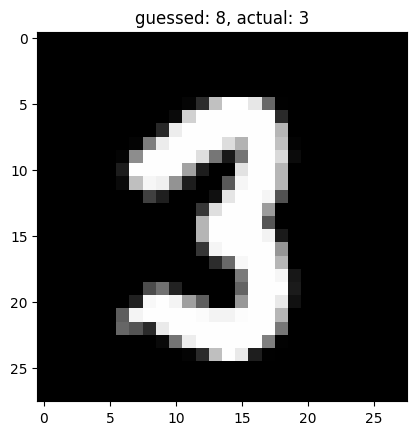

In [16]:

W_ih, b_h, W_ho, b_o = init_bias_0(60)
train((W_ih, b_h, W_ho, b_o), 2000)

# Testing
hidden_logits = tf.matmul(data.test_data, W_ih) + b_h
hidden_relu = tf.nn.relu(hidden_logits)
logits = tf.matmul(hidden_relu, W_ho) + b_o
test_preds = tf.argmax(tf.nn.softmax(logits), axis=1, output_type=tf.int32)

incorrects = tf.where(tf.not_equal(test_preds, data.test_labels)).numpy().flatten()
print(incorrects)

for i in incorrects:
    plt.title('guessed: {}, actual: {}'.format(test_preds[i], data.test_labels[i]))
    plt.imshow(test_images[i], cmap="Greys_r")
    plt.show()


### Common Image properties when classified wrong

- big circles e.g. in a six with small lines are cosidered a zero
- problems with not closed numbers e.g. an eight with open top is cosidered a four
- small circles in numbers containing them e.g. in a nine are kind of ignored -> net thinks it's a one
- too short lines: e.g. two with sgort line at the bottom is considered a seven
- missing lines or "Snörkelschrift" are problematic
